In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [5]:
df = pd.DataFrame(pd.read_csv(r'CarPrice.csv'))

In [23]:
df.info()
df.price.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

count      205.000000
mean     13276.710585
std       7988.852340
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

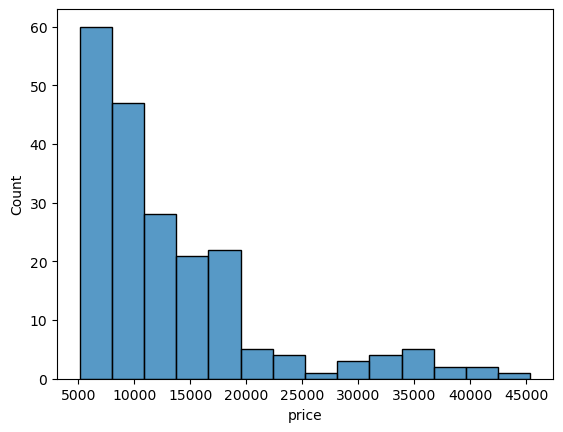

In [7]:
sns.histplot(df['price'])

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa romero giulia      gas        std        two   
1       2          3       alfa romero stelvio      gas        std        two   
2       3          1  alfa romero Quadrifoglio      gas        std        two   
3       4          2                audi 100ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [12]:
df['CarName'] = df['CarName'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
df['CarName'] = df['CarName'].replace(['MAXDA'], 'MAZDA')
df['CarName'] = df['CarName'].replace(['PORCSHCE'], 'PORSCHE')
df['CarName'] = df['CarName'].replace(['TOYOUTA'], 'TOYOTA')

In [13]:
sum(df.duplicated(subset = 'car_ID')) == 0

True

In [14]:
df.isnull().sum()*100/df.shape[0]

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [16]:
df.drop(columns=["car_ID"]).head()

symboling                   CarName fueltype aspiration doornumber  \
0          3        alfa romero giulia      gas        std        two   
1          3       alfa romero stelvio      gas        std        two   
2          1  alfa romero Quadrifoglio      gas        std        two   
3          2                audi 100ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [17]:
df.price = df.price.round(2)
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa romero giulia      gas        std        two   
1       2          3       alfa romero stelvio      gas        std        two   
2       3          1  alfa romero Quadrifoglio      gas        std        two   
3       4          2                audi 100ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [18]:
df.CarName.values[0:10]
df['brand'] = df.CarName.str.split(' ').str.get(0).str.upper()
df['model'] = df.CarName.str.split(' ').str.get(1).str.upper()
len(set(df.brand.values))
df.tail()

car_ID  symboling         CarName fueltype aspiration doornumber carbody  \
200     201         -1  volvo 145e(sw)      gas        std       four   sedan   
201     202         -1     volvo 144ea      gas      turbo       four   sedan   
202     203         -1     volvo 244dl      gas        std       four   sedan   
203     204         -1       volvo 246   diesel      turbo       four   sedan   
204     205         -1     volvo 264gl      gas      turbo       four   sedan   

    drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
200        rwd          front      109.1      188.8      68.9       55.5   
201        rwd          front      109.1      188.8      68.8       55.5   
202        rwd          front      109.1      188.8      68.9       55.5   
203        rwd          front      109.1      188.8      68.9       55.5   
204        rwd          front      109.1      188.8      68.9       55.5   

     curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
200        2952        ohc           four         141       mpfi       3.78   
201        3049        ohc           four         141       mpfi       3.78   
202        3012       ohcv            six         173       mpfi       3.58   
203        3217        ohc            six         145        idi       3.01   
204        3062        ohc           four         141       mpfi       3.78   

     stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
200    3.15               9.5         114     5400       23          28   
201    3.15               8.7         160     5300       19          25   
202    2.87               8.8         134     5500       18          23   
203    3.40              23.0         106     4800       26          27   
204    3.15               9.5         114     5400       19          25   

       price  brand     model  
200  16845.0  VOLVO  145E(SW)  
201  19045.0  VOLVO     144EA  
202  21485.0  VOLVO     244DL  
203  22470.0  VOLVO       246  
204  22625.0  VOLVO     264GL

In [133]:
def isNaN(num):
    return num != num


In [19]:
df['PriceType'] = df['price'].apply(lambda x : "Low Range" if x < 5000 
                                                     else ("Mid Range" if 10000 <= x < 20000
                                                        else "High Range" if 20000 <= x < 30000
                                                           else "Luxury"))
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa romero giulia      gas        std        two   
1       2          3       alfa romero stelvio      gas        std        two   
2       3          1  alfa romero Quadrifoglio      gas        std        two   
3       4          2                audi 100ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price brand   model  PriceType  
0          27  13495.0  ALFA  ROMERO  Mid Range  
1          27  16500.0  ALFA  ROMERO  Mid Range  
2          26  16500.0  ALFA  ROMERO  Mid Range  
3          30  13950.0  AUDI   100LS  Mid Range  
4          22  17450.0  AUDI   100LS  Mid Range

In [20]:
df['RiskRate'] = df['symboling'].apply(lambda x : "High Risk" if x > 1 
                                                     else ("Medium Risk" if 0 <= x < 2
                                                        else "Low Risk"))
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa romero giulia      gas        std        two   
1       2          3       alfa romero stelvio      gas        std        two   
2       3          1  alfa romero Quadrifoglio      gas        std        two   
3       4          2                audi 100ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price brand   model  PriceType     RiskRate  
0          27  13495.0  ALFA  ROMERO  Mid Range    High Risk  
1          27  16500.0  ALFA  ROMERO  Mid Range    High Risk  
2          26  16500.0  ALFA  ROMERO  Mid Range  Medium Risk  
3          30  13950.0  AUDI   100LS  Mid Range    High Risk  
4          22  17450.0  AUDI   100LS  Mid Range    High Risk

In [178]:
def isNa(num):
    return num != num


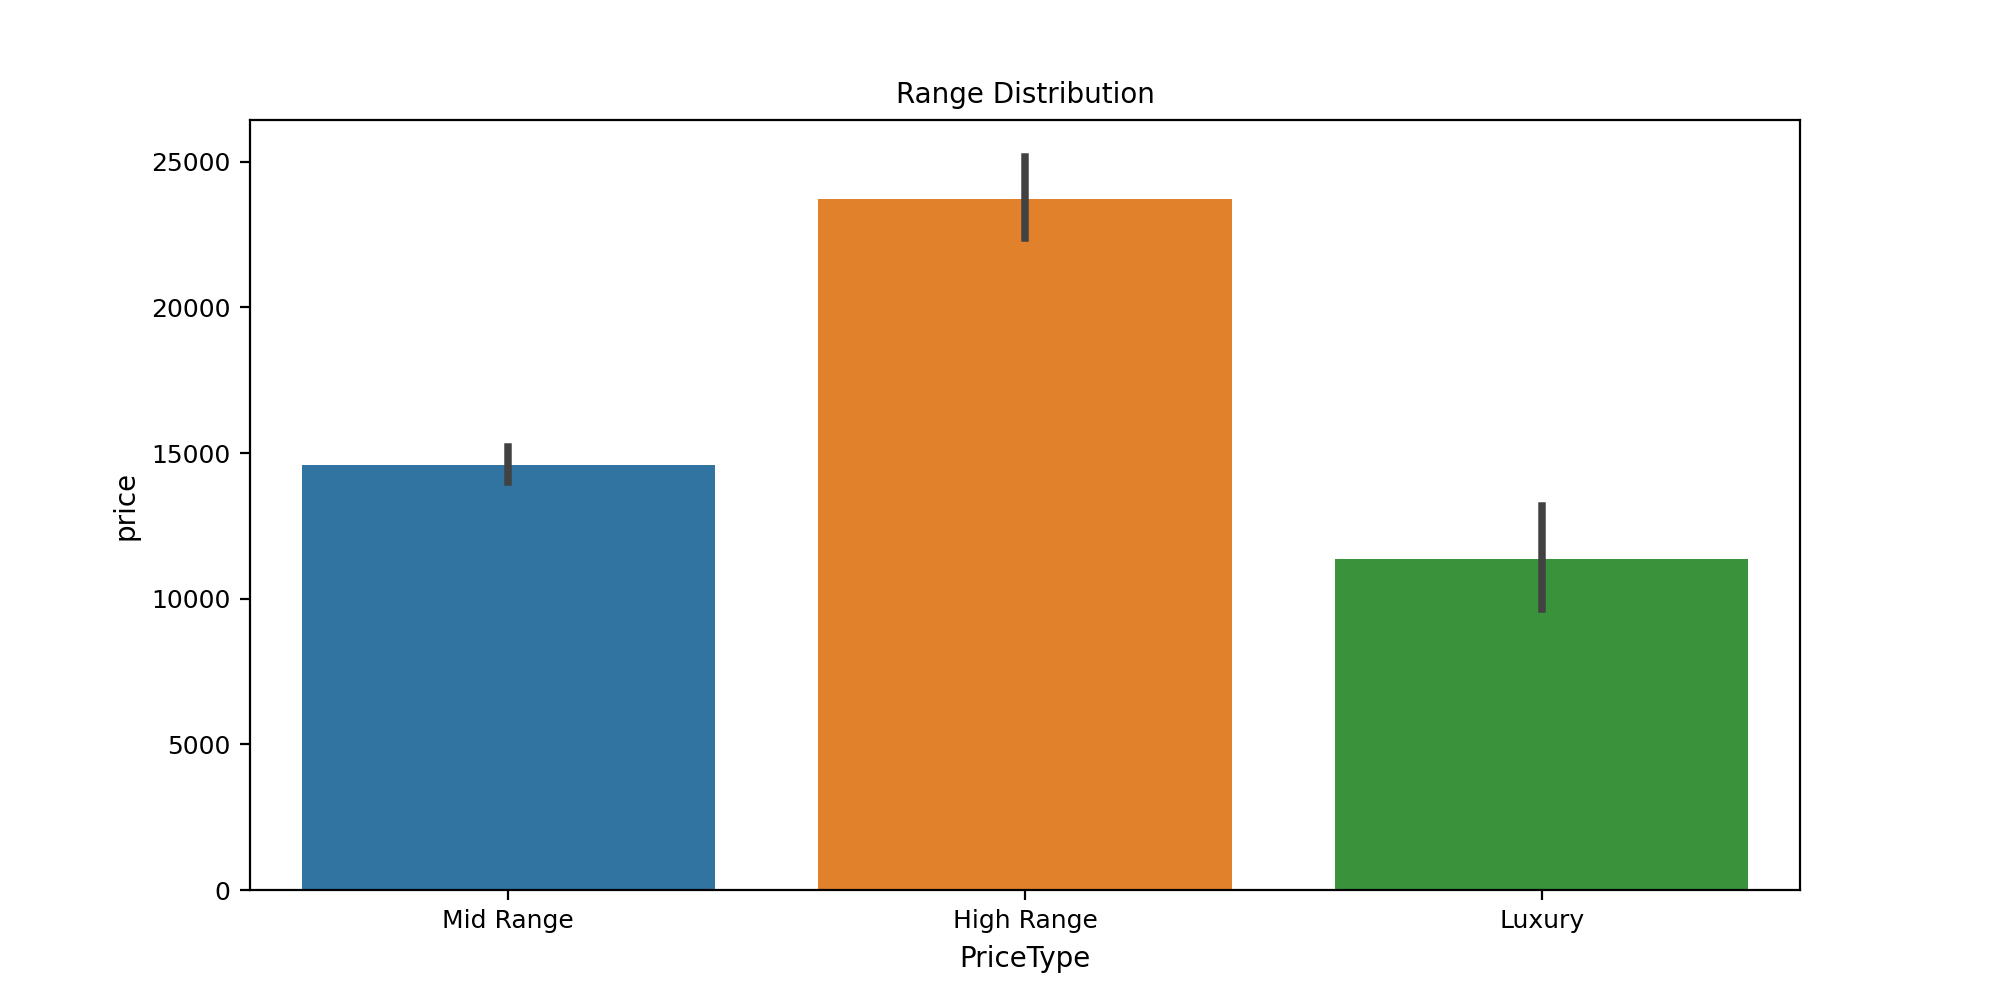

In [230]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 10,
         'axes.titlesize':10,
         'xtick.labelsize':9,
         'ytick.labelsize':9}
pylab.rcParams.update(params)
plt.figure(figsize=(10,5))
plt.title("Range Distribution")
sns.barplot(x = 'PriceType', y = 'price', data = df)
plt.show()

In [220]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (70, 30),
         'axes.labelsize': 30,
         'axes.titlesize':15,
         'xtick.labelsize':20,
         'ytick.labelsize':20}
pylab.rcParams.update(params)
plt.title("Brand Distribution")
plt.figure(figsize=(70,30))
sns.barplot(x = 'brand', y = 'price', data = df)
plt.show()

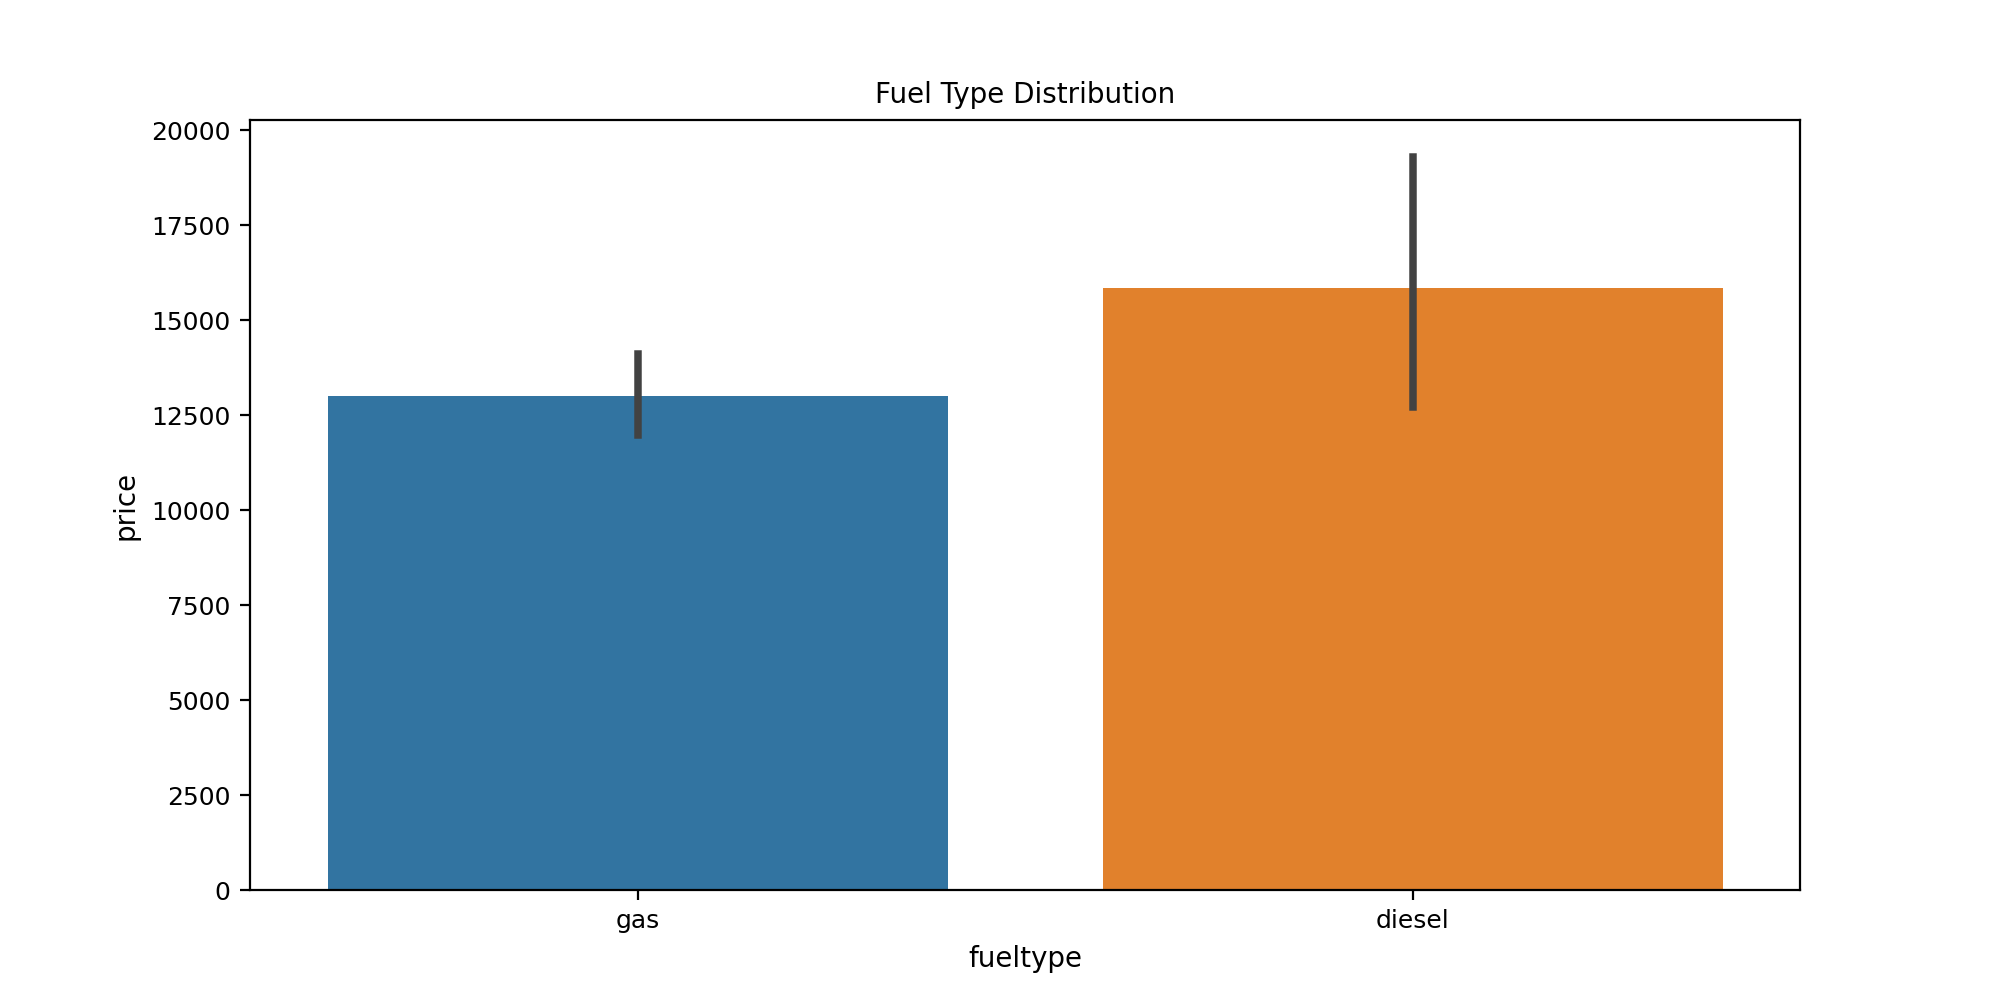

In [231]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 10,
         'axes.titlesize':10,
         'xtick.labelsize':9,
         'ytick.labelsize':9}
pylab.rcParams.update(params)
plt.figure(figsize=(10,5))
plt.title("Fuel Type Distribution")
sns.barplot(x = 'fueltype', y = 'price', data = df)
plt.show()

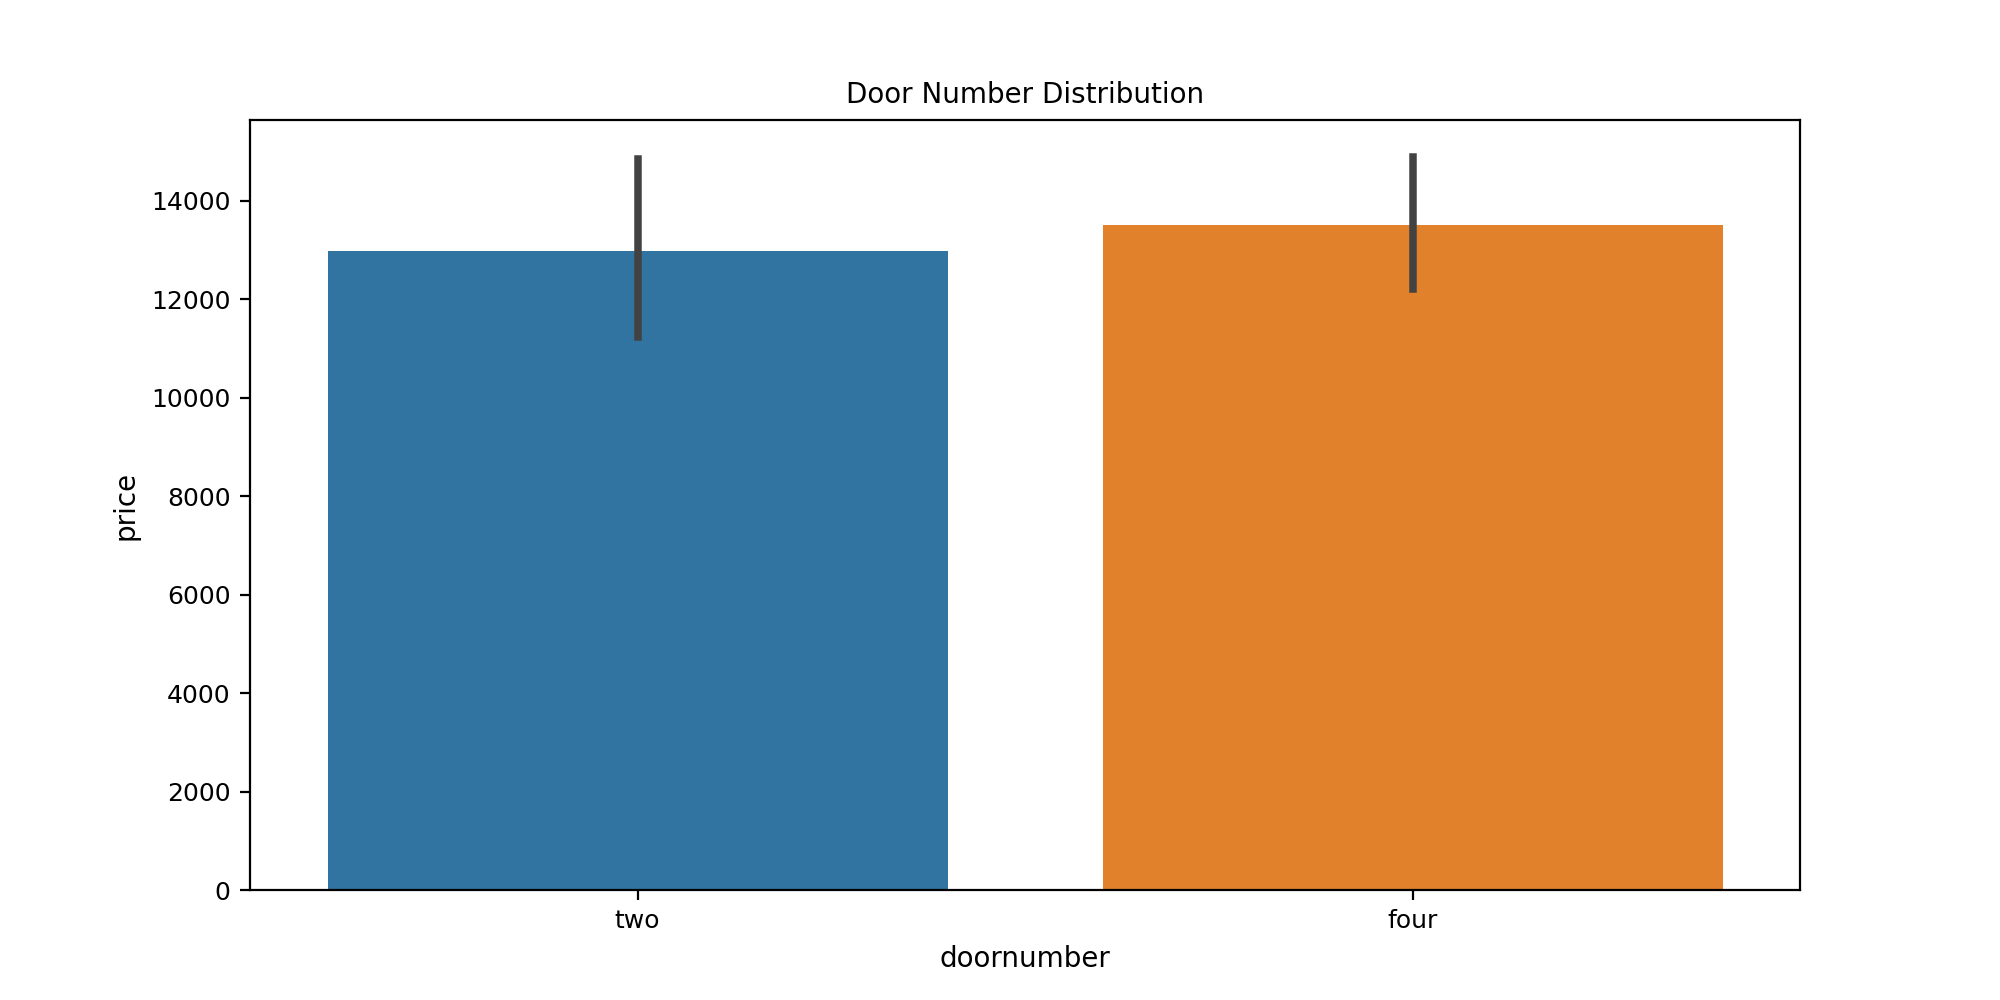

In [232]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 10,
         'axes.titlesize':10,
         'xtick.labelsize':9,
         'ytick.labelsize':9}
pylab.rcParams.update(params)
plt.figure(figsize=(10,5))
plt.title("Door Number Distribution")
sns.barplot(x = 'doornumber', y = 'price', data = df)
plt.show()

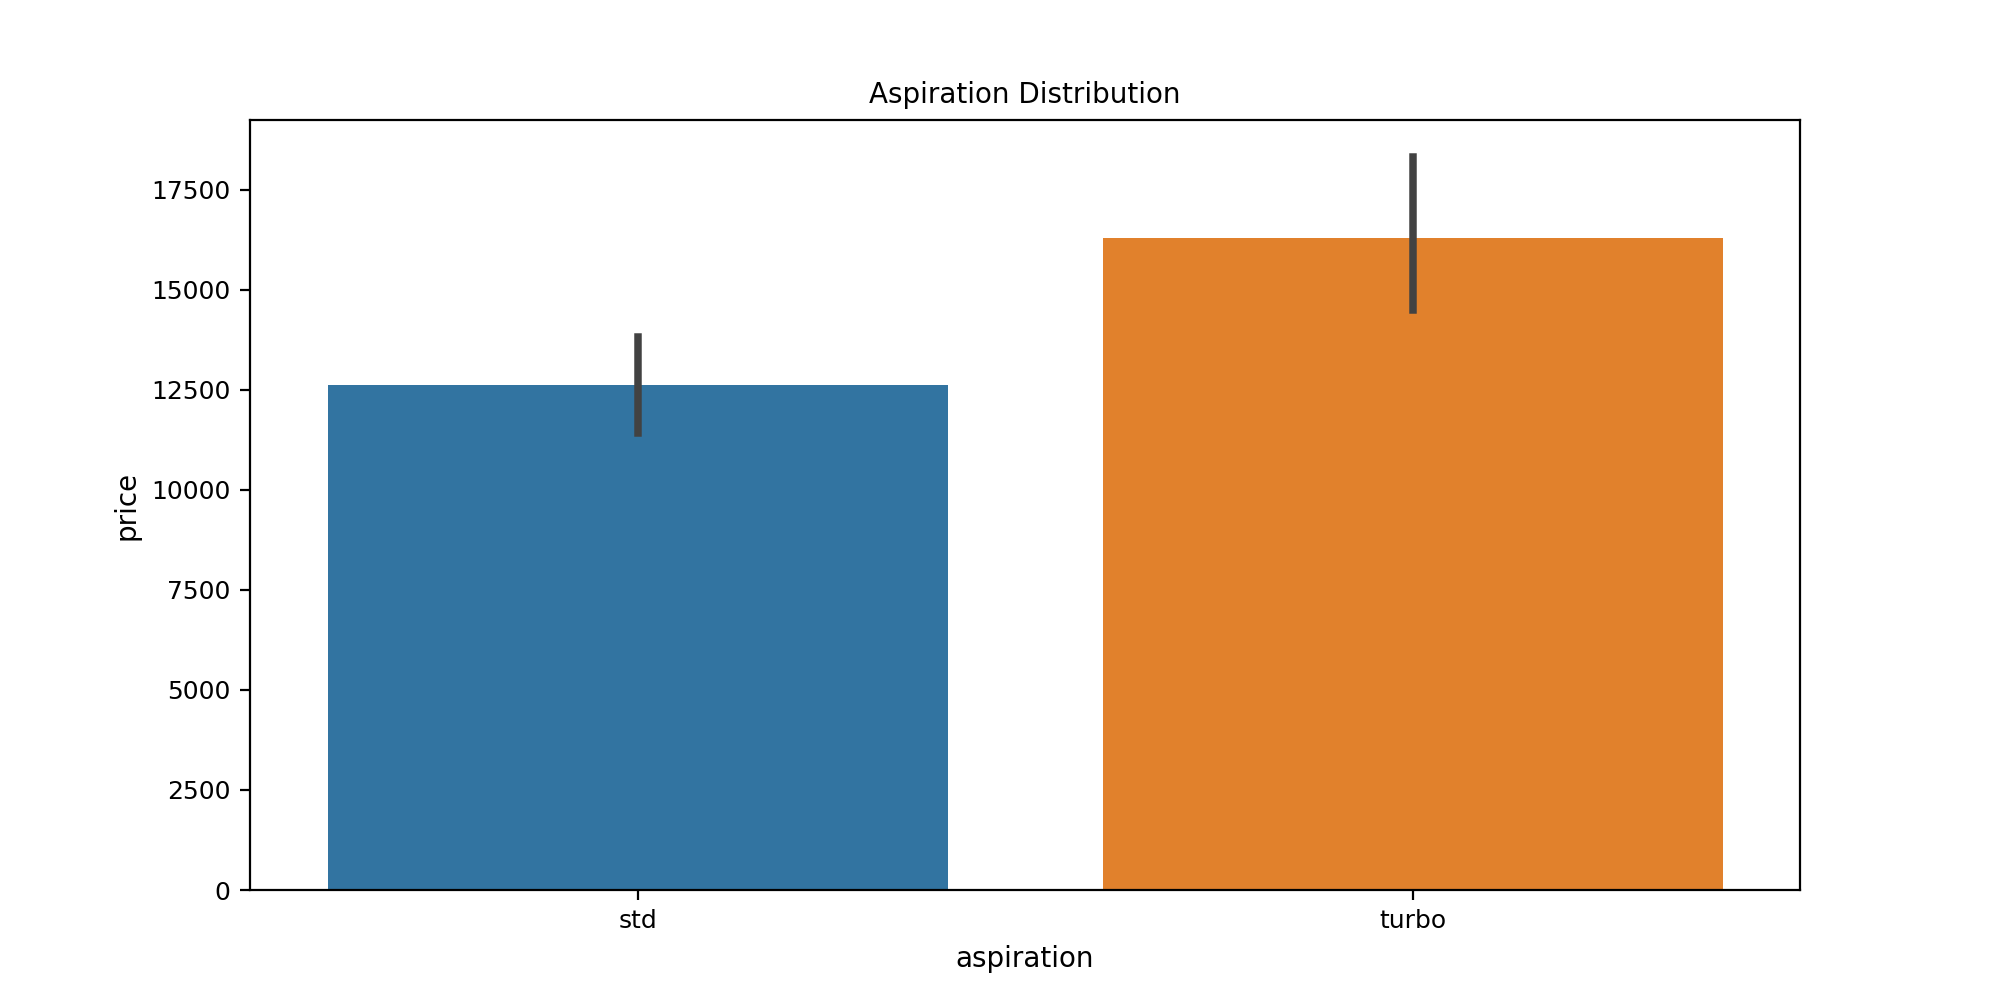

In [233]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 10,
         'axes.titlesize':10,
         'xtick.labelsize':9,
         'ytick.labelsize':9}
pylab.rcParams.update(params)
plt.figure(figsize=(10,5))
plt.title("Aspiration Distribution")
sns.barplot(x = 'aspiration', y = 'price', data = df)
plt.show()

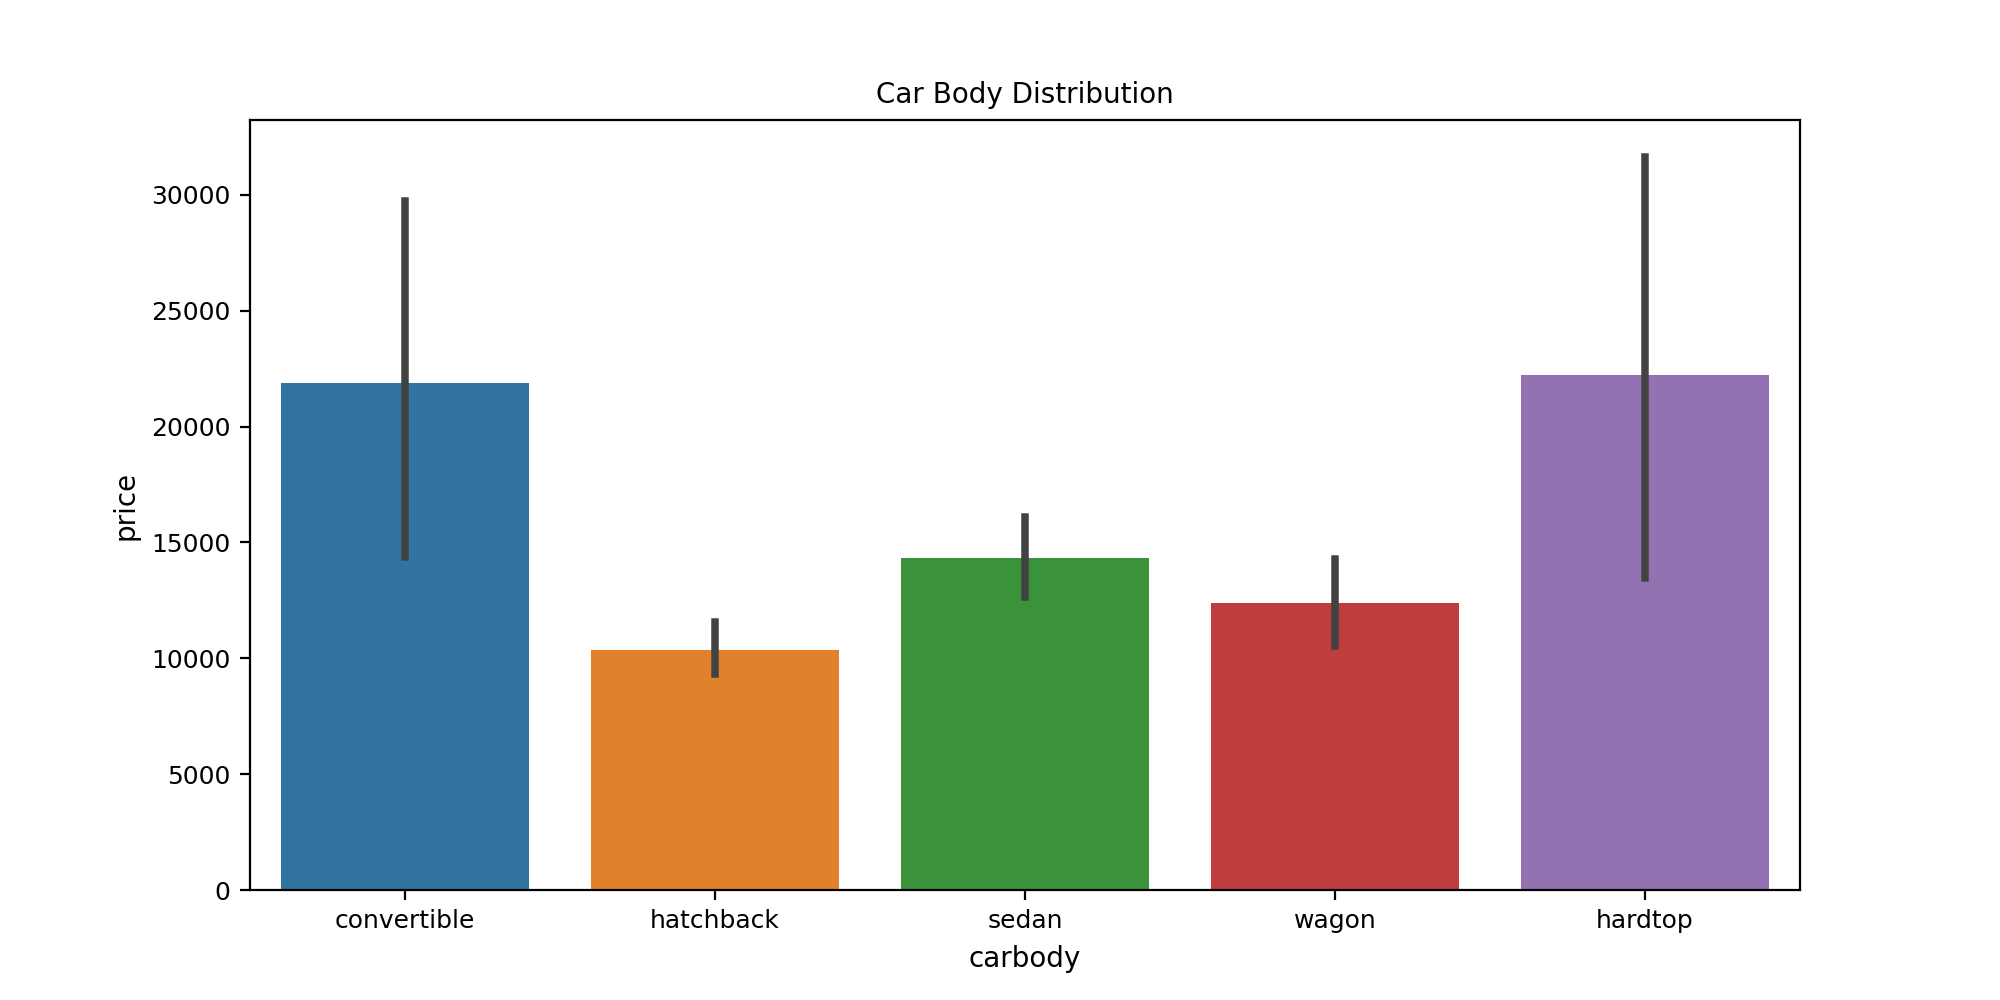

In [234]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 10,
         'axes.titlesize':10,
         'xtick.labelsize':9,
         'ytick.labelsize':9}
pylab.rcParams.update(params)
plt.figure(figsize=(10,5))
plt.title("Car Body Distribution")
sns.barplot(x = 'carbody', y = 'price', data = df)
plt.show()

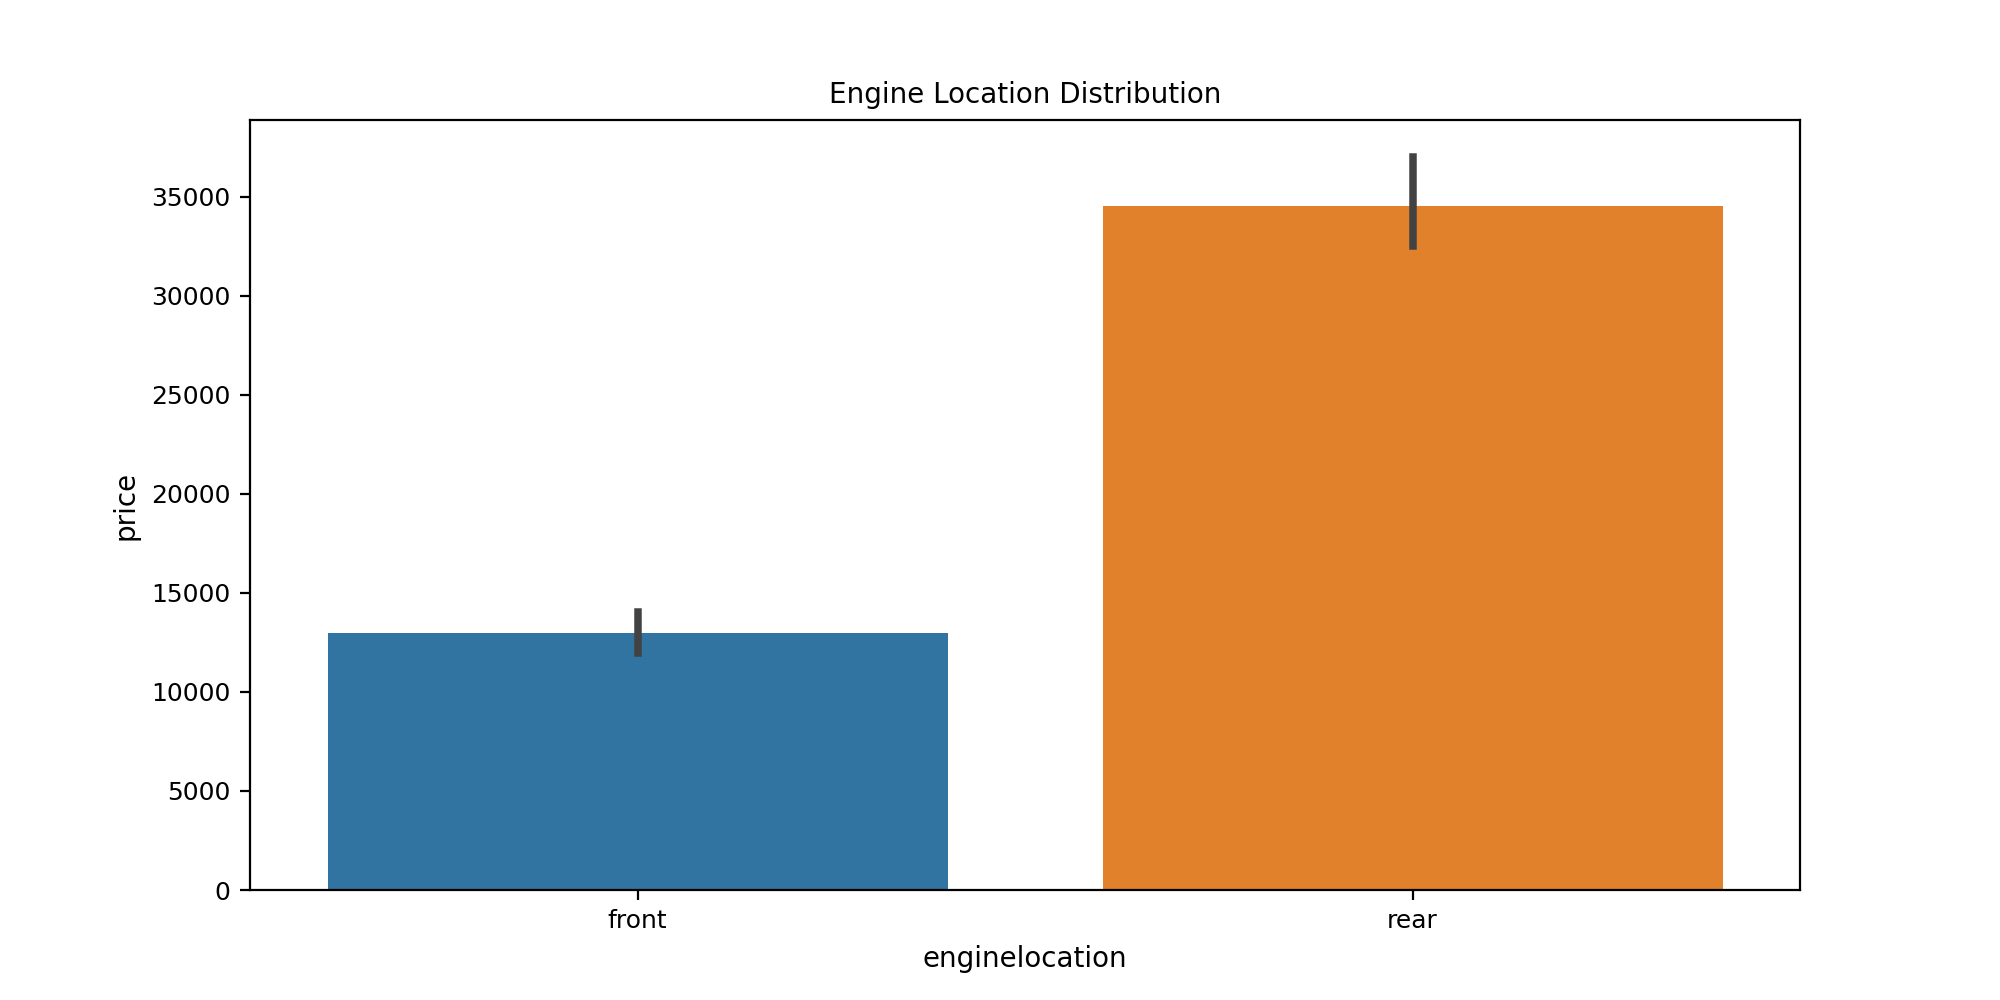

In [235]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 10,
         'axes.titlesize':10,
         'xtick.labelsize':9,
         'ytick.labelsize':9}
pylab.rcParams.update(params)
plt.figure(figsize=(10,5))
plt.title("Engine Location Distribution")
sns.barplot(x = 'enginelocation', y = 'price', data = df)
plt.show()

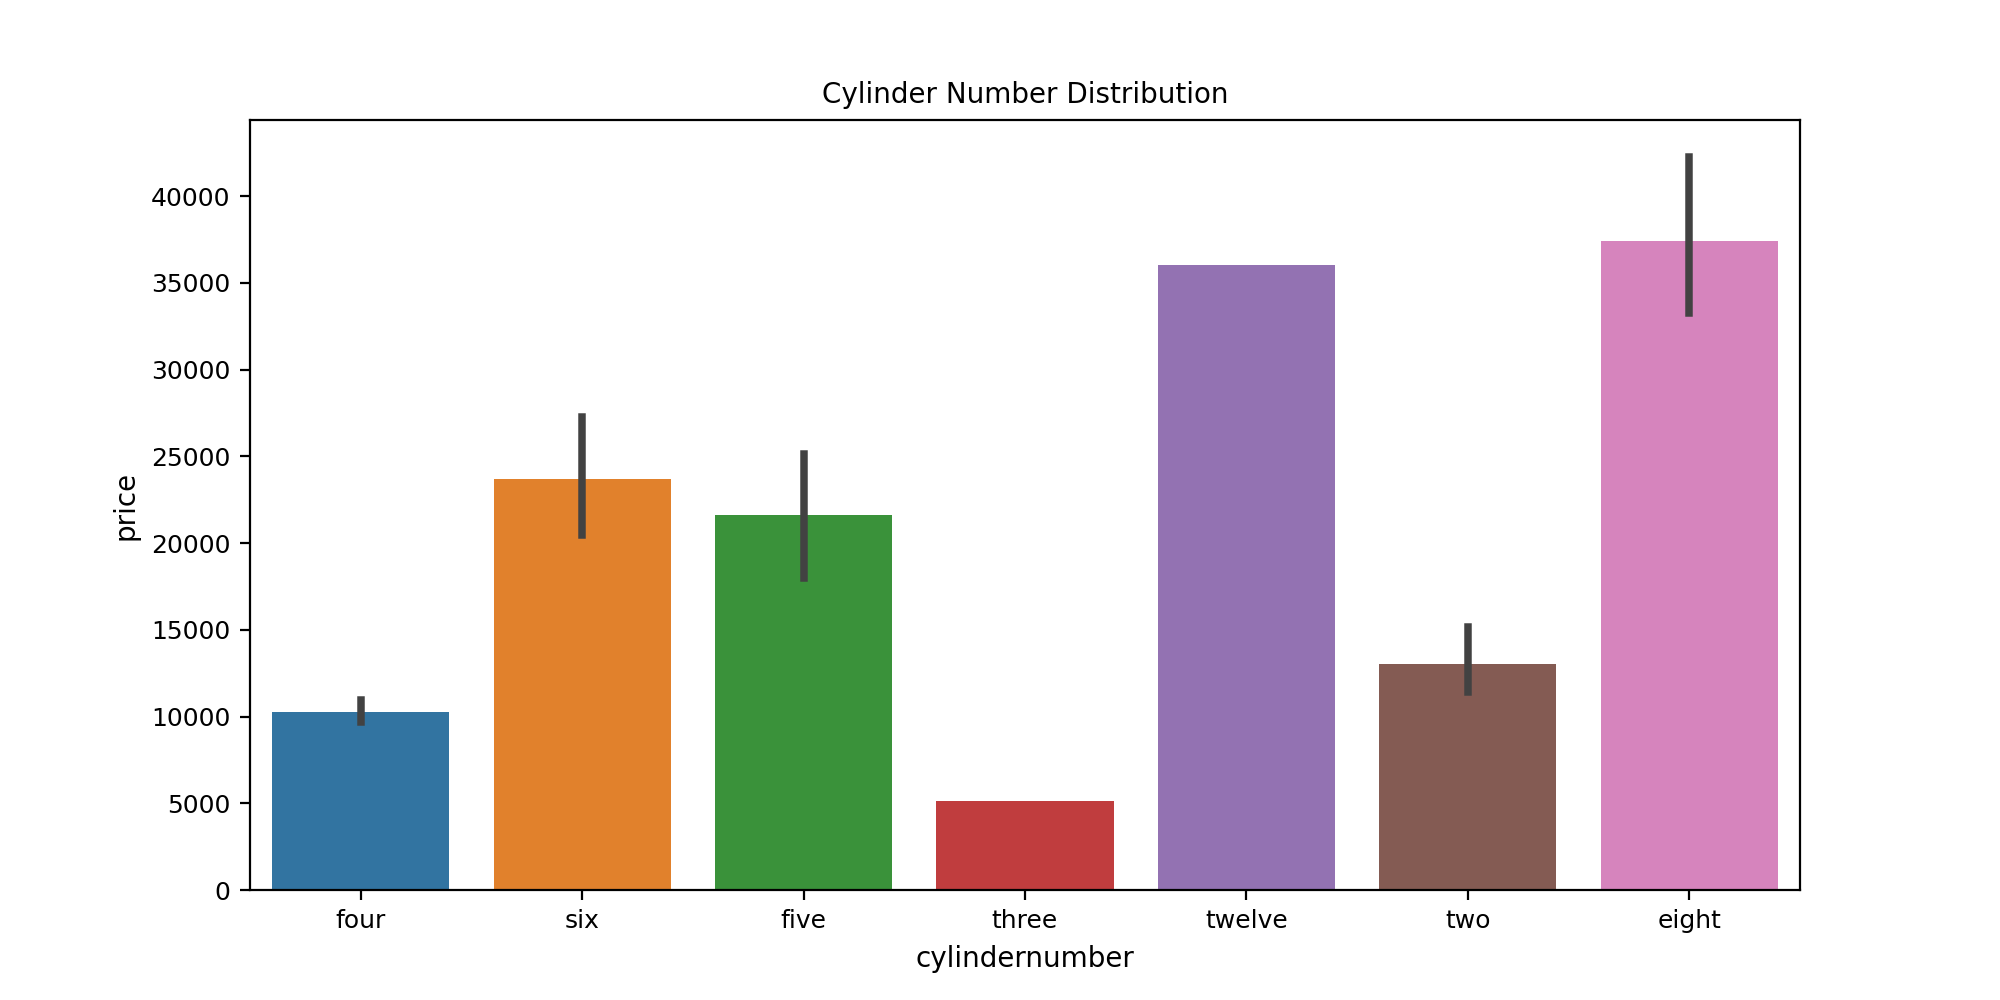

In [236]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 10,
         'axes.titlesize':10,
         'xtick.labelsize':9,
         'ytick.labelsize':9}
pylab.rcParams.update(params)
plt.figure(figsize=(10,5))
plt.title("Cylinder Number Distribution")
sns.barplot(x = 'cylindernumber', y = 'price', data = df)
plt.show()

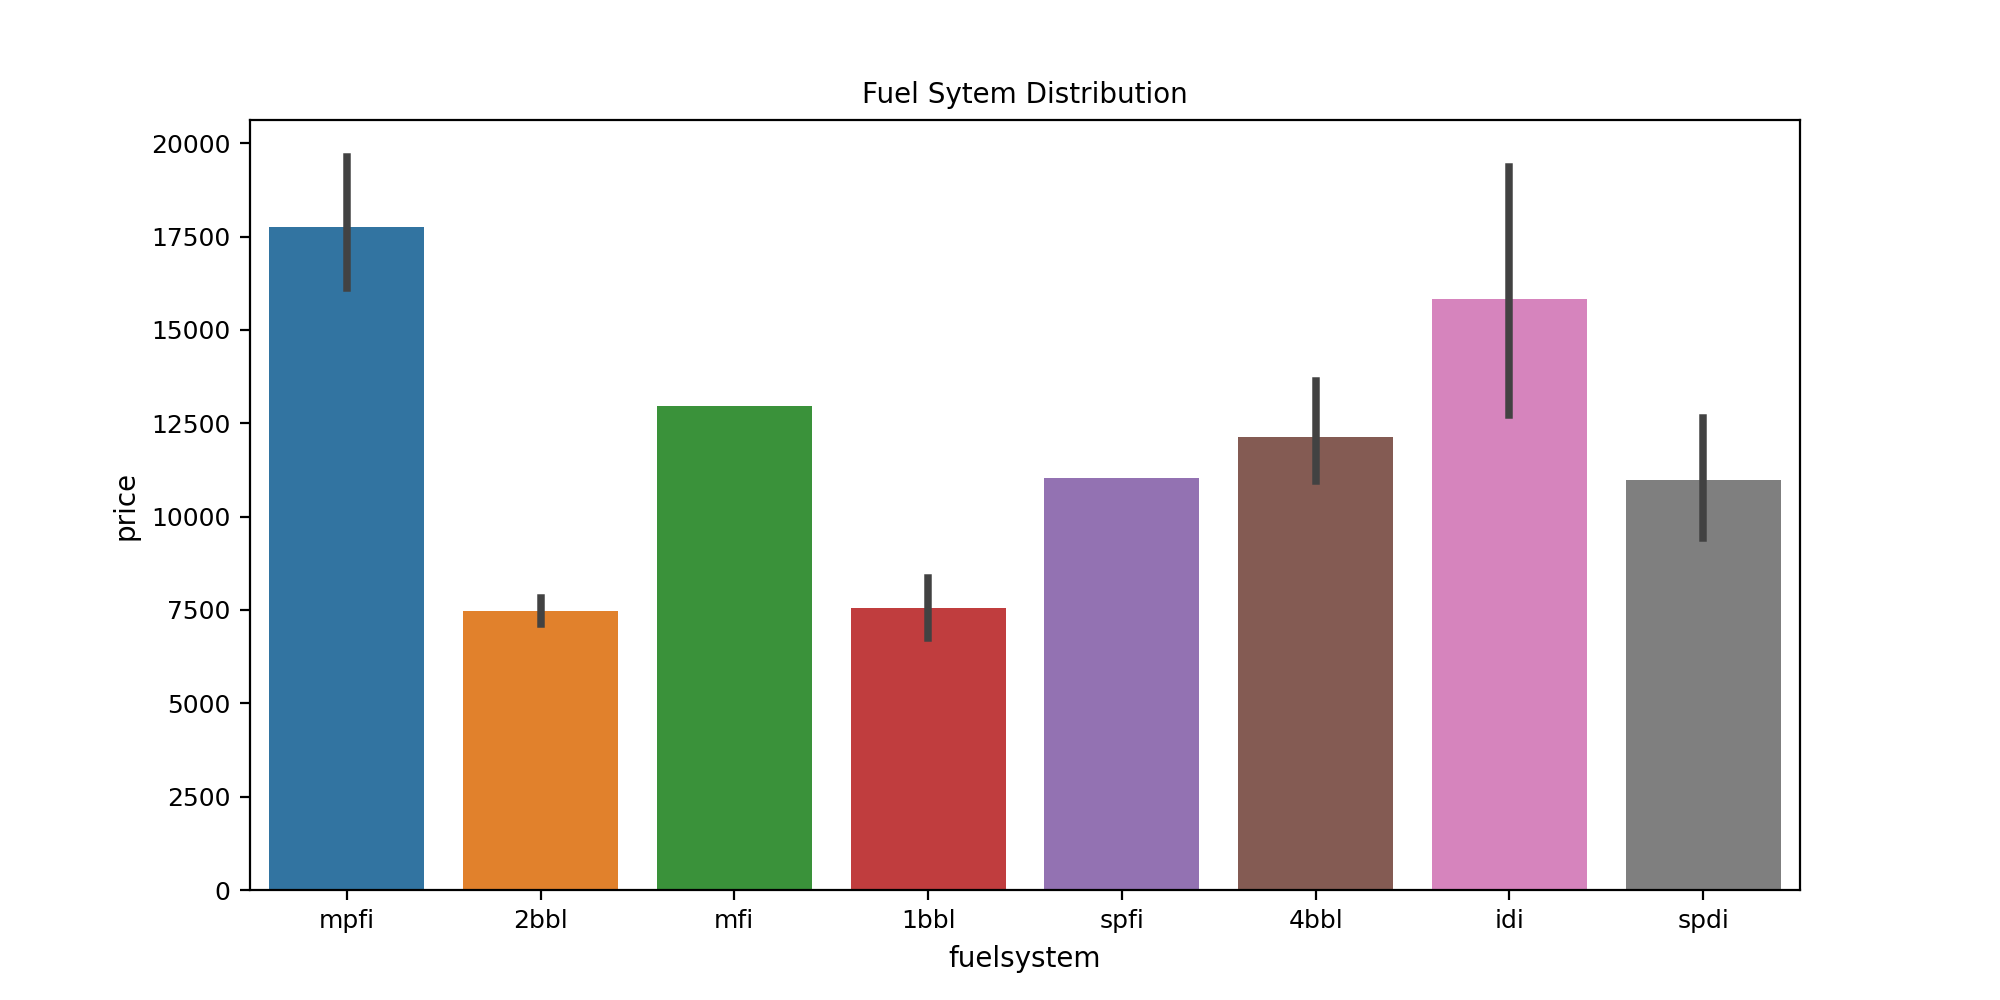

In [237]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 10,
         'axes.titlesize':10,
         'xtick.labelsize':9,
         'ytick.labelsize':9}
pylab.rcParams.update(params)
plt.figure(figsize=(10,5))
plt.title("Fuel Sytem Distribution")
sns.barplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

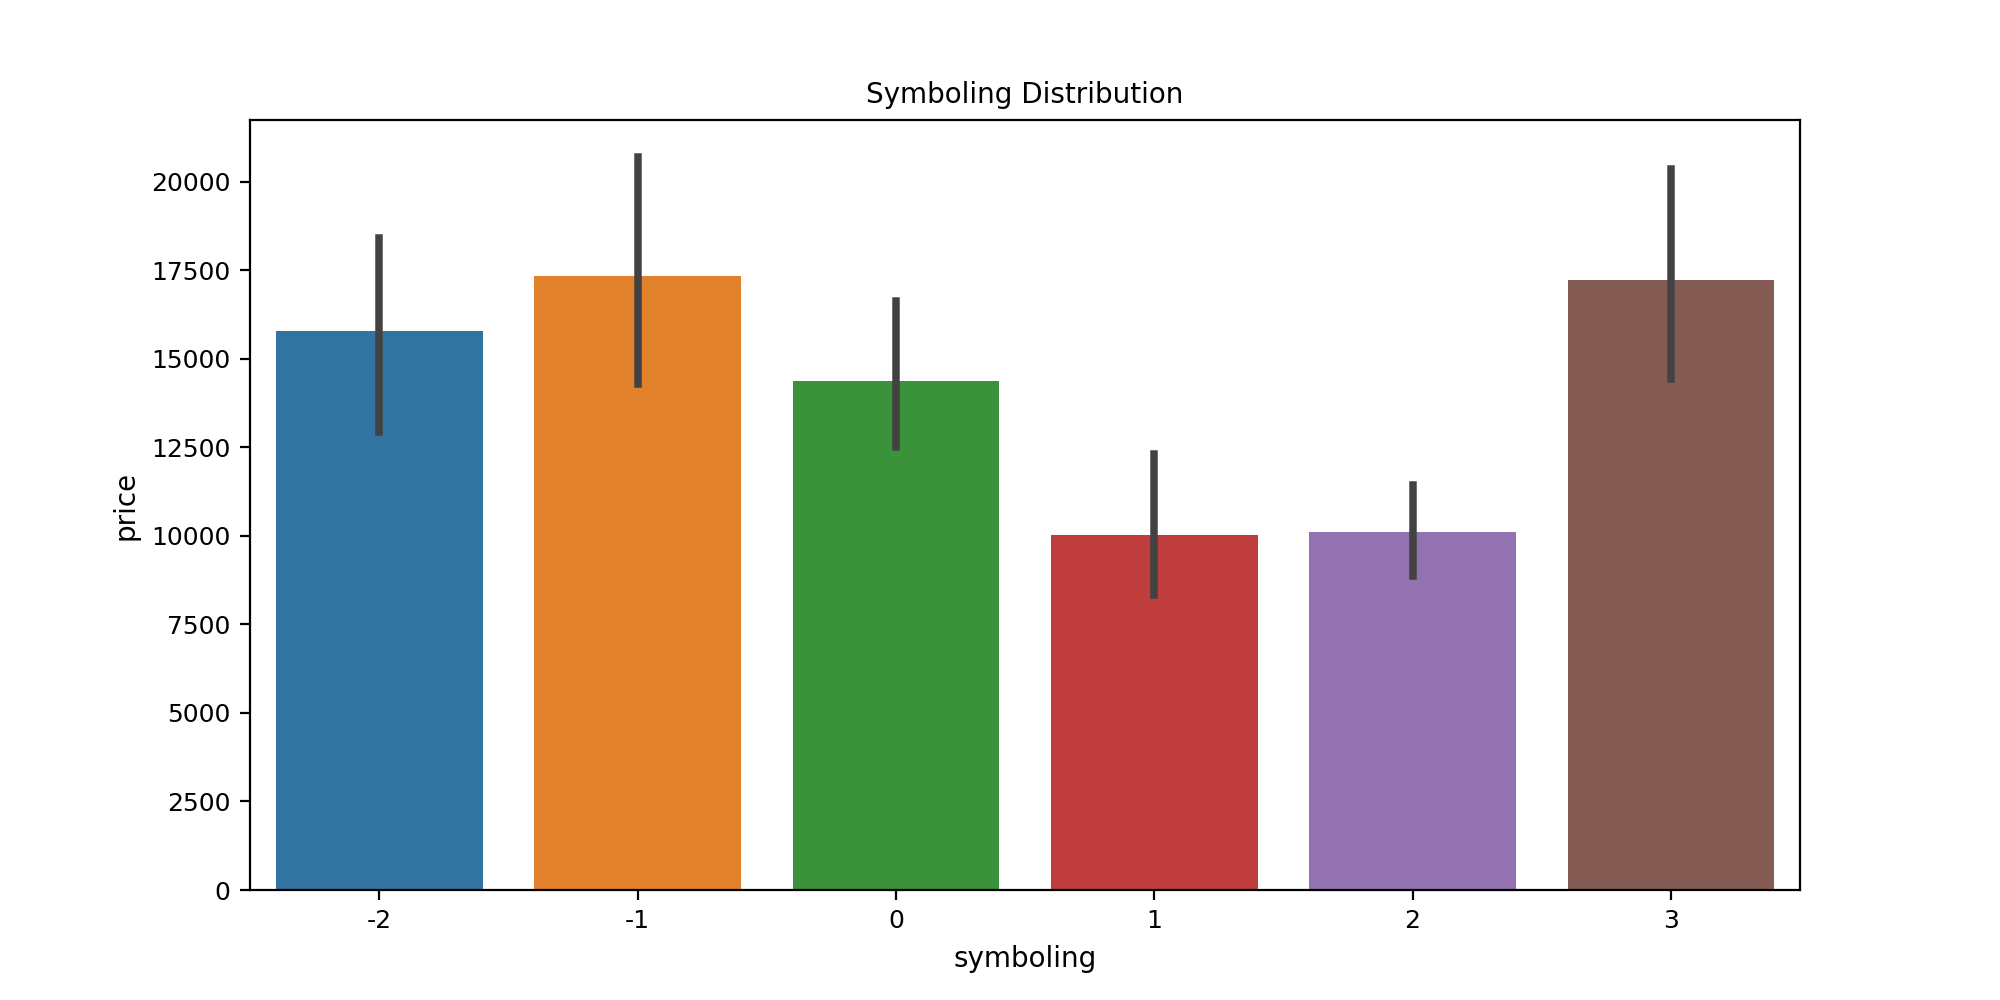

In [240]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 10,
         'axes.titlesize':10,
         'xtick.labelsize':9,
         'ytick.labelsize':9}
pylab.rcParams.update(params)
plt.figure(figsize=(10,5))
plt.title("Symboling Distribution")
sns.barplot(x = 'symboling', y = 'price', data = df)
plt.show()

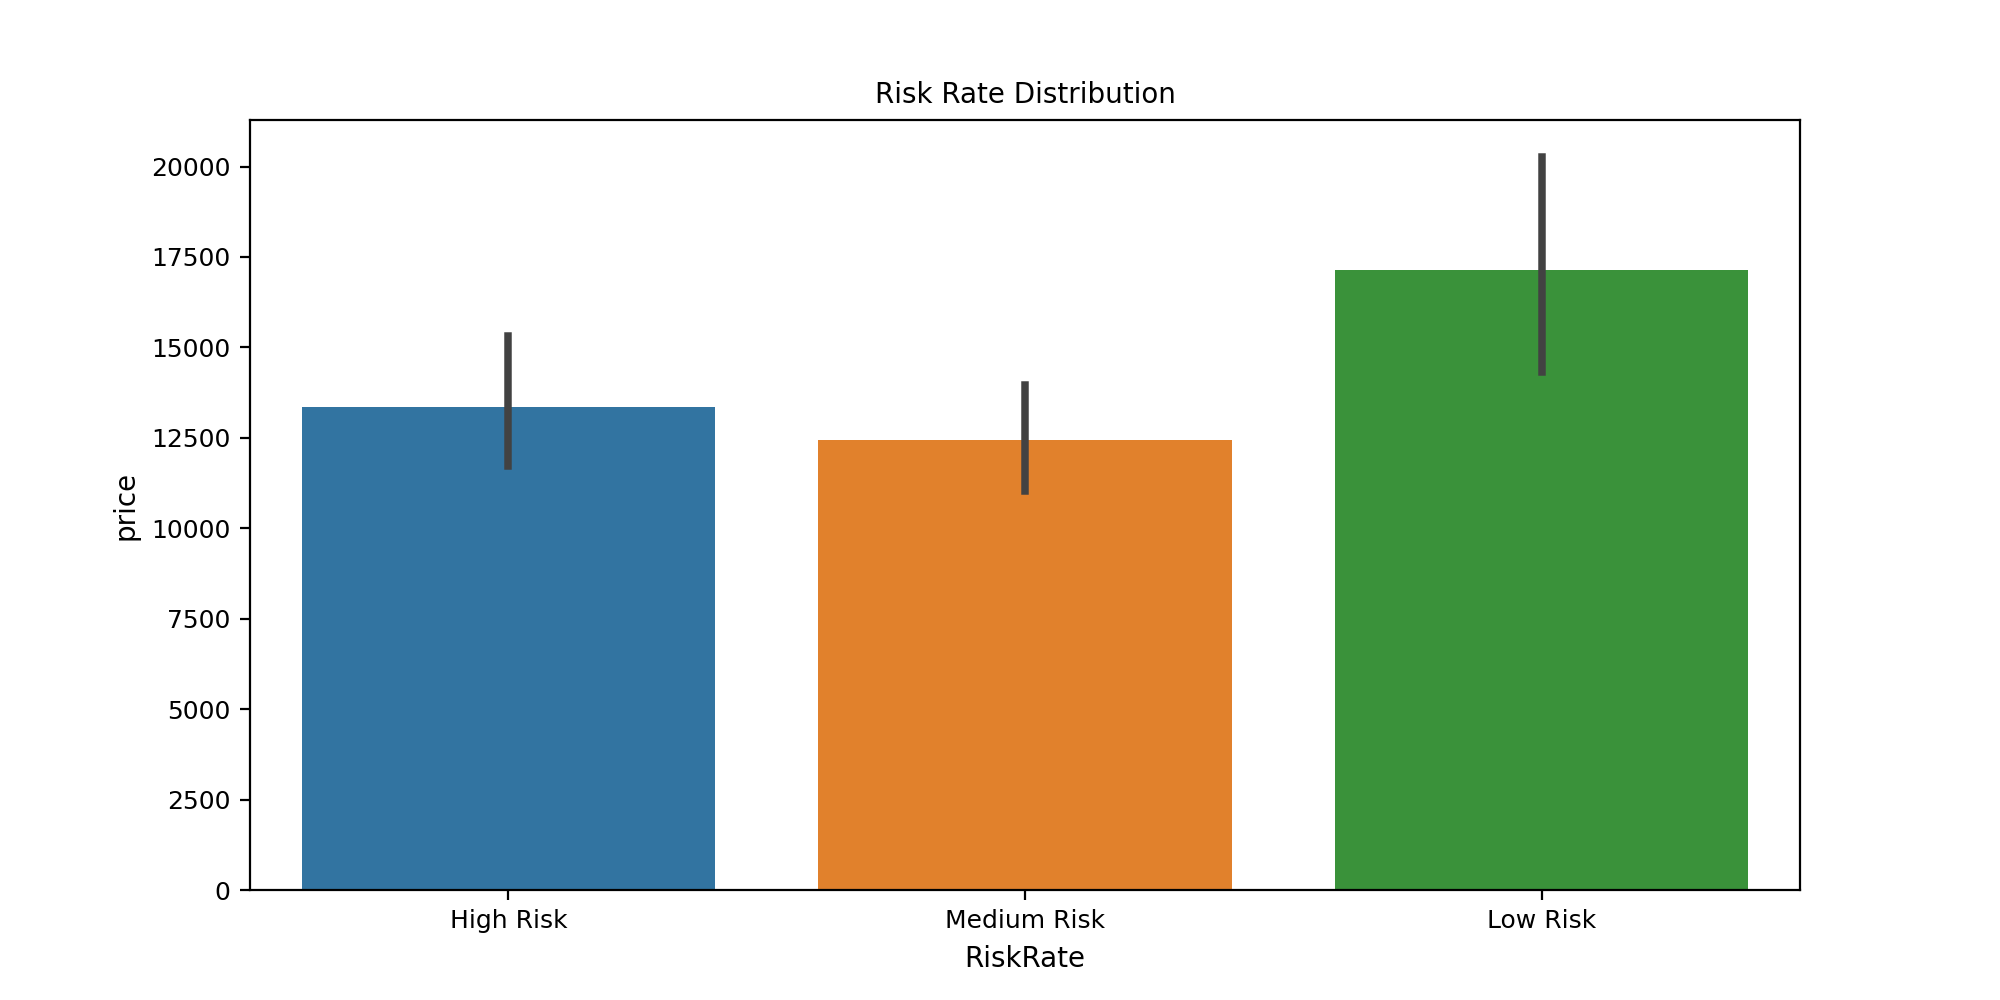

In [241]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 10,
         'axes.titlesize':10,
         'xtick.labelsize':9,
         'ytick.labelsize':9}
pylab.rcParams.update(params)
plt.figure(figsize=(10,5))
plt.title("Risk Rate Distribution")
sns.barplot(x = 'RiskRate', y = 'price', data = df)
plt.show()

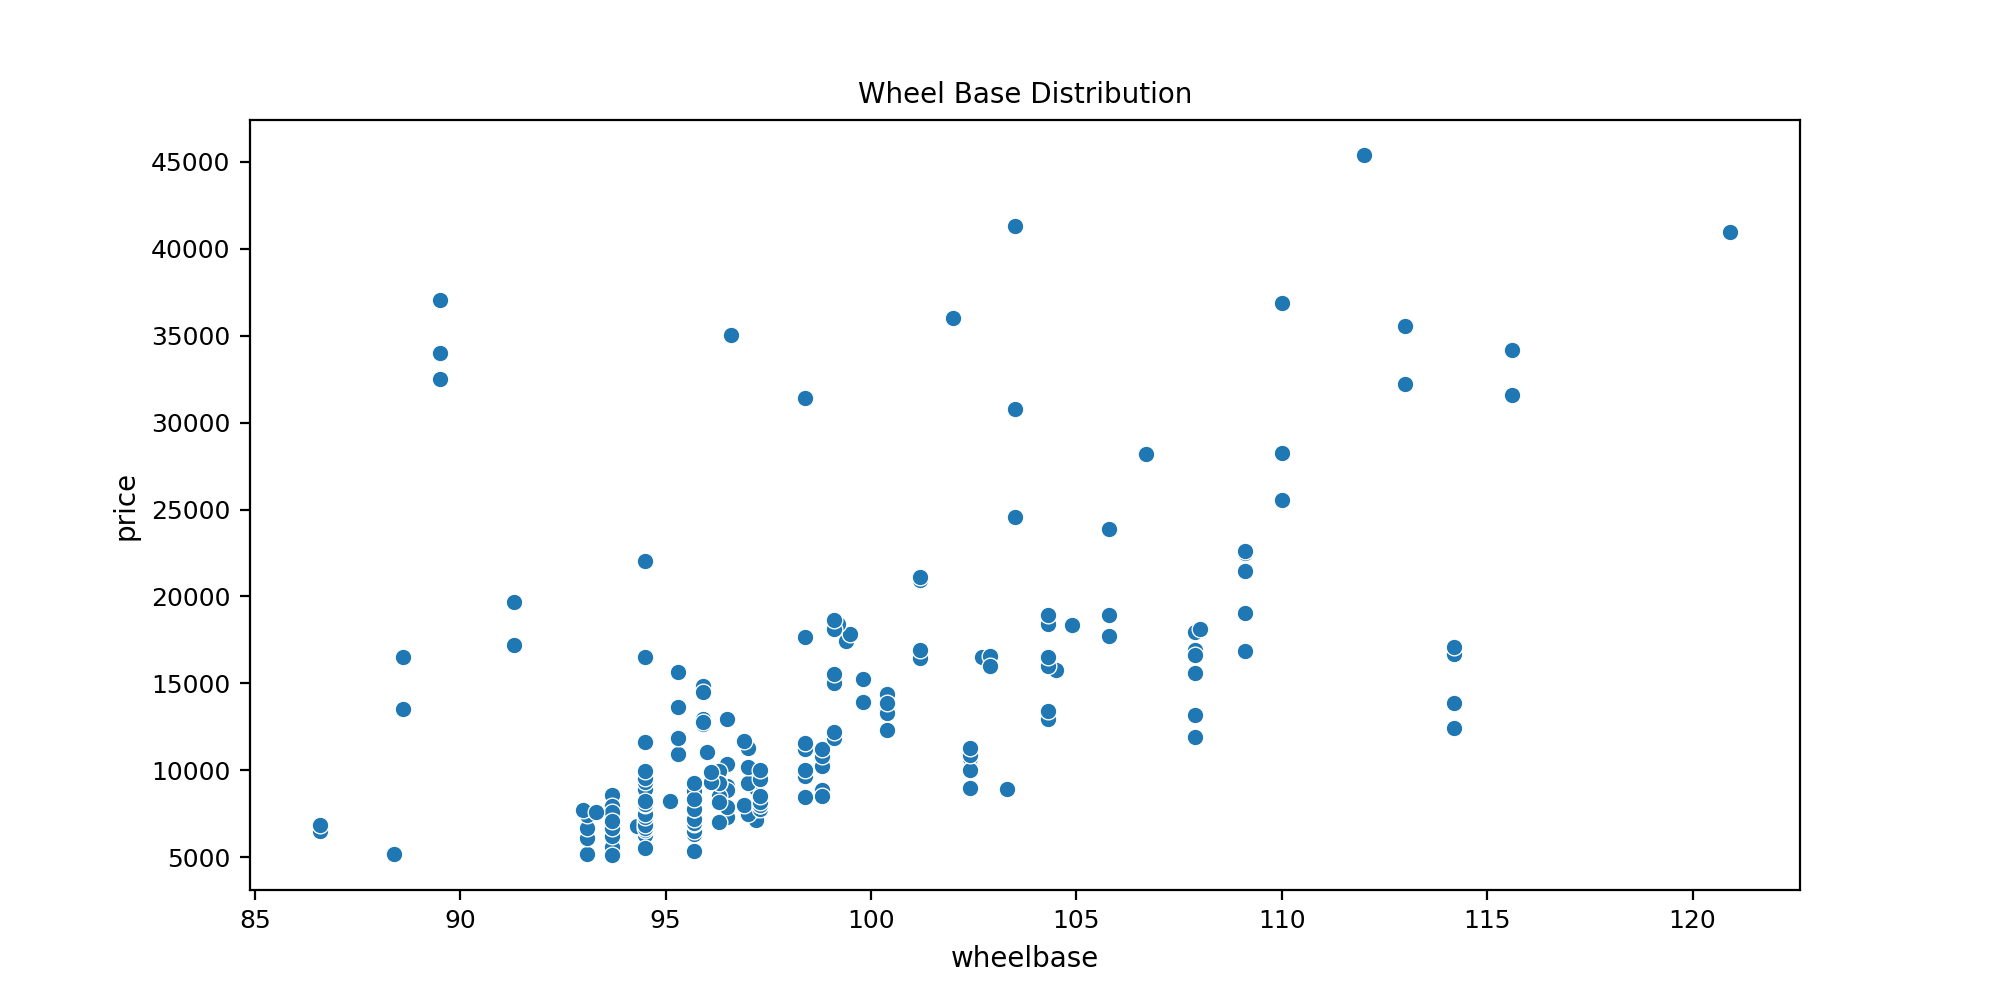

In [244]:
plt.figure(figsize=(10,5))
plt.title("Wheel Base Distribution")
sns.scatterplot(x = 'wheelbase', y = 'price', data = df)
plt.show()

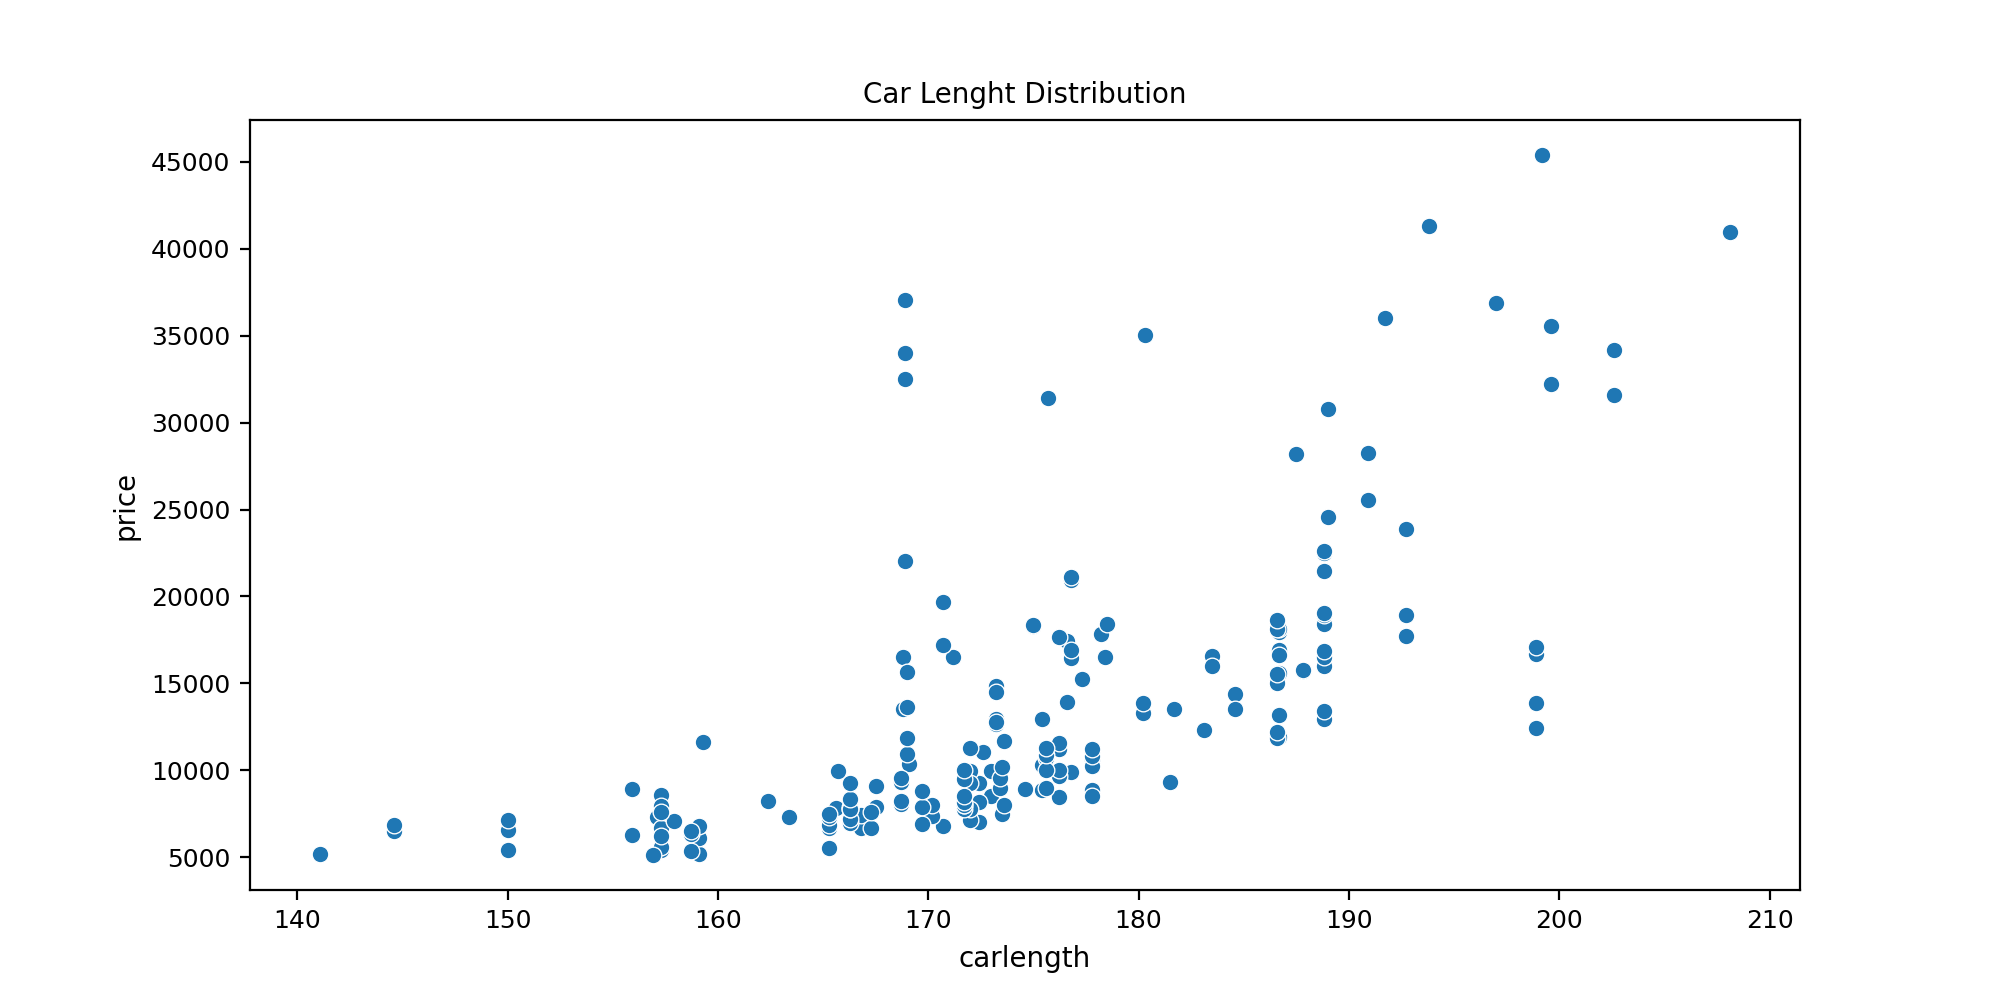

In [245]:
plt.figure(figsize=(10,5))
plt.title("Car Lenght Distribution")
sns.scatterplot(x = 'carlength', y = 'price', data = df)
plt.show()

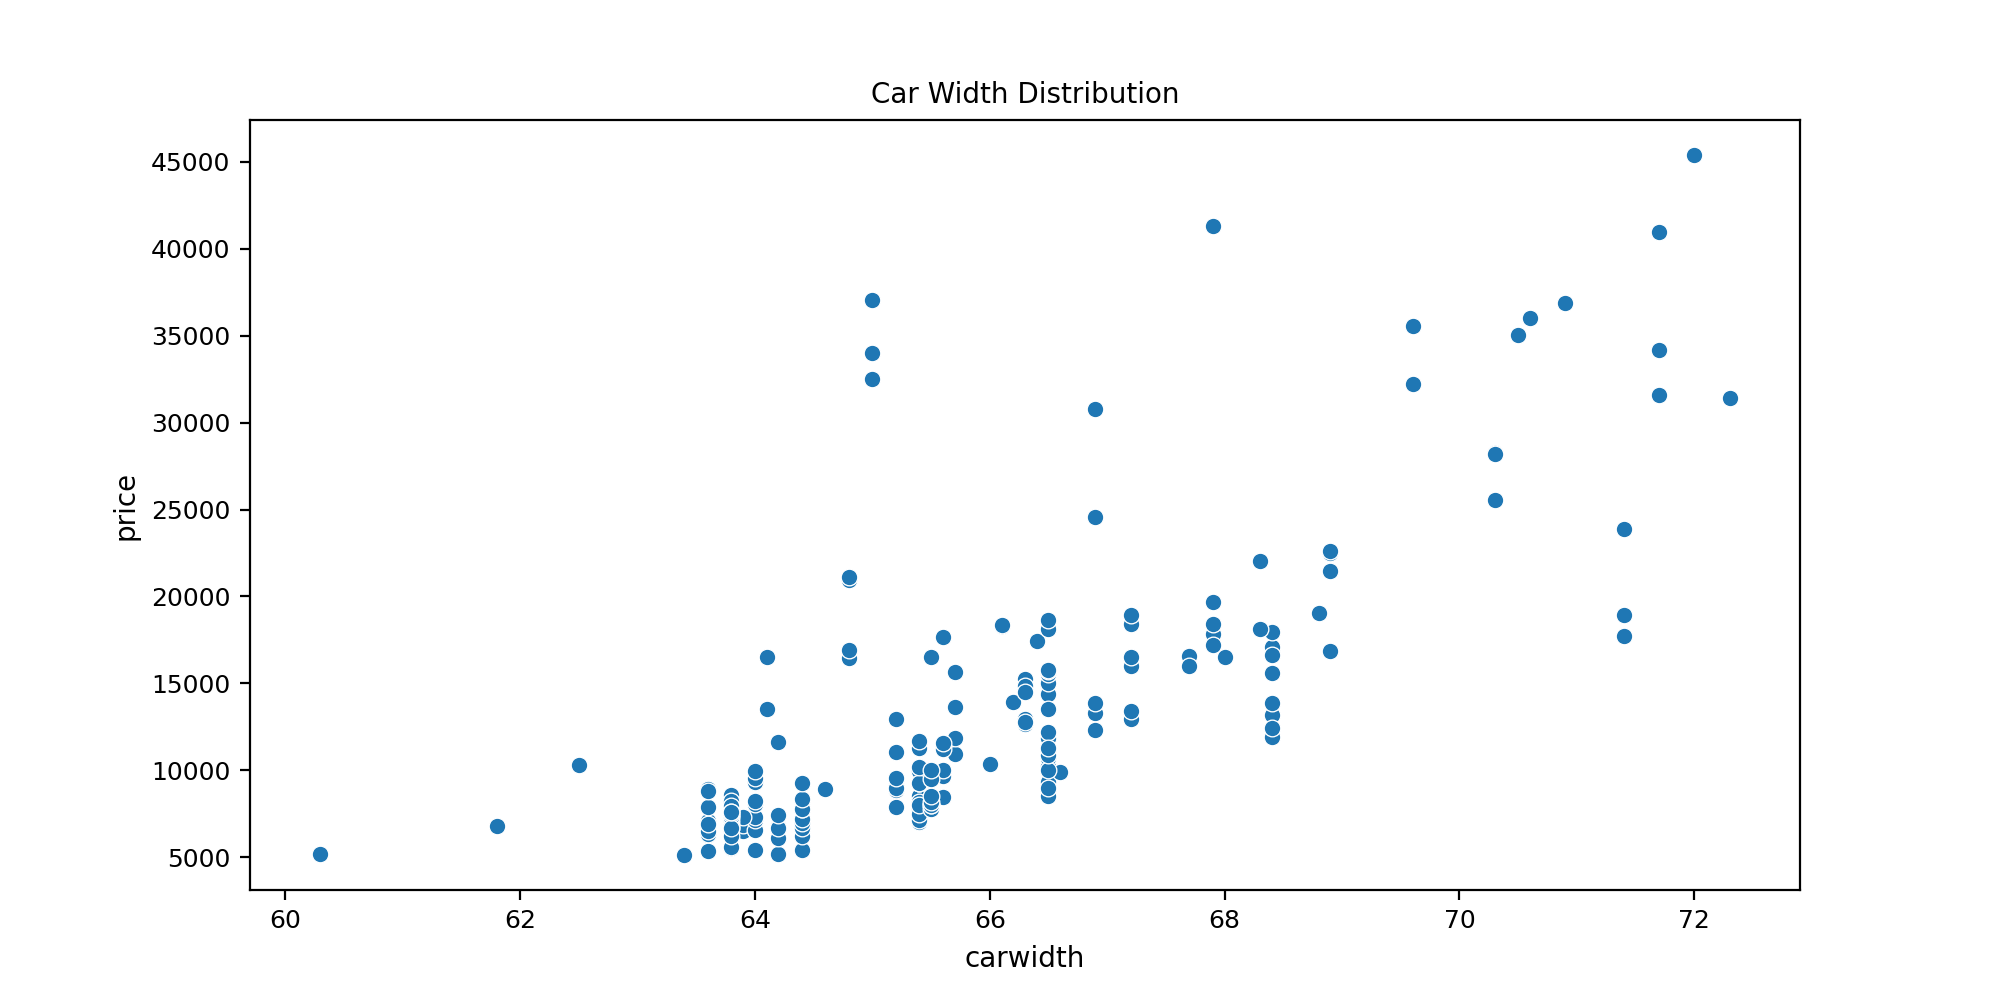

In [246]:
plt.figure(figsize=(10,5))
plt.title("Car Width Distribution")
sns.scatterplot(x = 'carwidth', y = 'price', data = df)
plt.show()

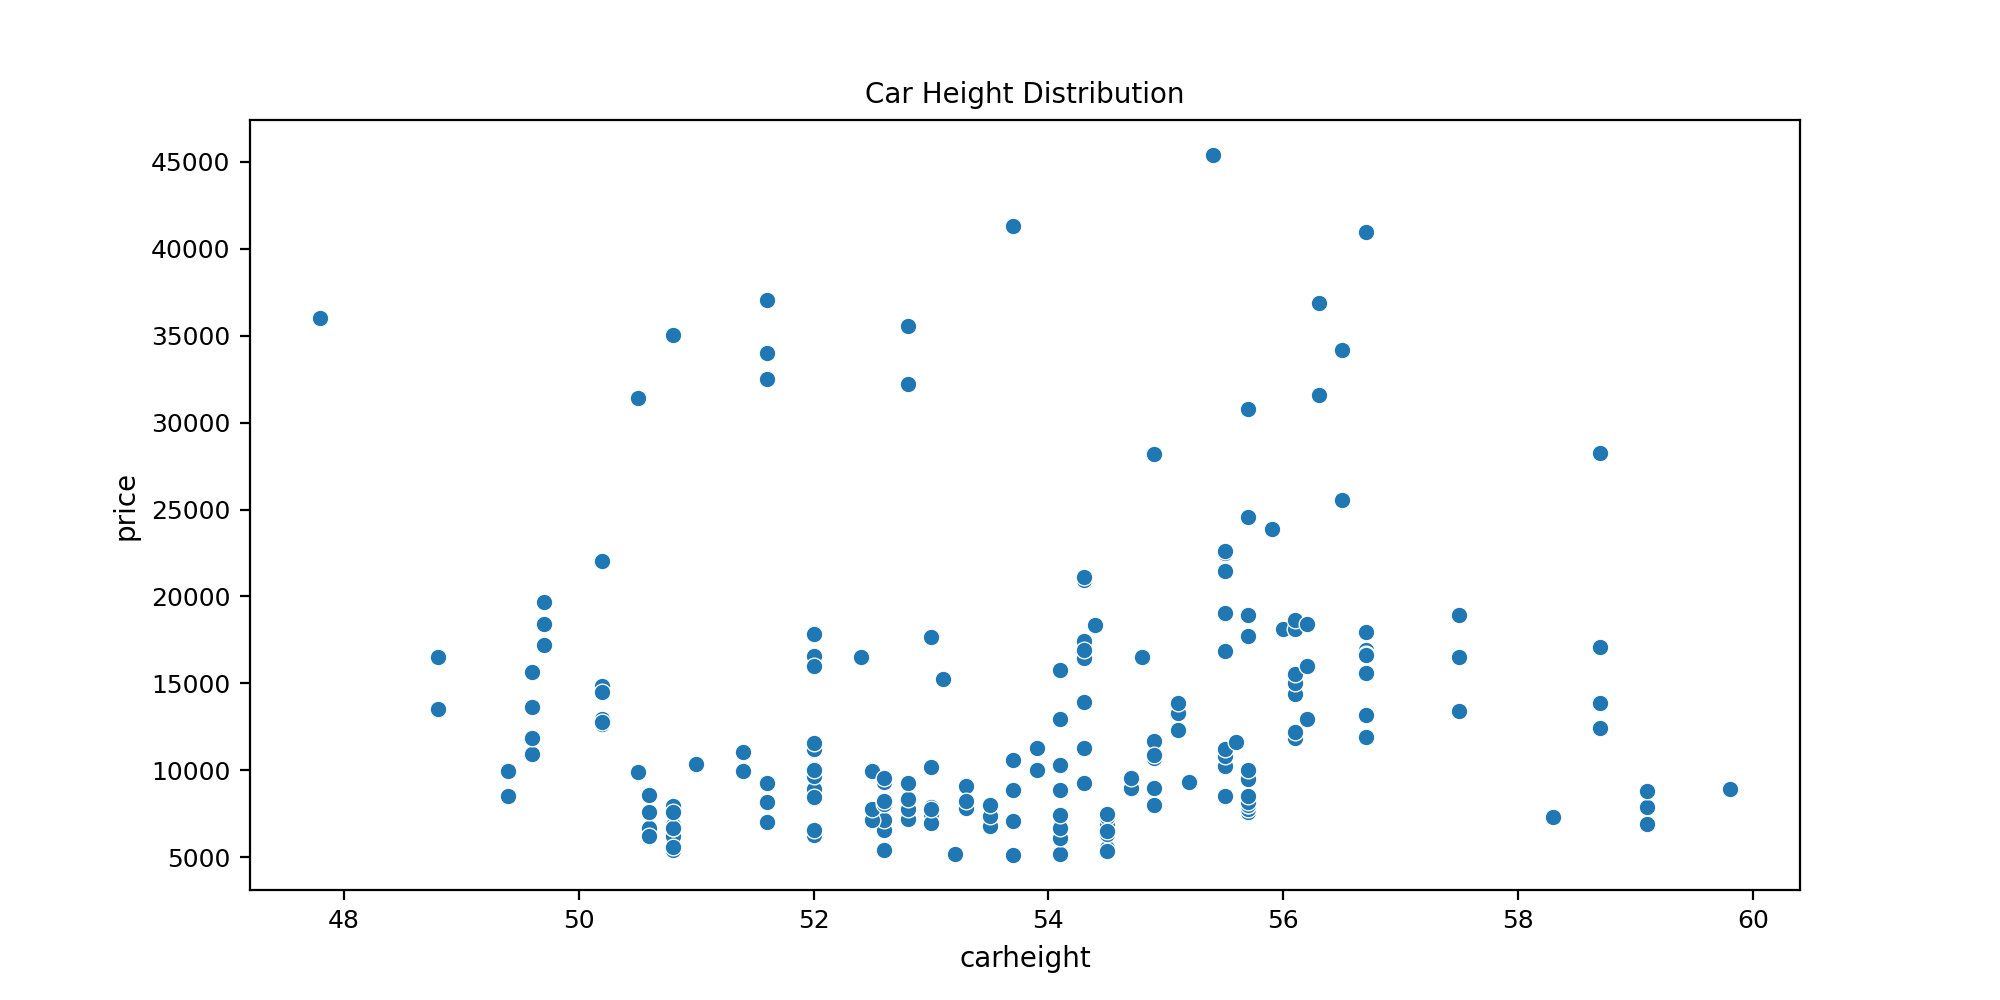

In [247]:
plt.figure(figsize=(10,5))
plt.title("Car Height Distribution")
sns.scatterplot(x = 'carheight', y = 'price', data = df)
plt.show()

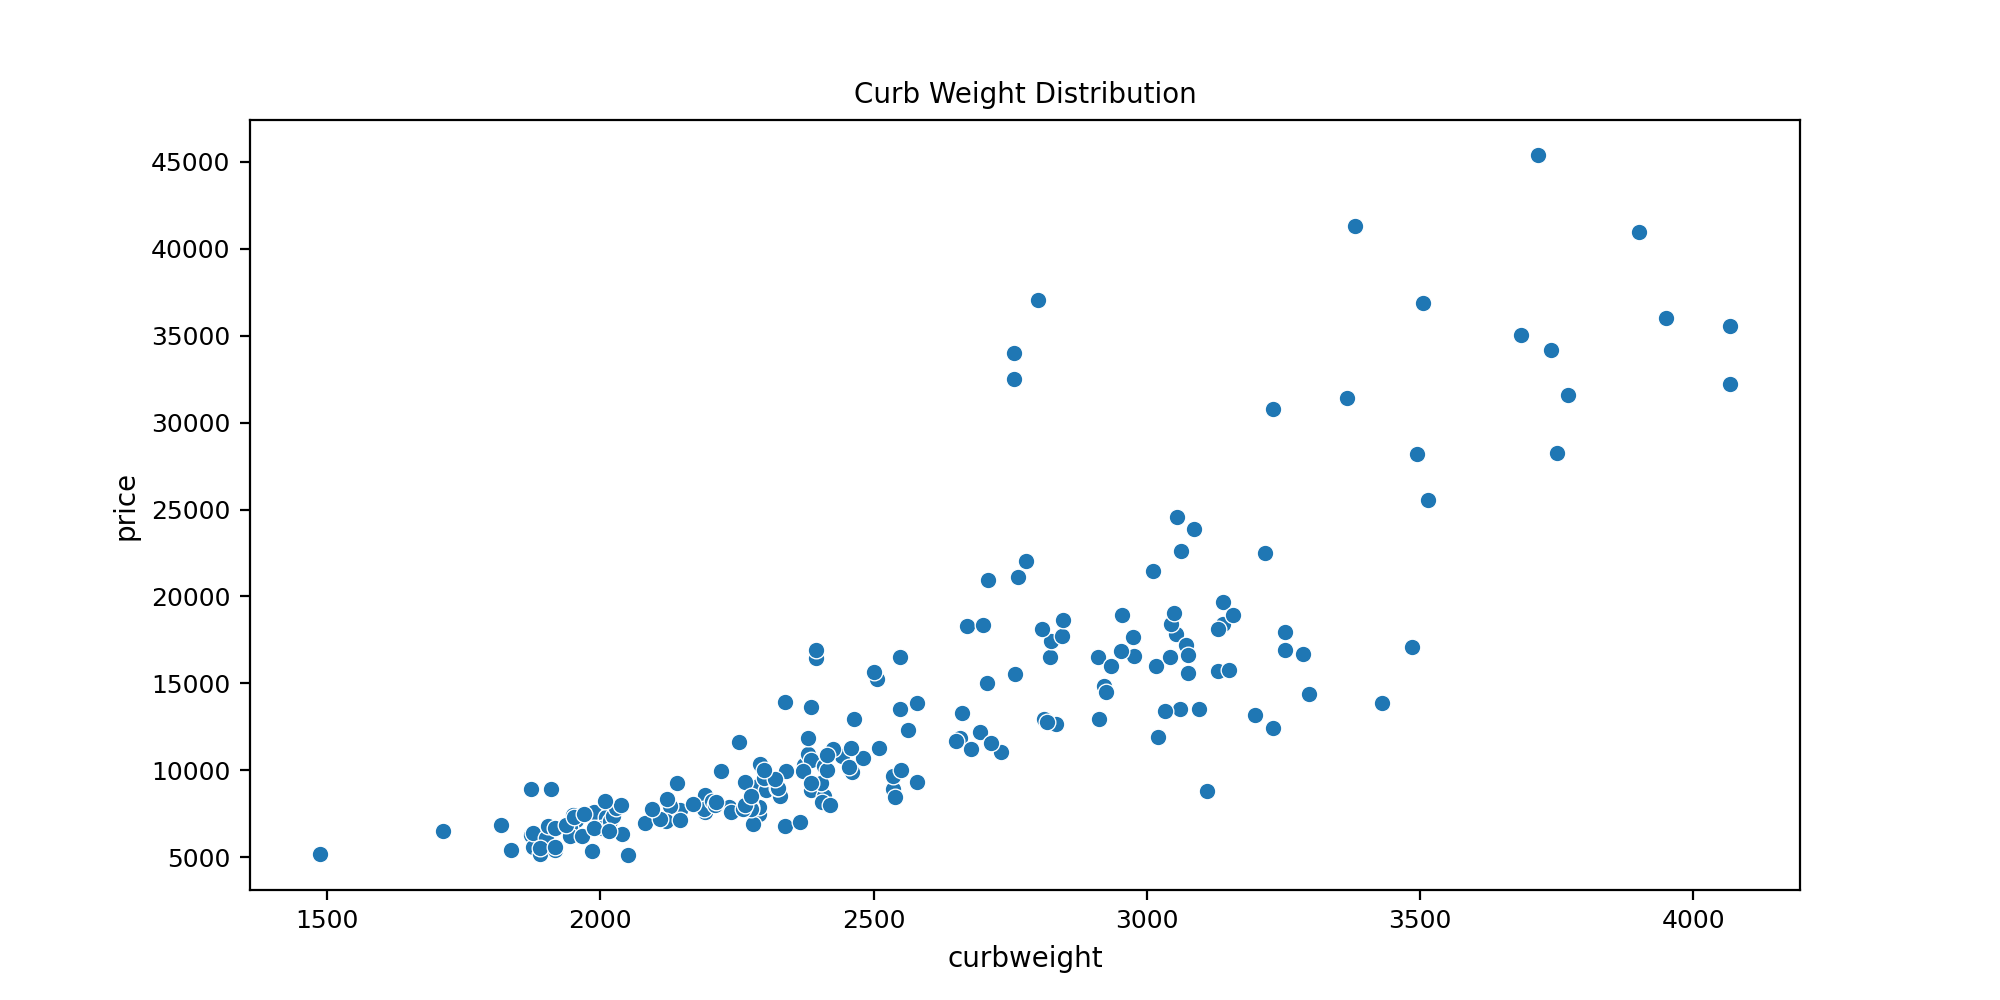

In [248]:
plt.figure(figsize=(10,5))
plt.title("Curb Weight Distribution")
sns.scatterplot(x = 'curbweight', y = 'price', data = df)
plt.show()

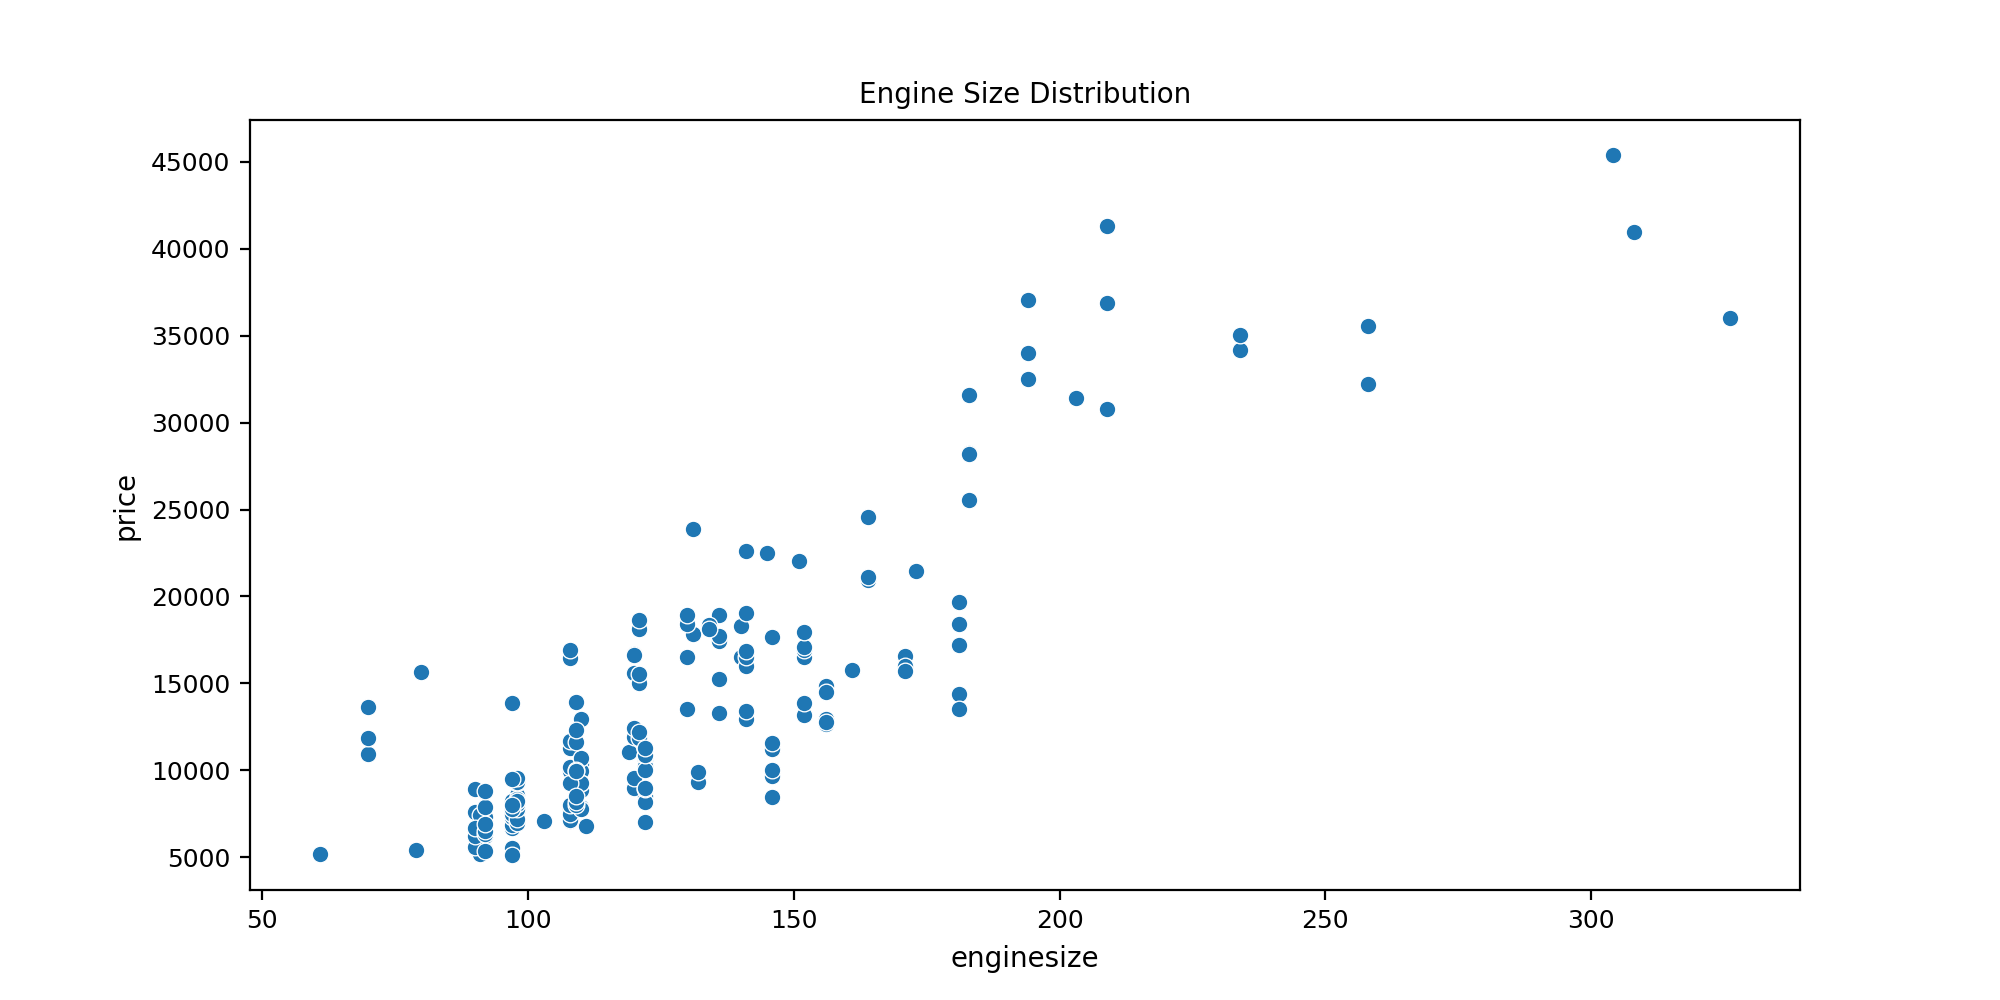

In [250]:
plt.figure(figsize=(10,5))
plt.title("Engine Size Distribution")
sns.scatterplot(x = 'enginesize', y = 'price', data = df)
plt.show()

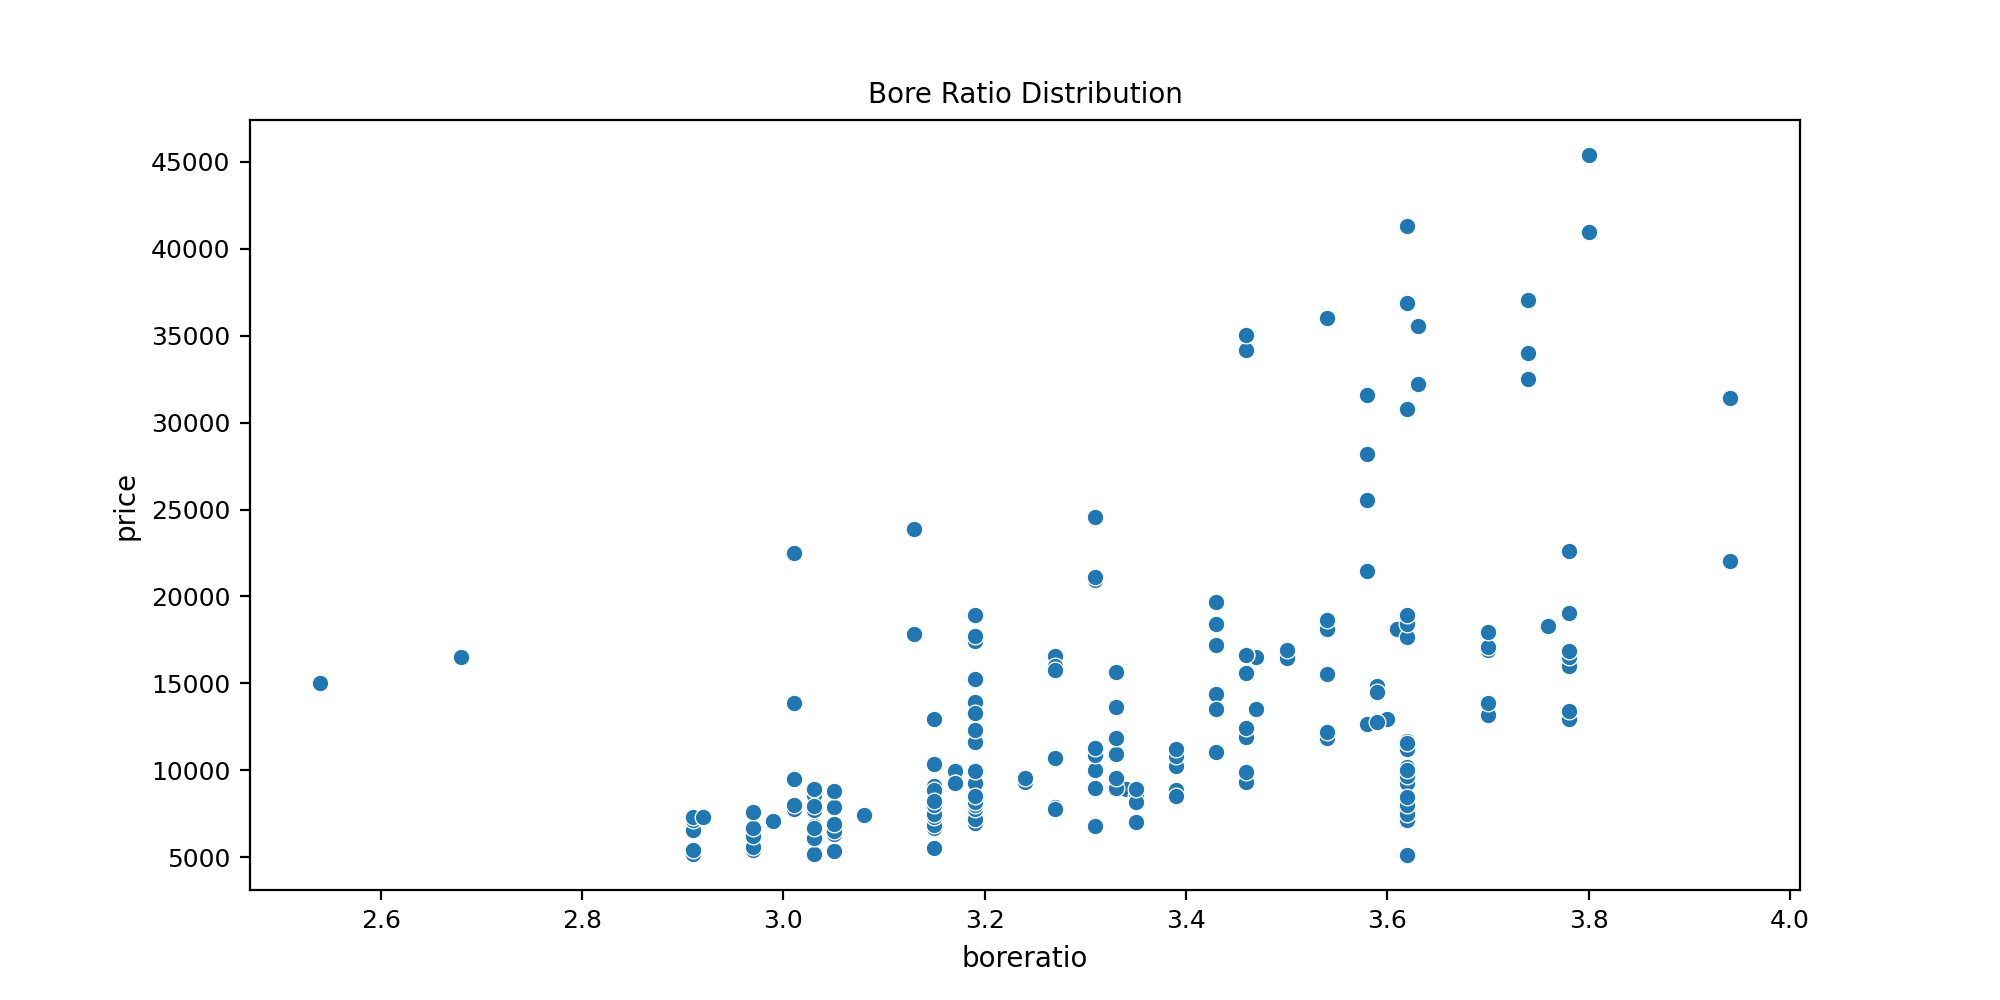

In [251]:
plt.figure(figsize=(10,5))
plt.title("Bore Ratio Distribution")
sns.scatterplot(x = 'boreratio', y = 'price', data = df)
plt.show()

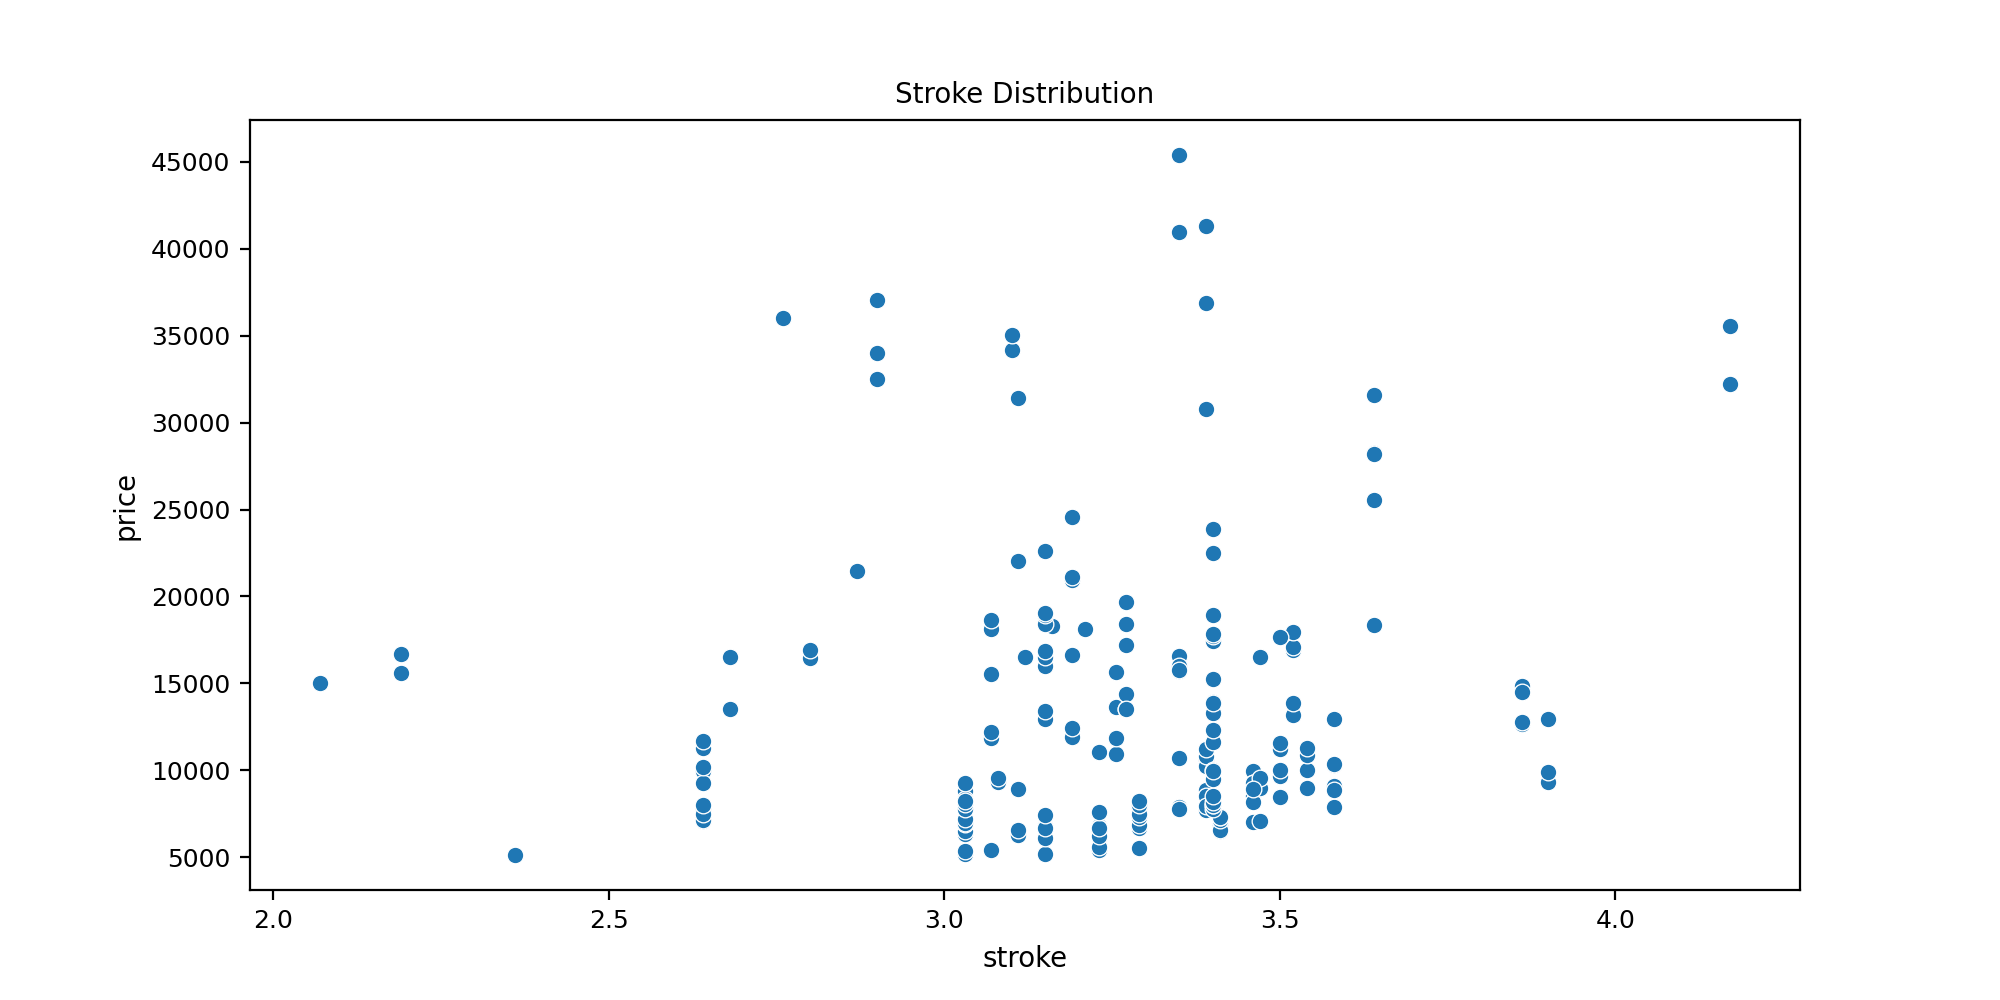

In [252]:
plt.figure(figsize=(10,5))
plt.title("Stroke Distribution")
sns.scatterplot(x = 'stroke', y = 'price', data = df)
plt.show()

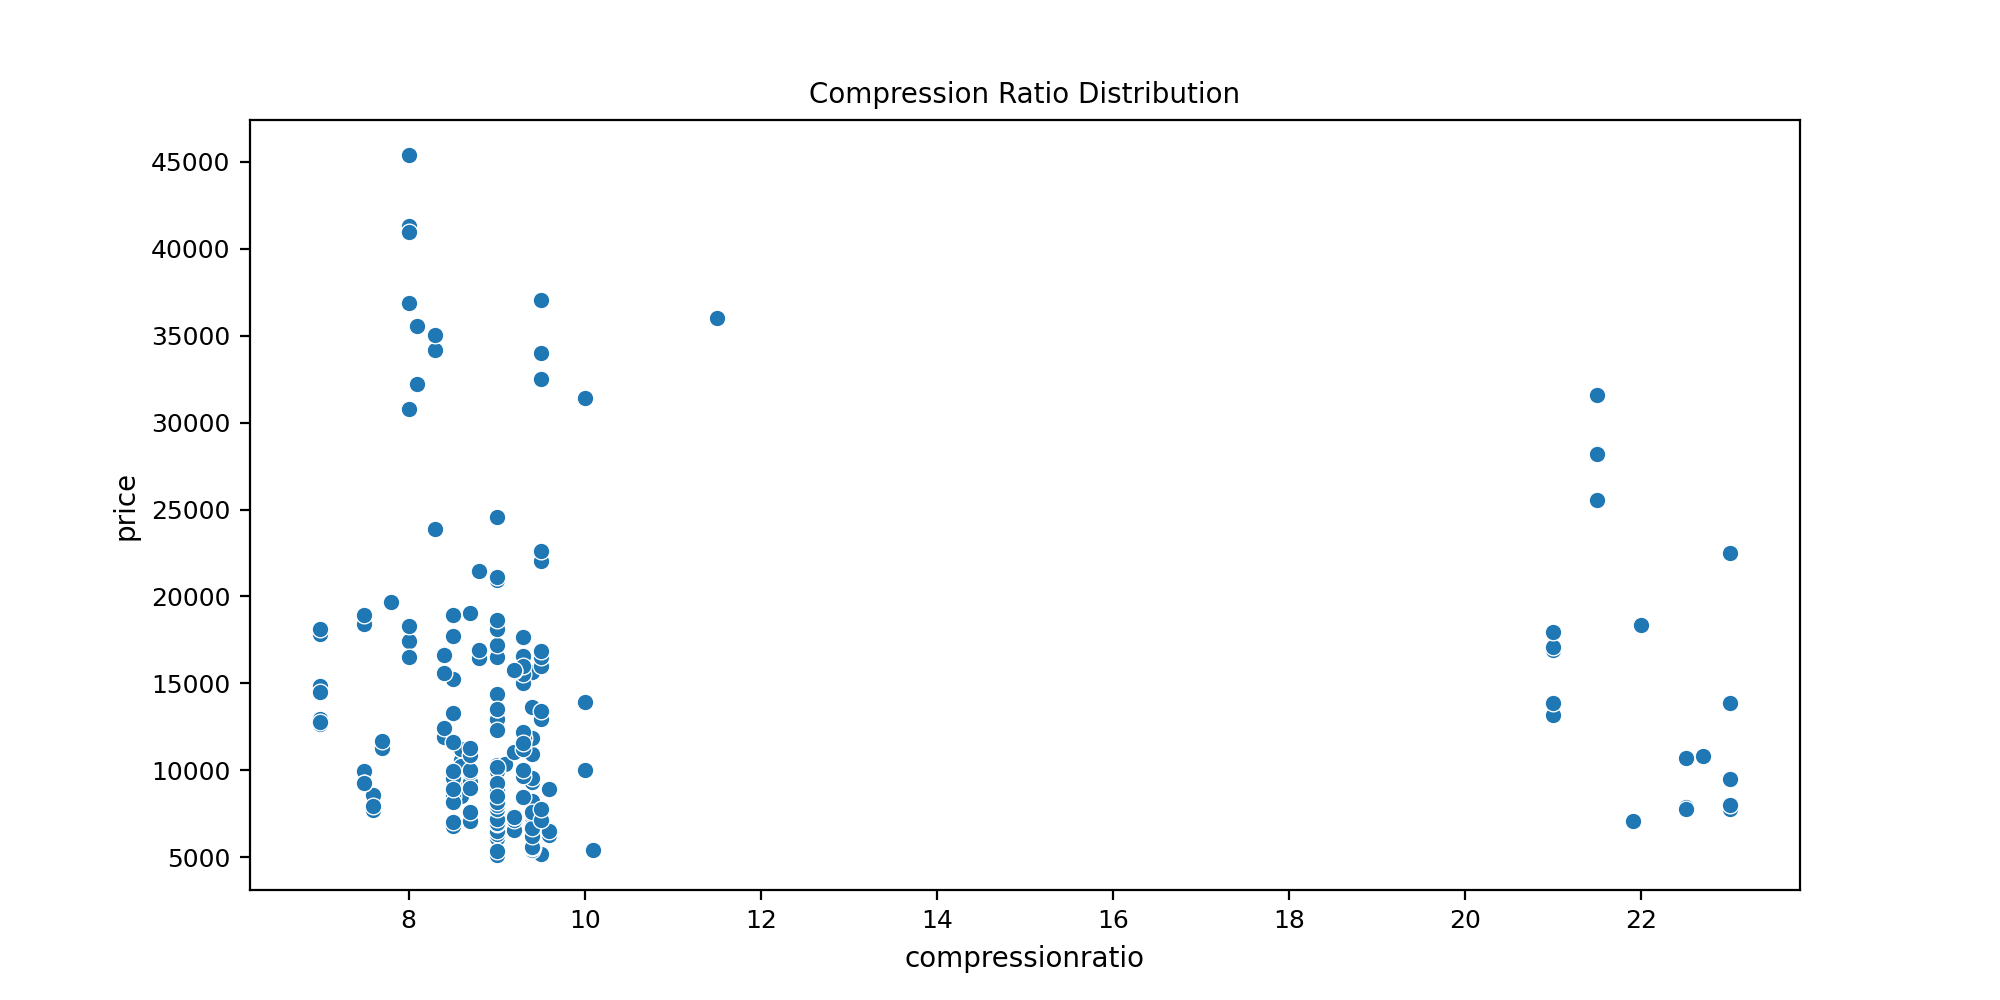

In [253]:
plt.figure(figsize=(10,5))
plt.title("Compression Ratio Distribution")
sns.scatterplot(x = 'compressionratio', y = 'price', data = df)
plt.show()

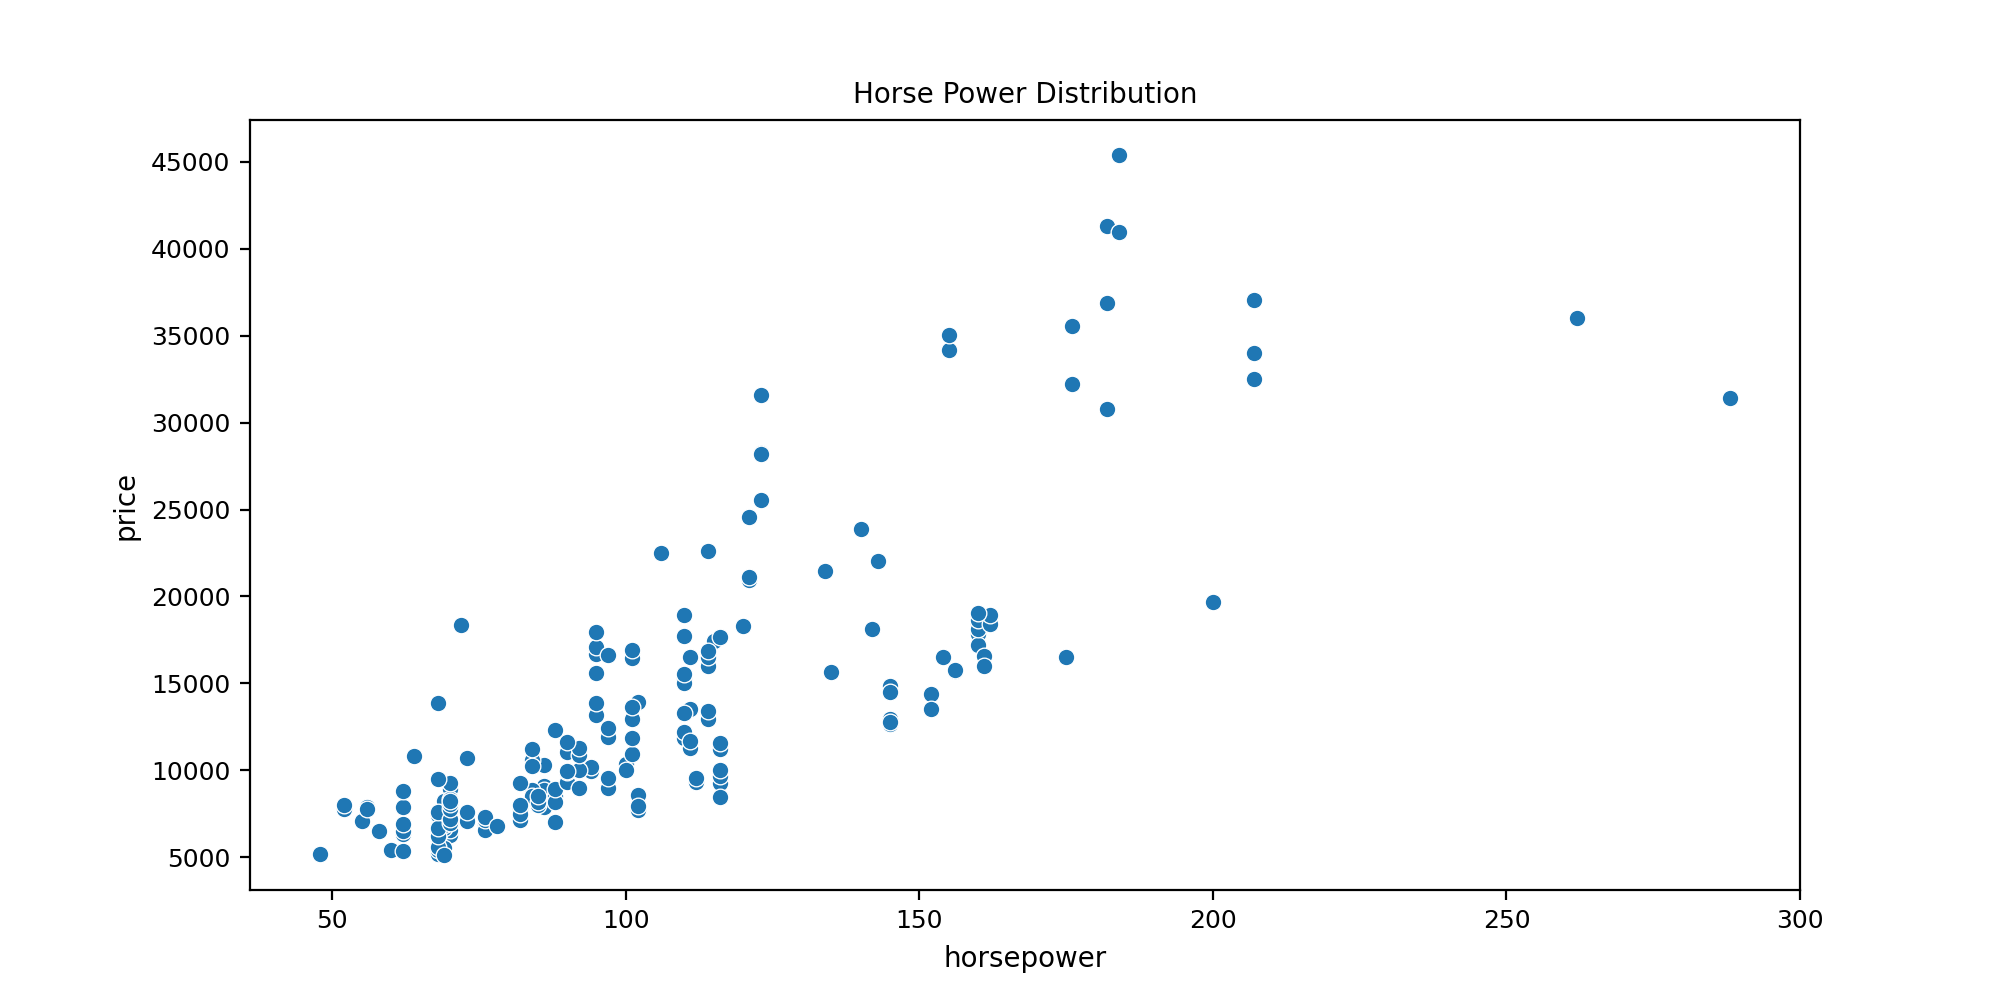

In [254]:
plt.figure(figsize=(10,5))
plt.title("Horse Power Distribution")
sns.scatterplot(x = 'horsepower', y = 'price', data = df)
plt.show()

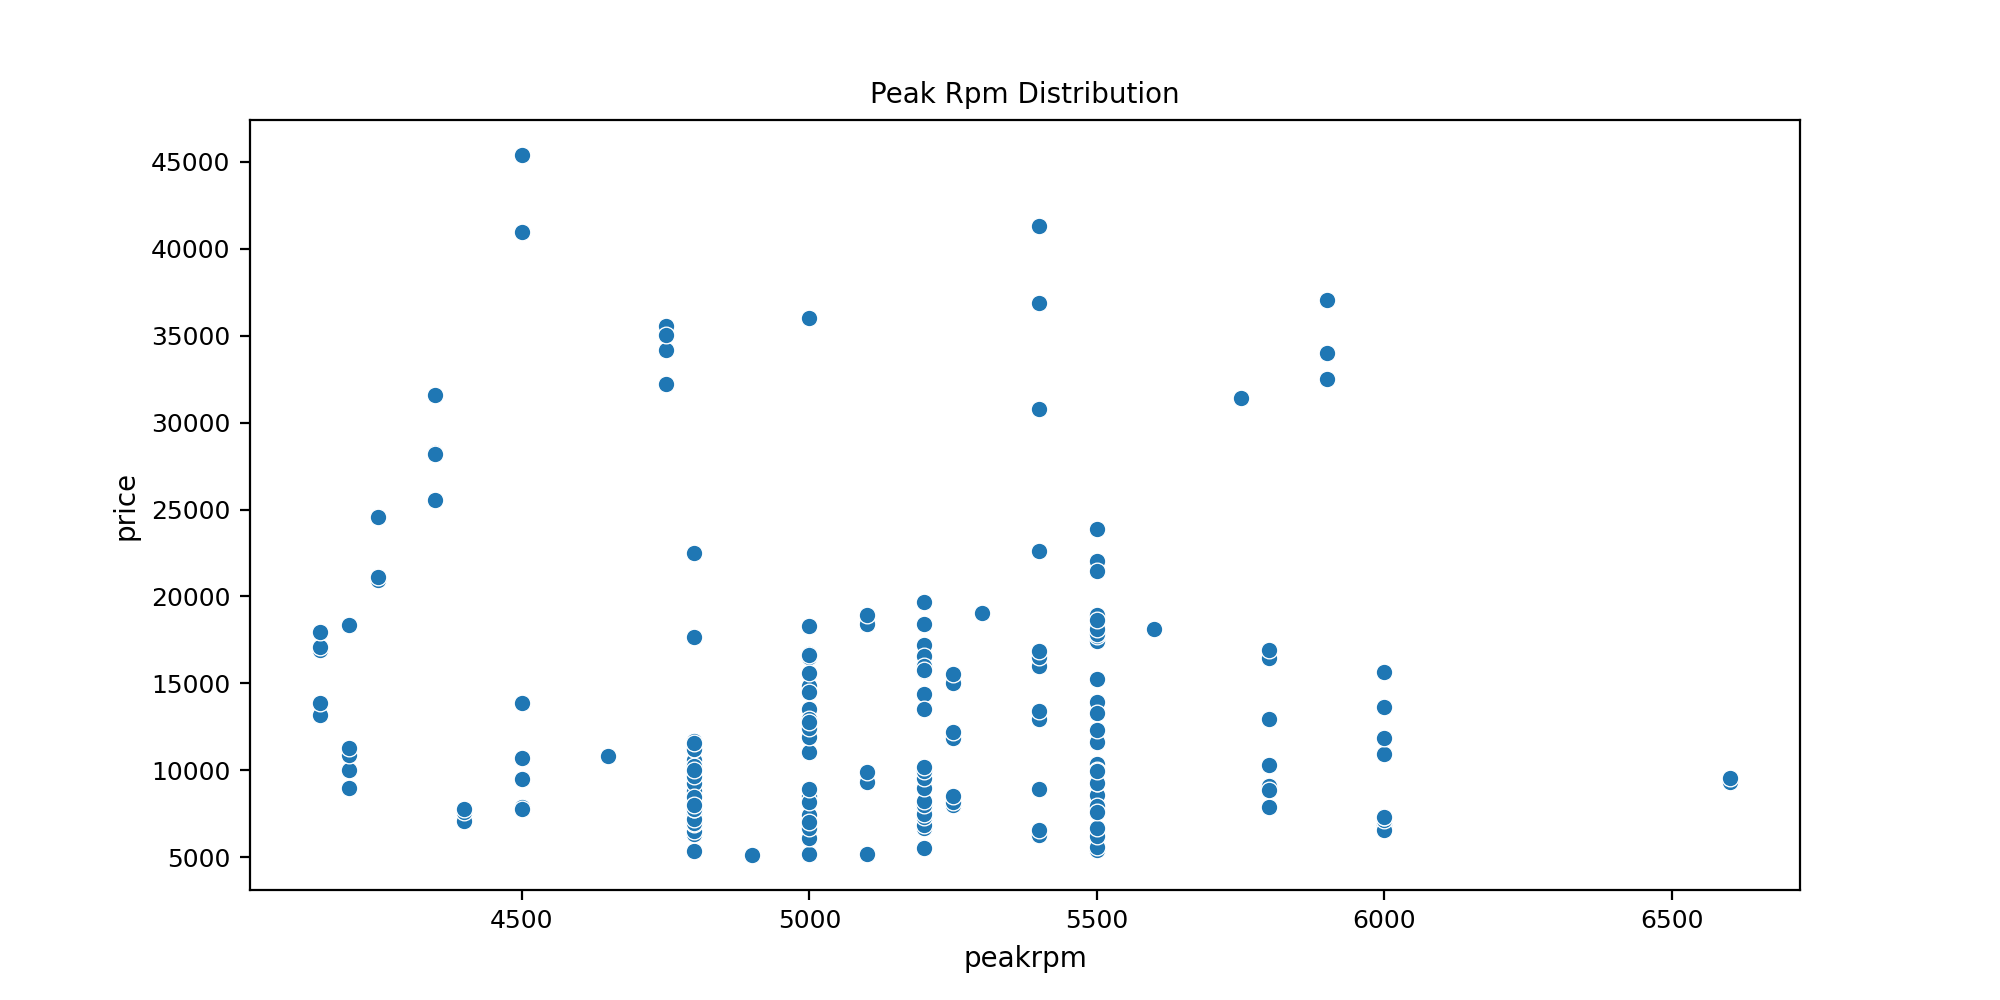

In [255]:
plt.figure(figsize=(10,5))
plt.title("Peak Rpm Distribution")
sns.scatterplot(x = 'peakrpm', y = 'price', data = df)
plt.show()

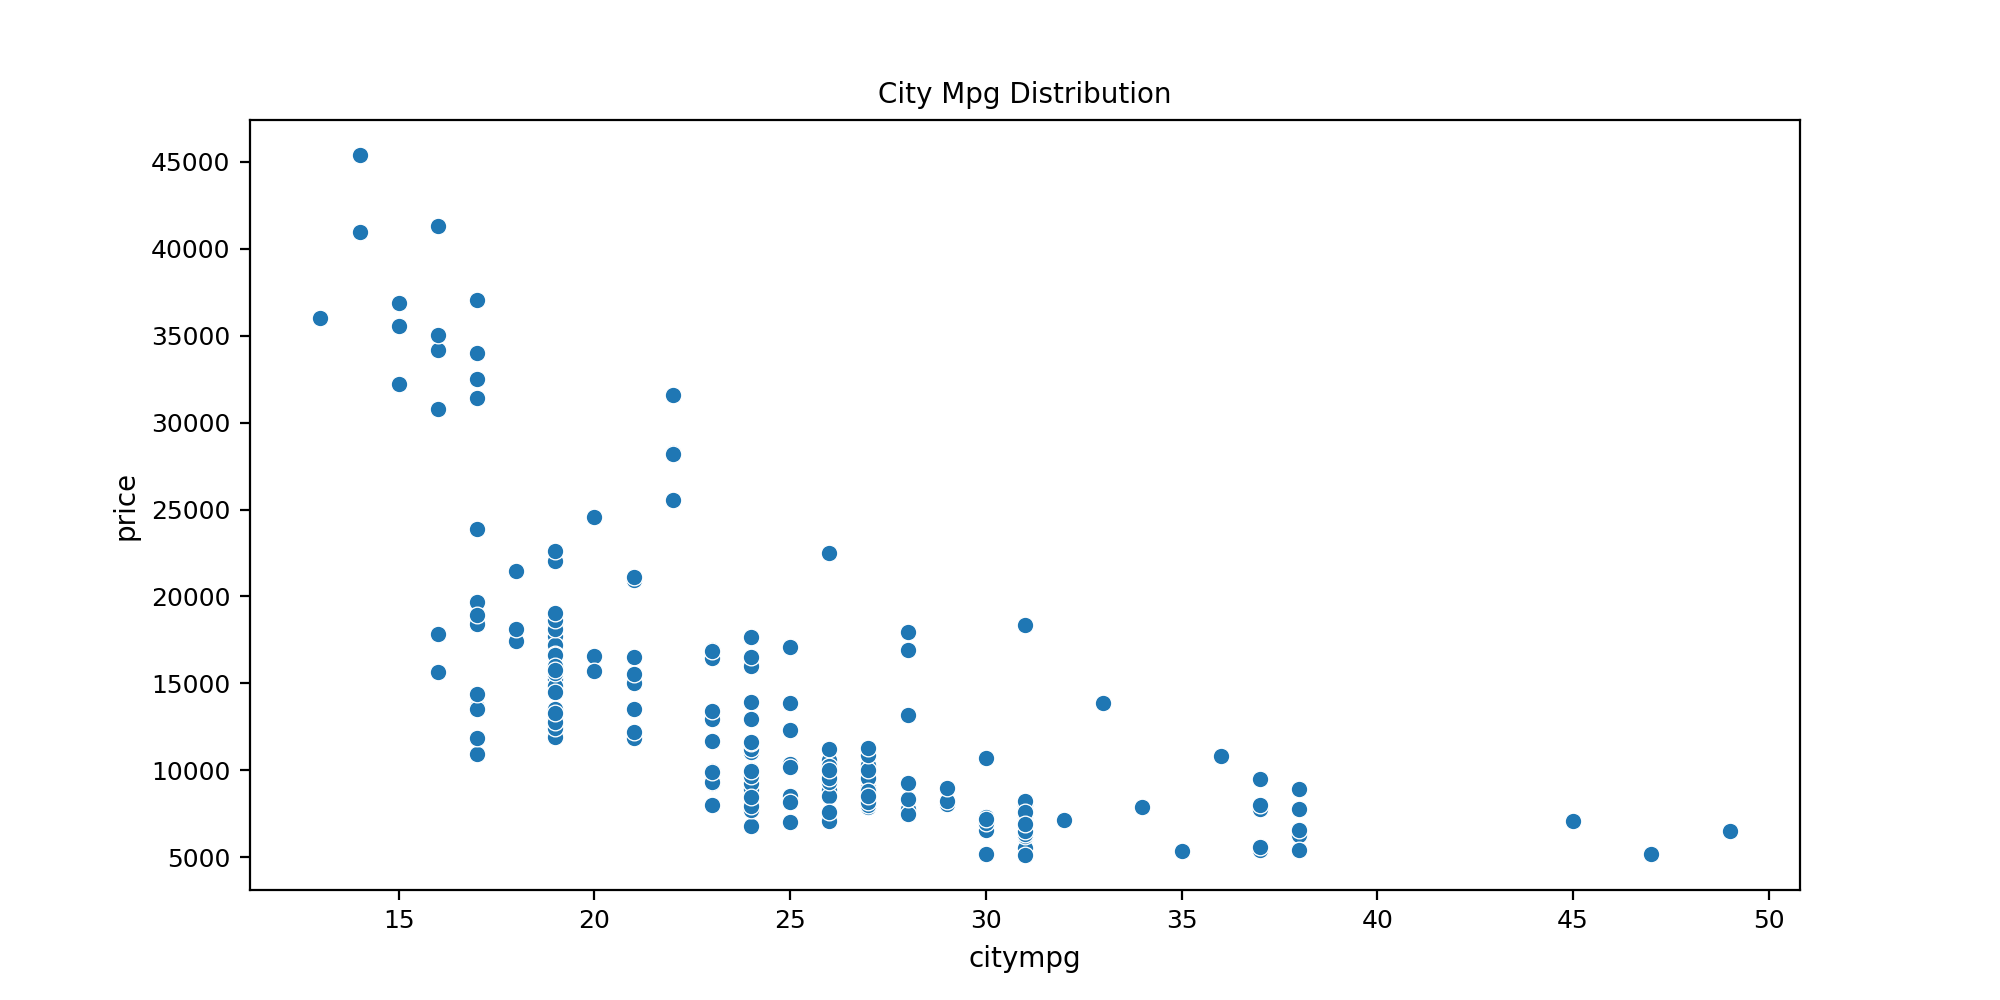

In [256]:
plt.figure(figsize=(10,5))
plt.title("City Mpg Distribution")
sns.scatterplot(x = 'citympg', y = 'price', data = df)
plt.show()

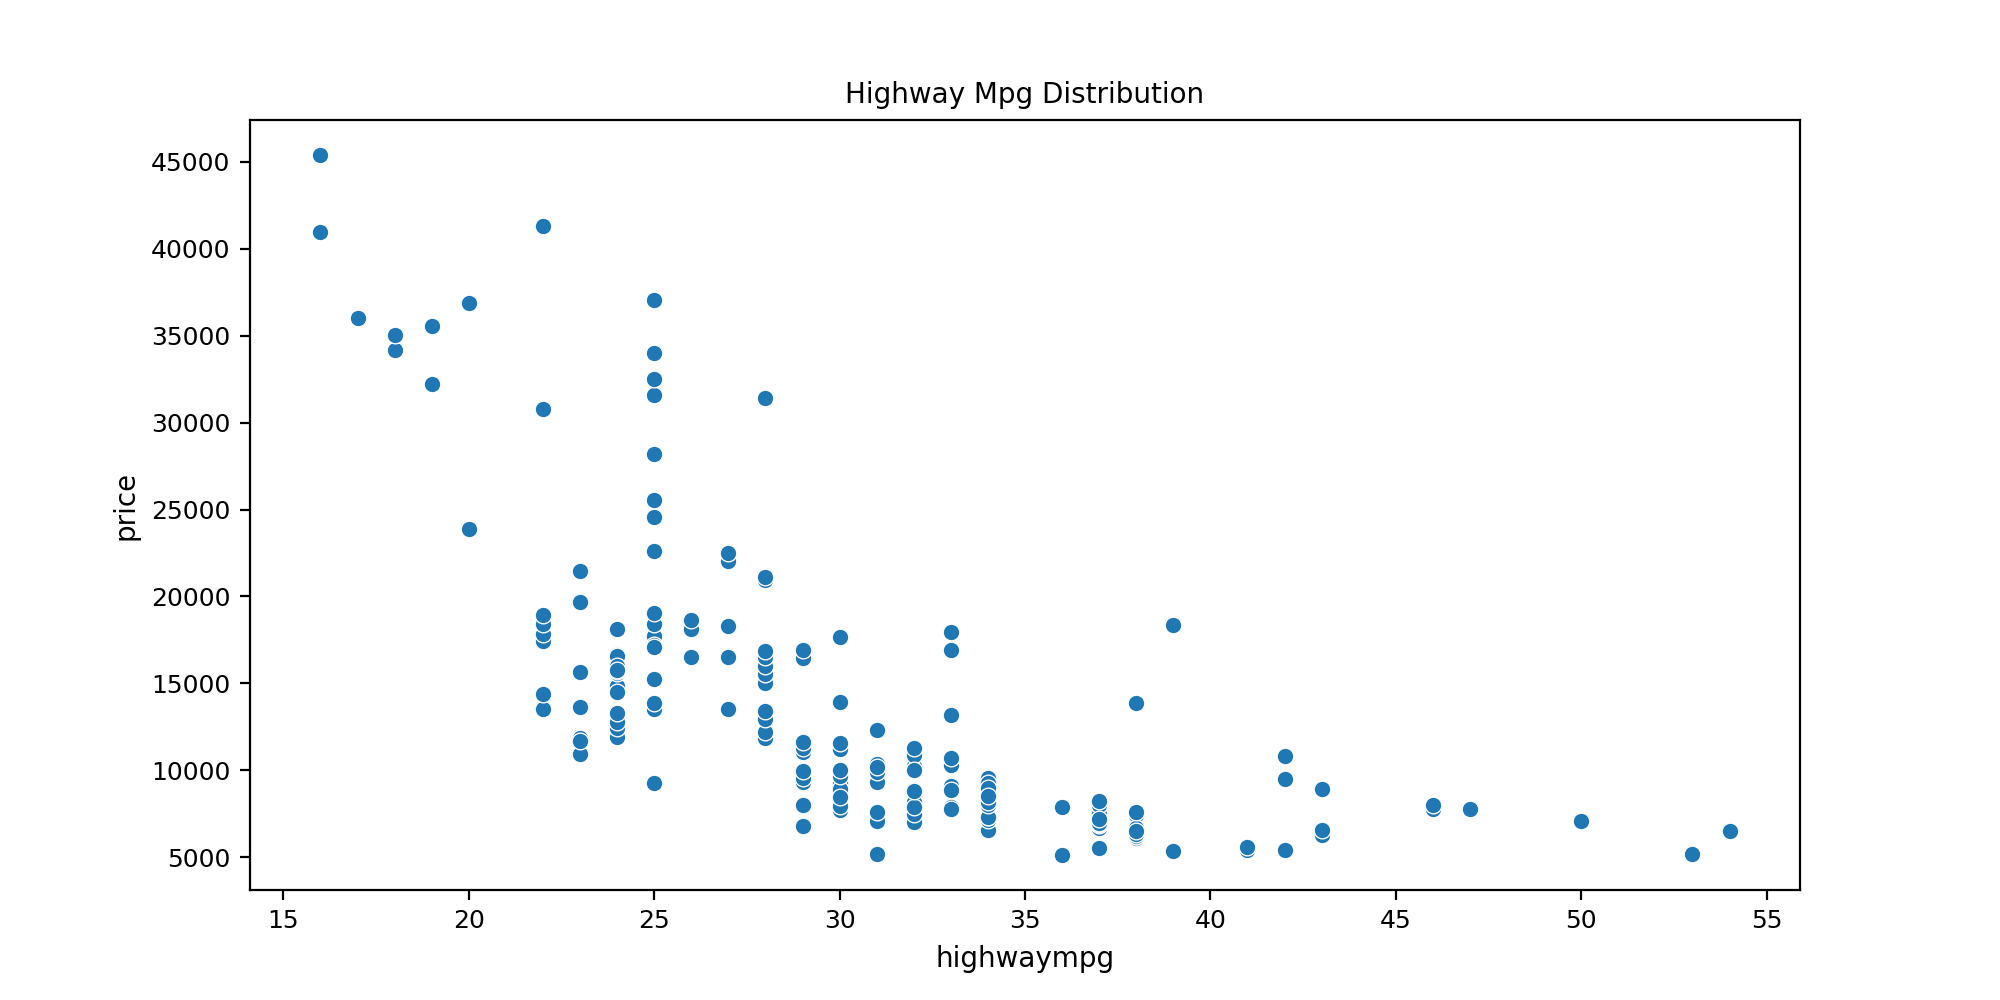

In [257]:
plt.figure(figsize=(10,5))
plt.title("Highway Mpg Distribution")
sns.scatterplot(x = 'highwaympg', y = 'price', data = df)
plt.show()

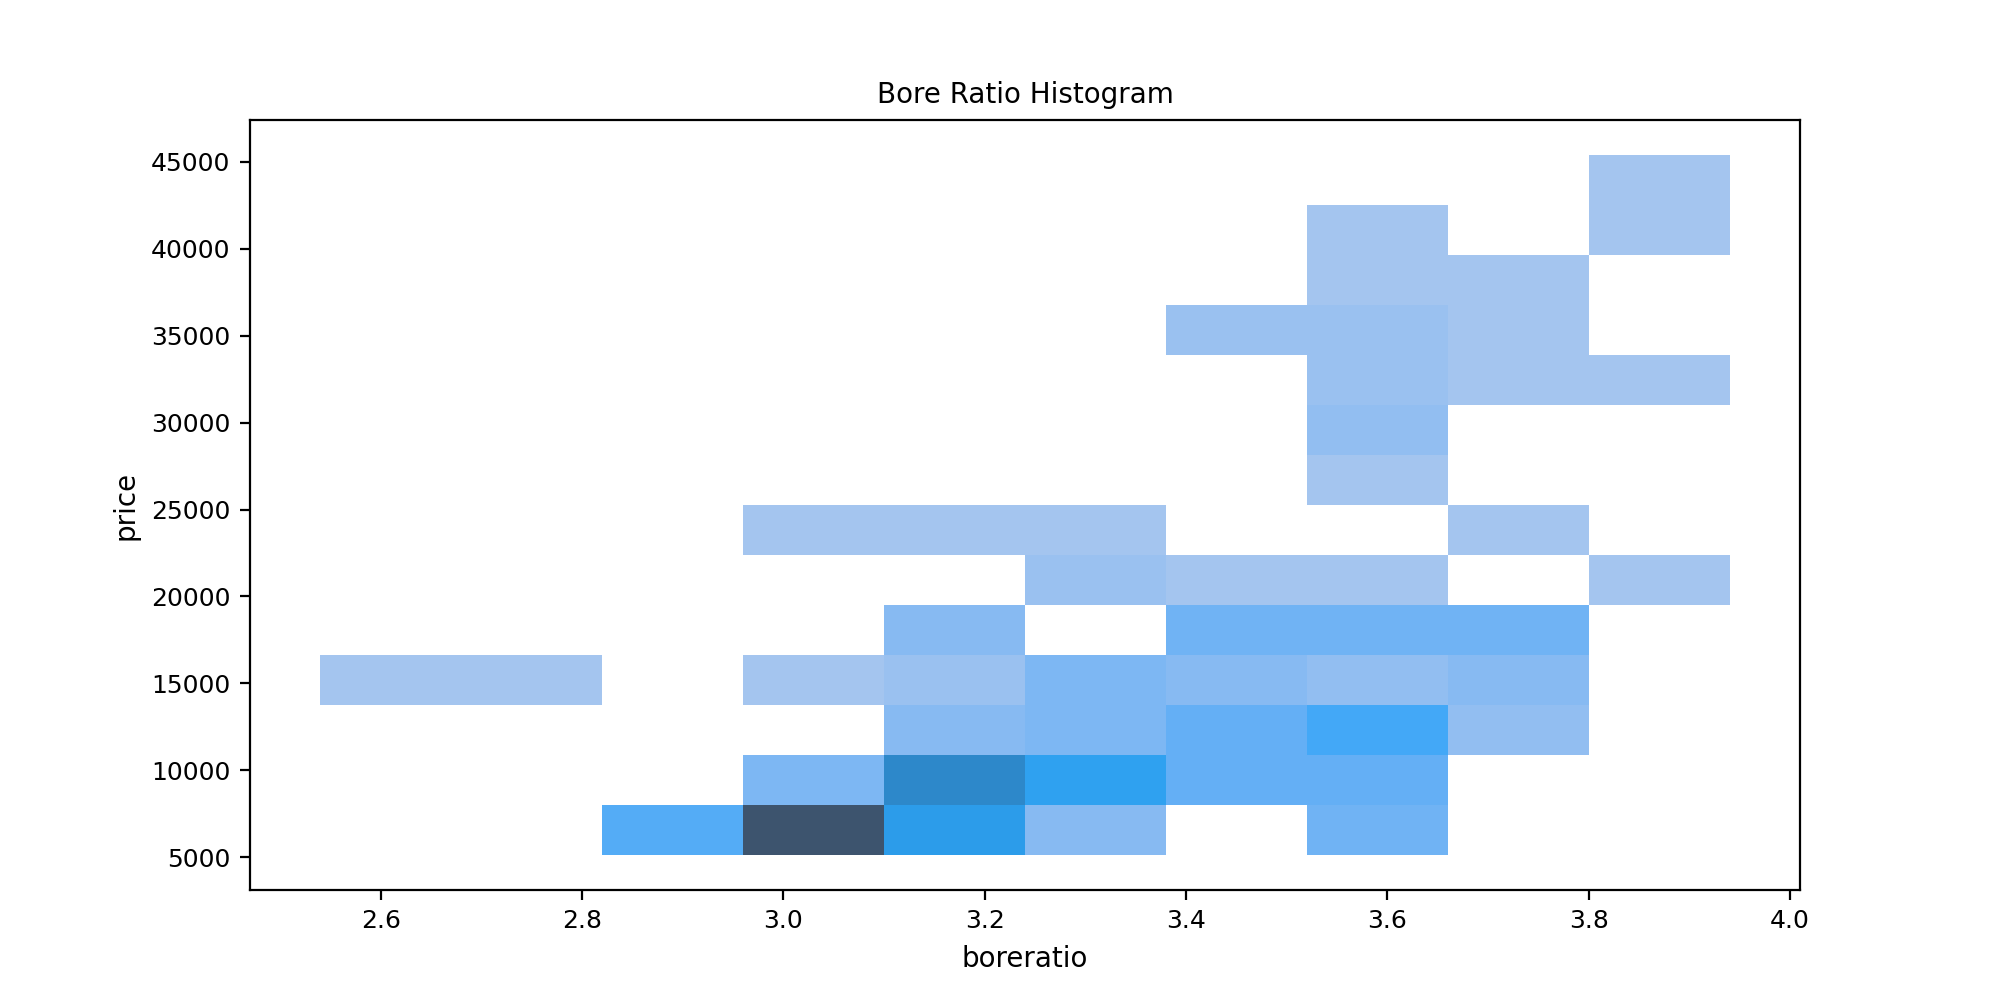

In [267]:
plt.figure(figsize=(10,5))
plt.title("Bore Ratio Histogram")
sns.histplot(x = 'boreratio', y = 'price', data = df)
plt.show()

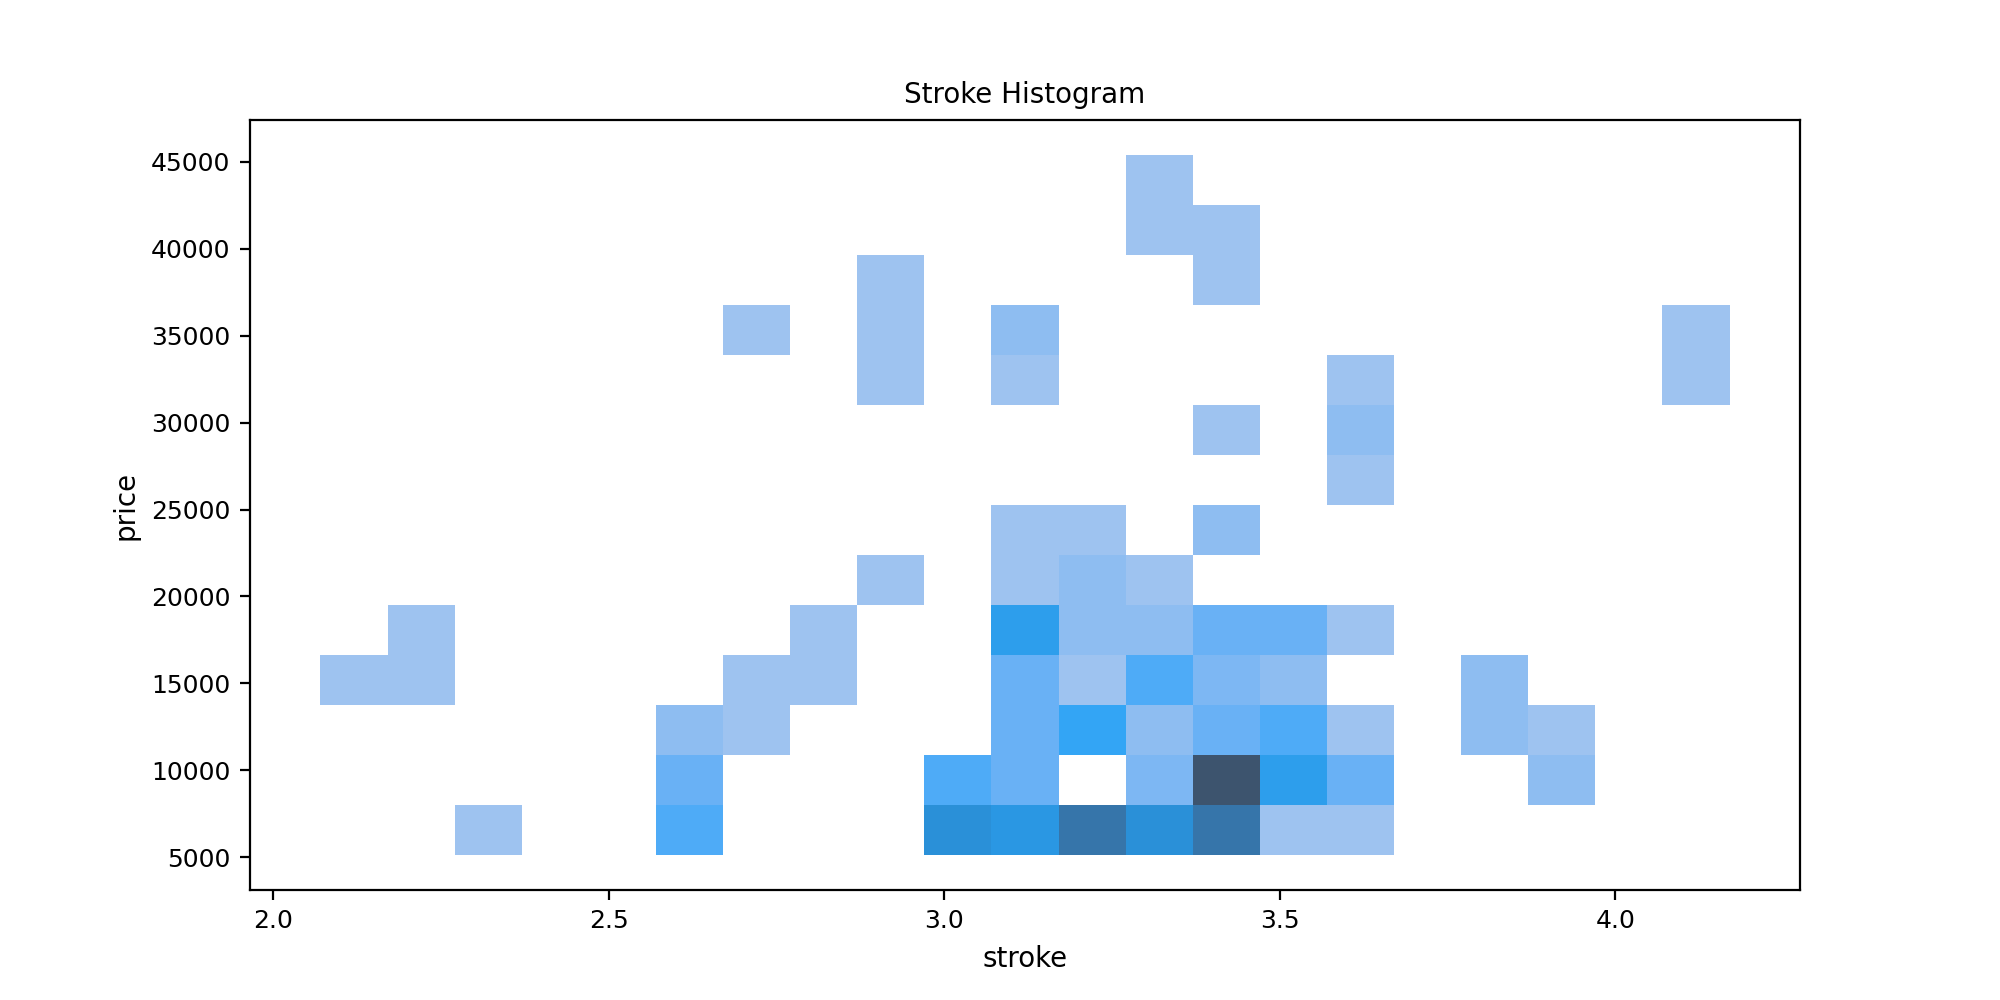

In [268]:
plt.figure(figsize=(10,5))
plt.title("Stroke Histogram")
sns.histplot(x = 'stroke', y = 'price', data = df)
plt.show()

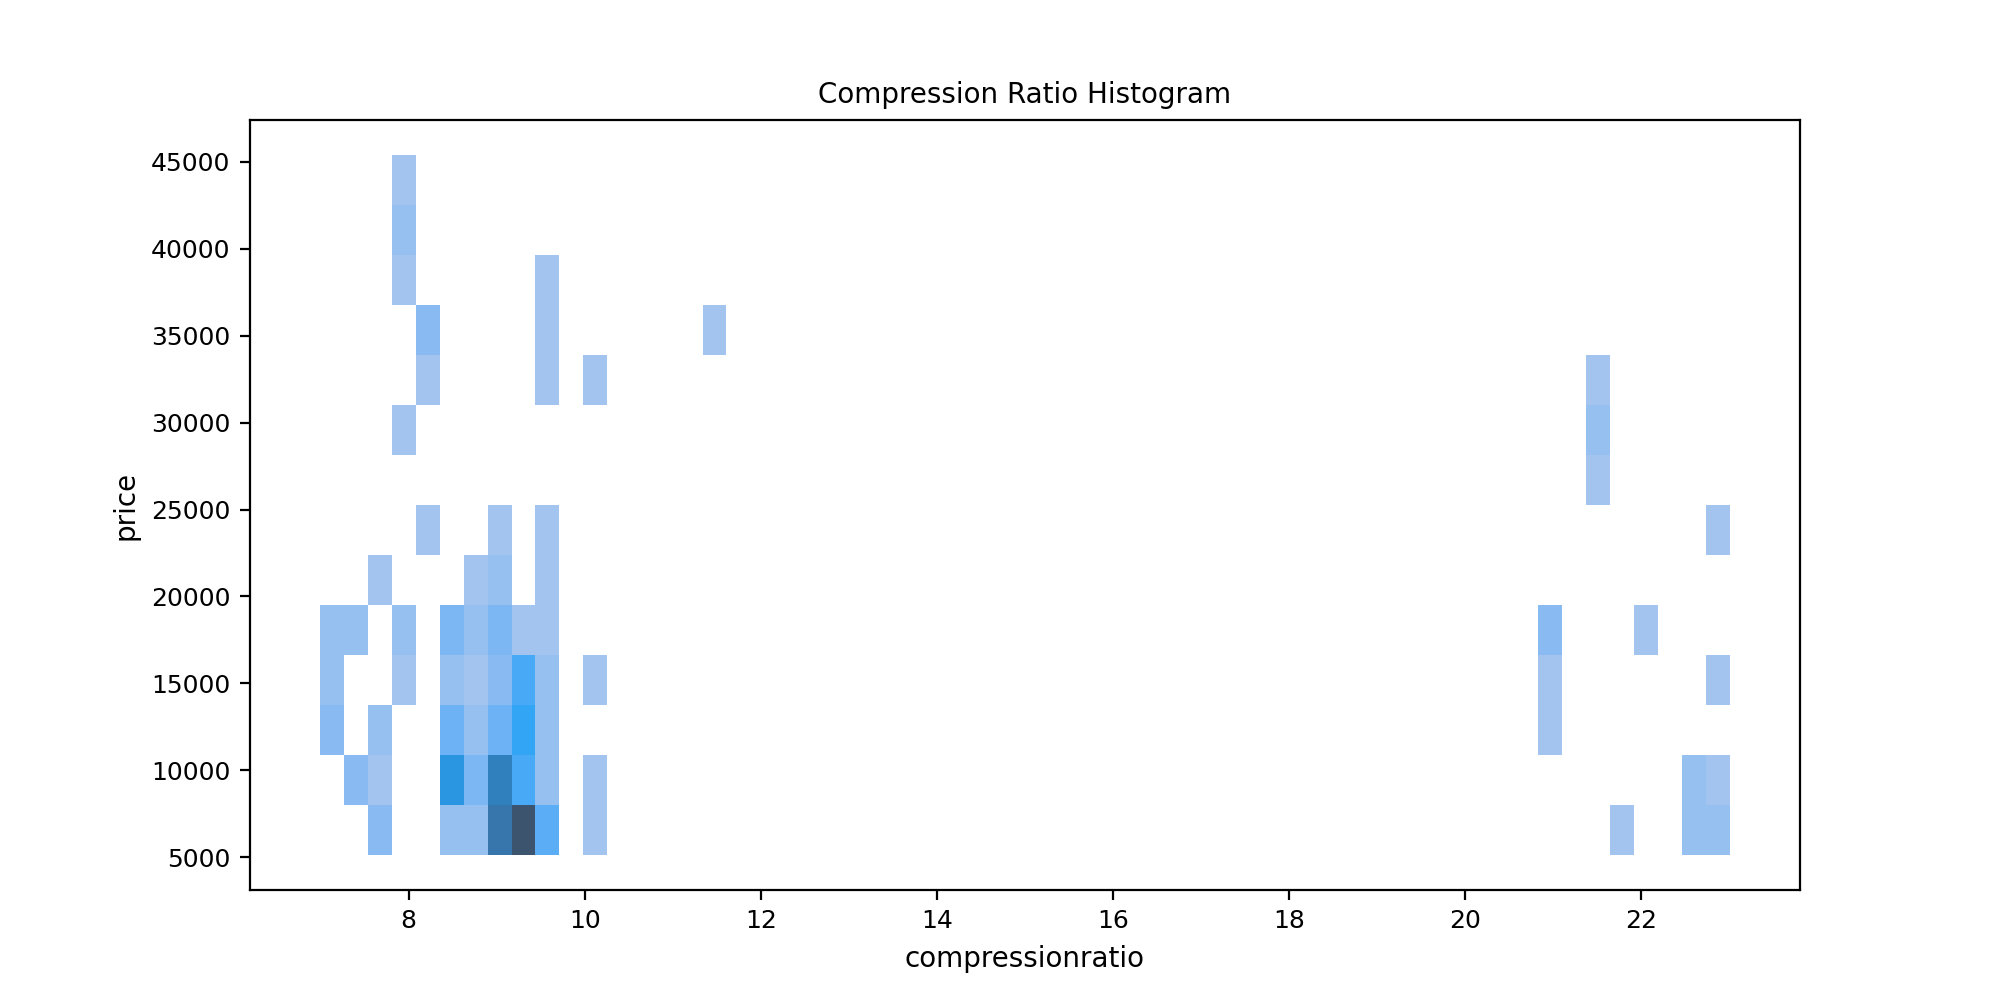

In [269]:
plt.figure(figsize=(10,5))
plt.title("Compression Ratio Histogram")
sns.histplot(x = 'compressionratio', y = 'price', data = df)
plt.show()

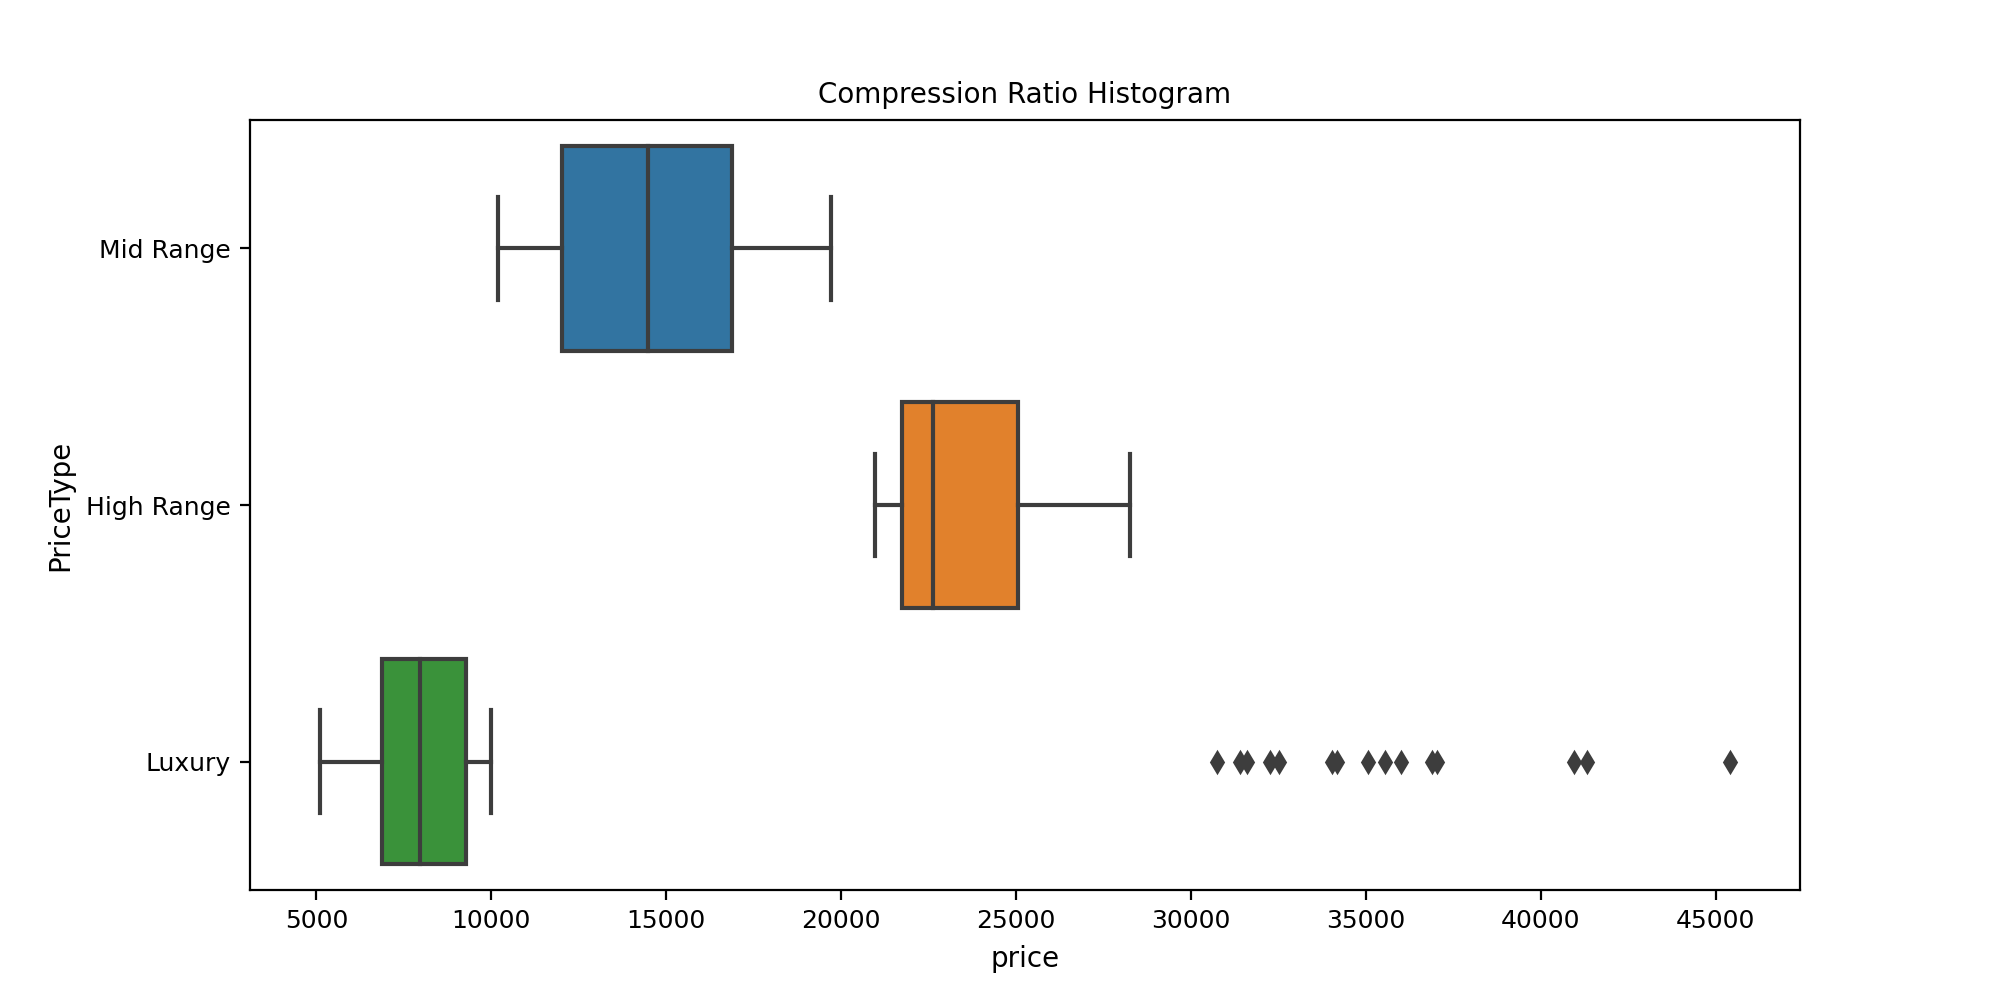

In [278]:
plt.figure(figsize=(10,5))
plt.title("Compression Ratio Histogram")
sns.boxplot(x = 'price', y = 'PriceType', data = df)
plt.show()

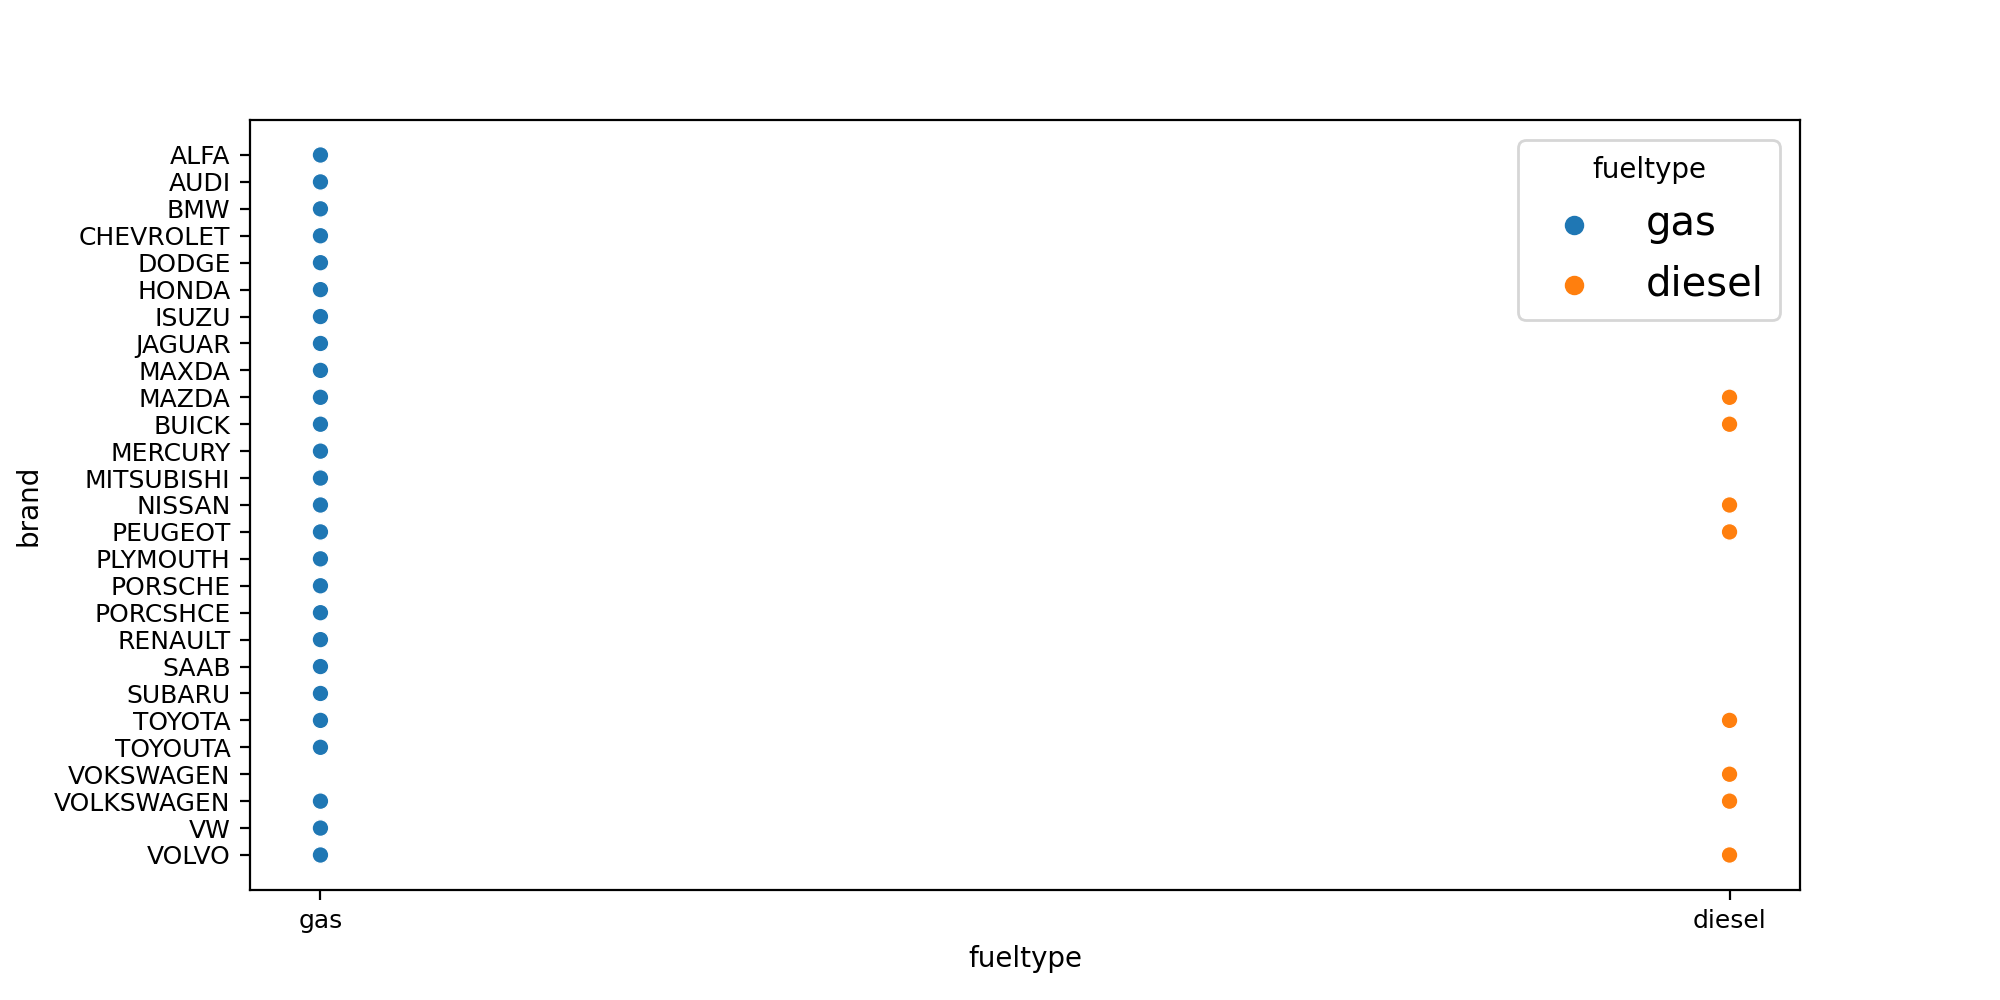

In [310]:
plt1 = sns.scatterplot(x = 'fueltype', y = 'brand', hue = 'fueltype', data = df)
plt1.set_xlabel('fueltype')
plt1.set_ylabel('brand')
plt.show()

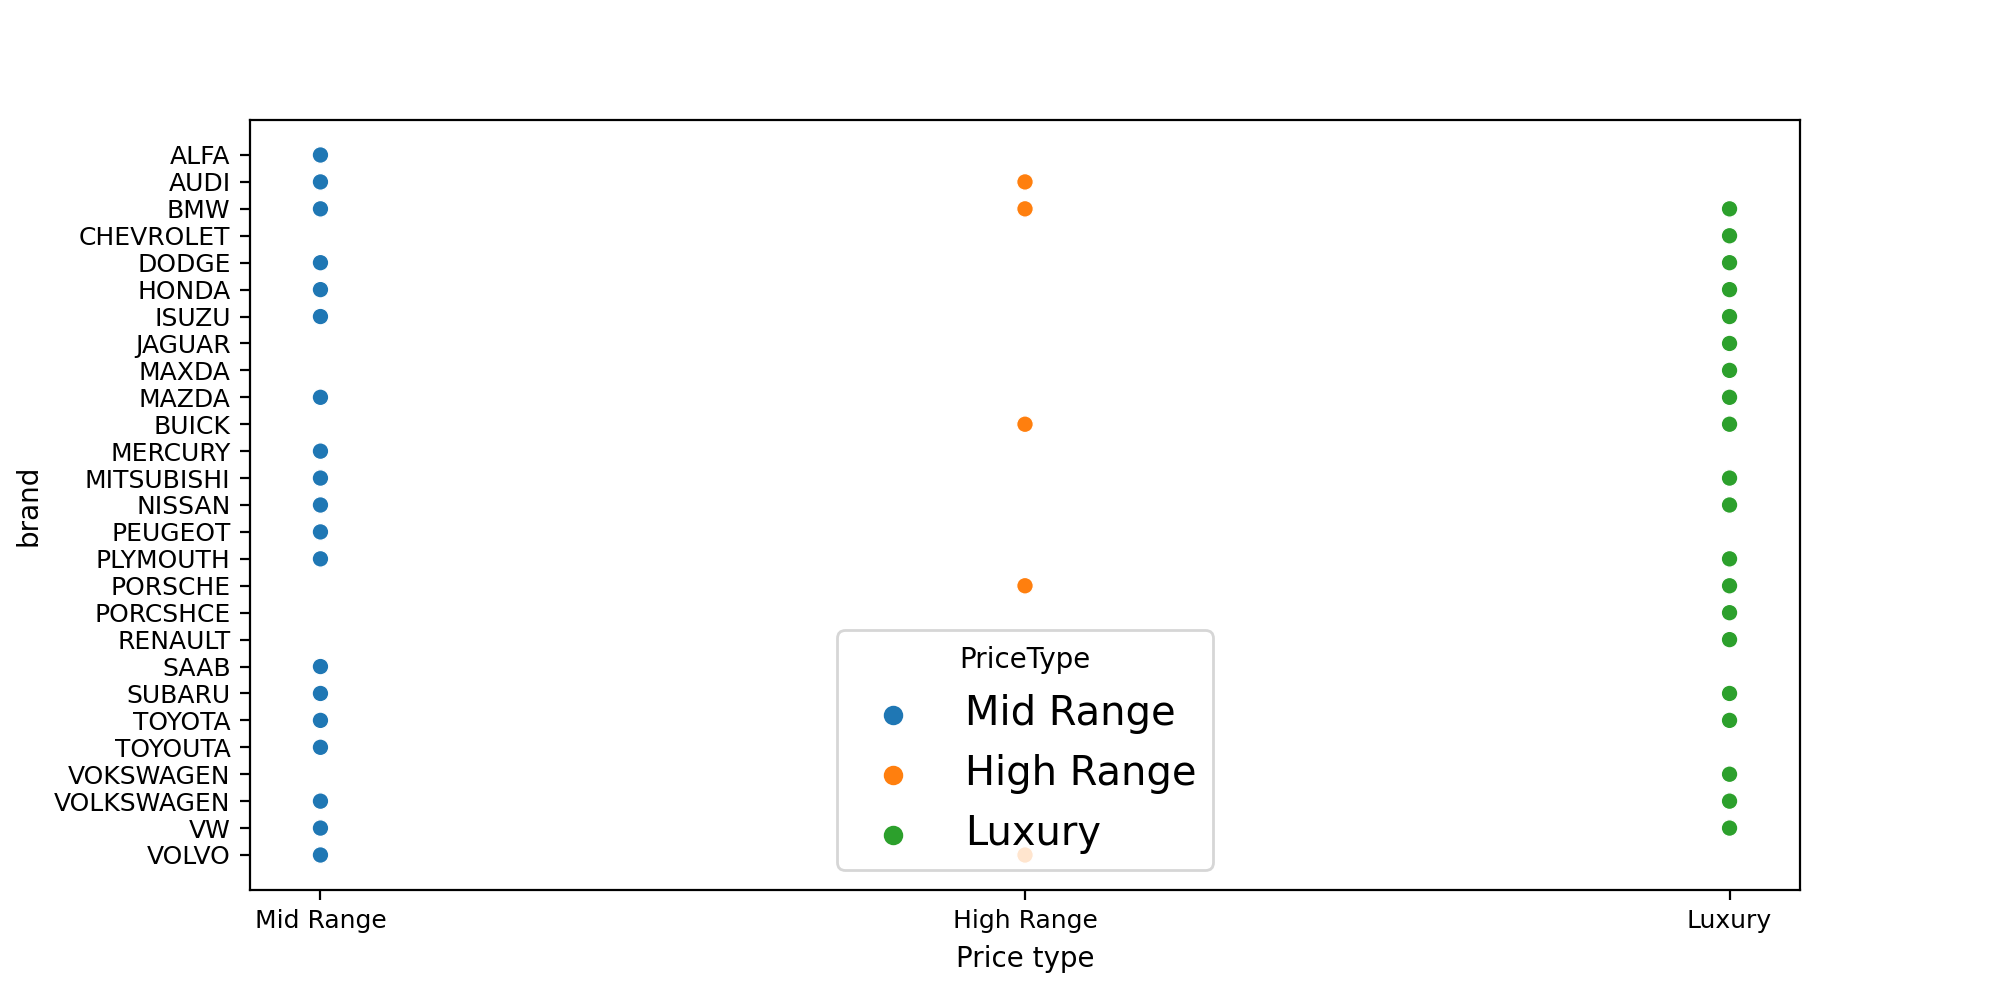

In [311]:
plt1 = sns.scatterplot(x = 'PriceType', y = 'brand', hue = 'PriceType', data = df)
plt1.set_xlabel('Price type')
plt1.set_ylabel('brand')
plt.show()

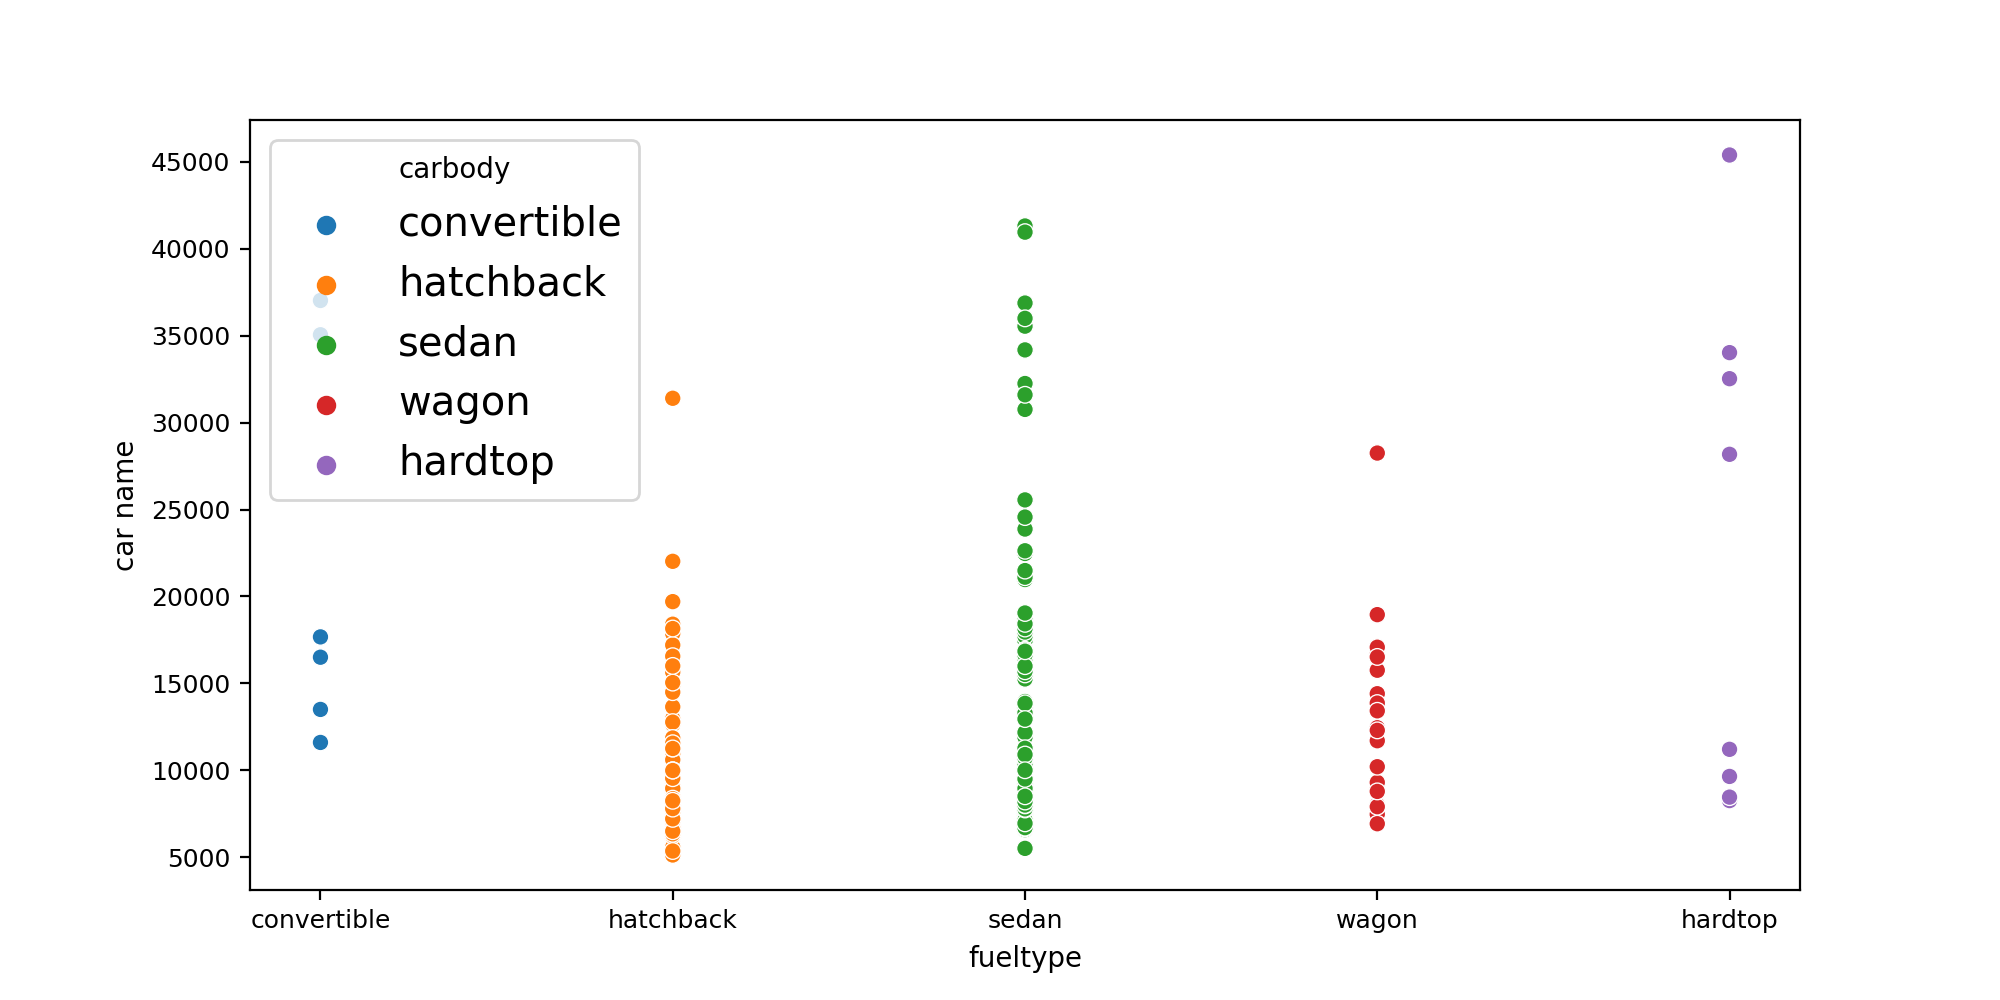

In [312]:
plt1 = sns.scatterplot(x = 'carbody', y = 'price', hue = 'carbody', data = df)
plt1.set_xlabel('fueltype')
plt1.set_ylabel('car name')
plt.show()

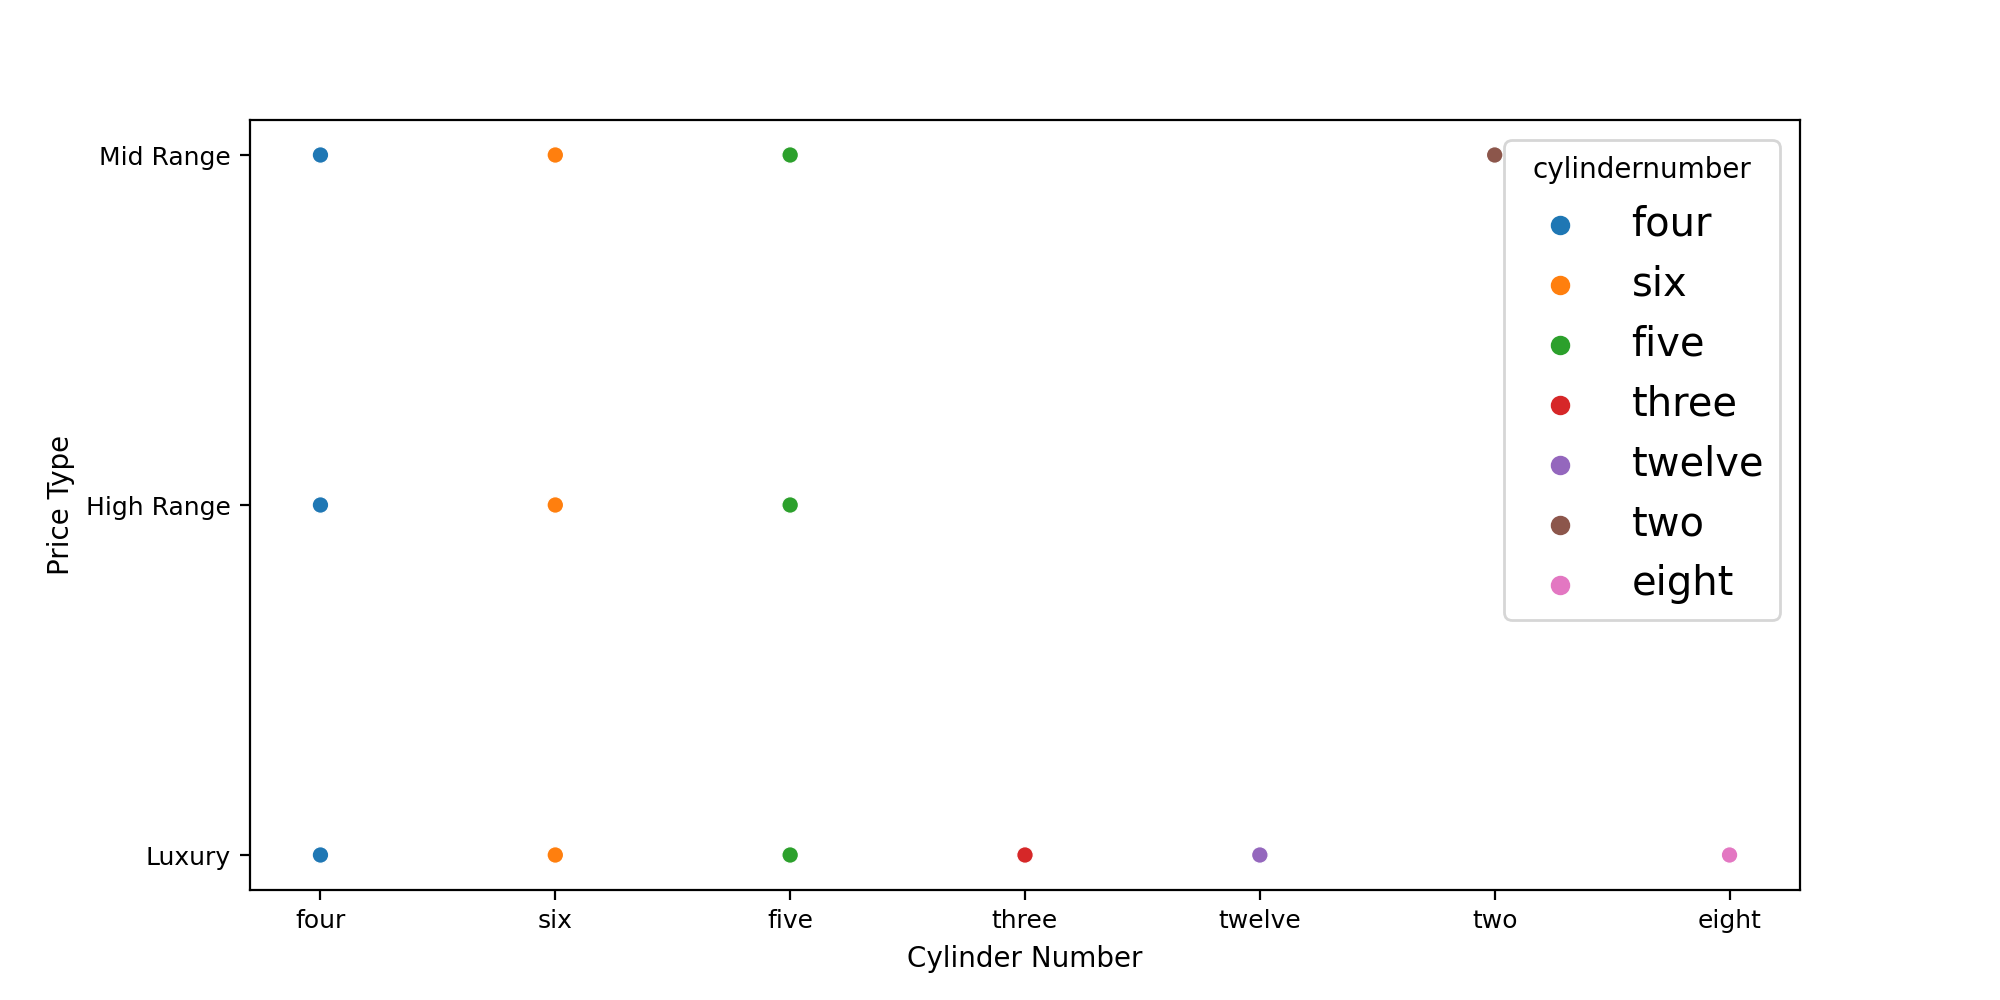

In [314]:
plt1 = sns.scatterplot(x = 'cylindernumber', y = 'PriceType', hue = 'cylindernumber', data = df)
plt1.set_xlabel('Cylinder Number')
plt1.set_ylabel('Price Type')
plt.show()

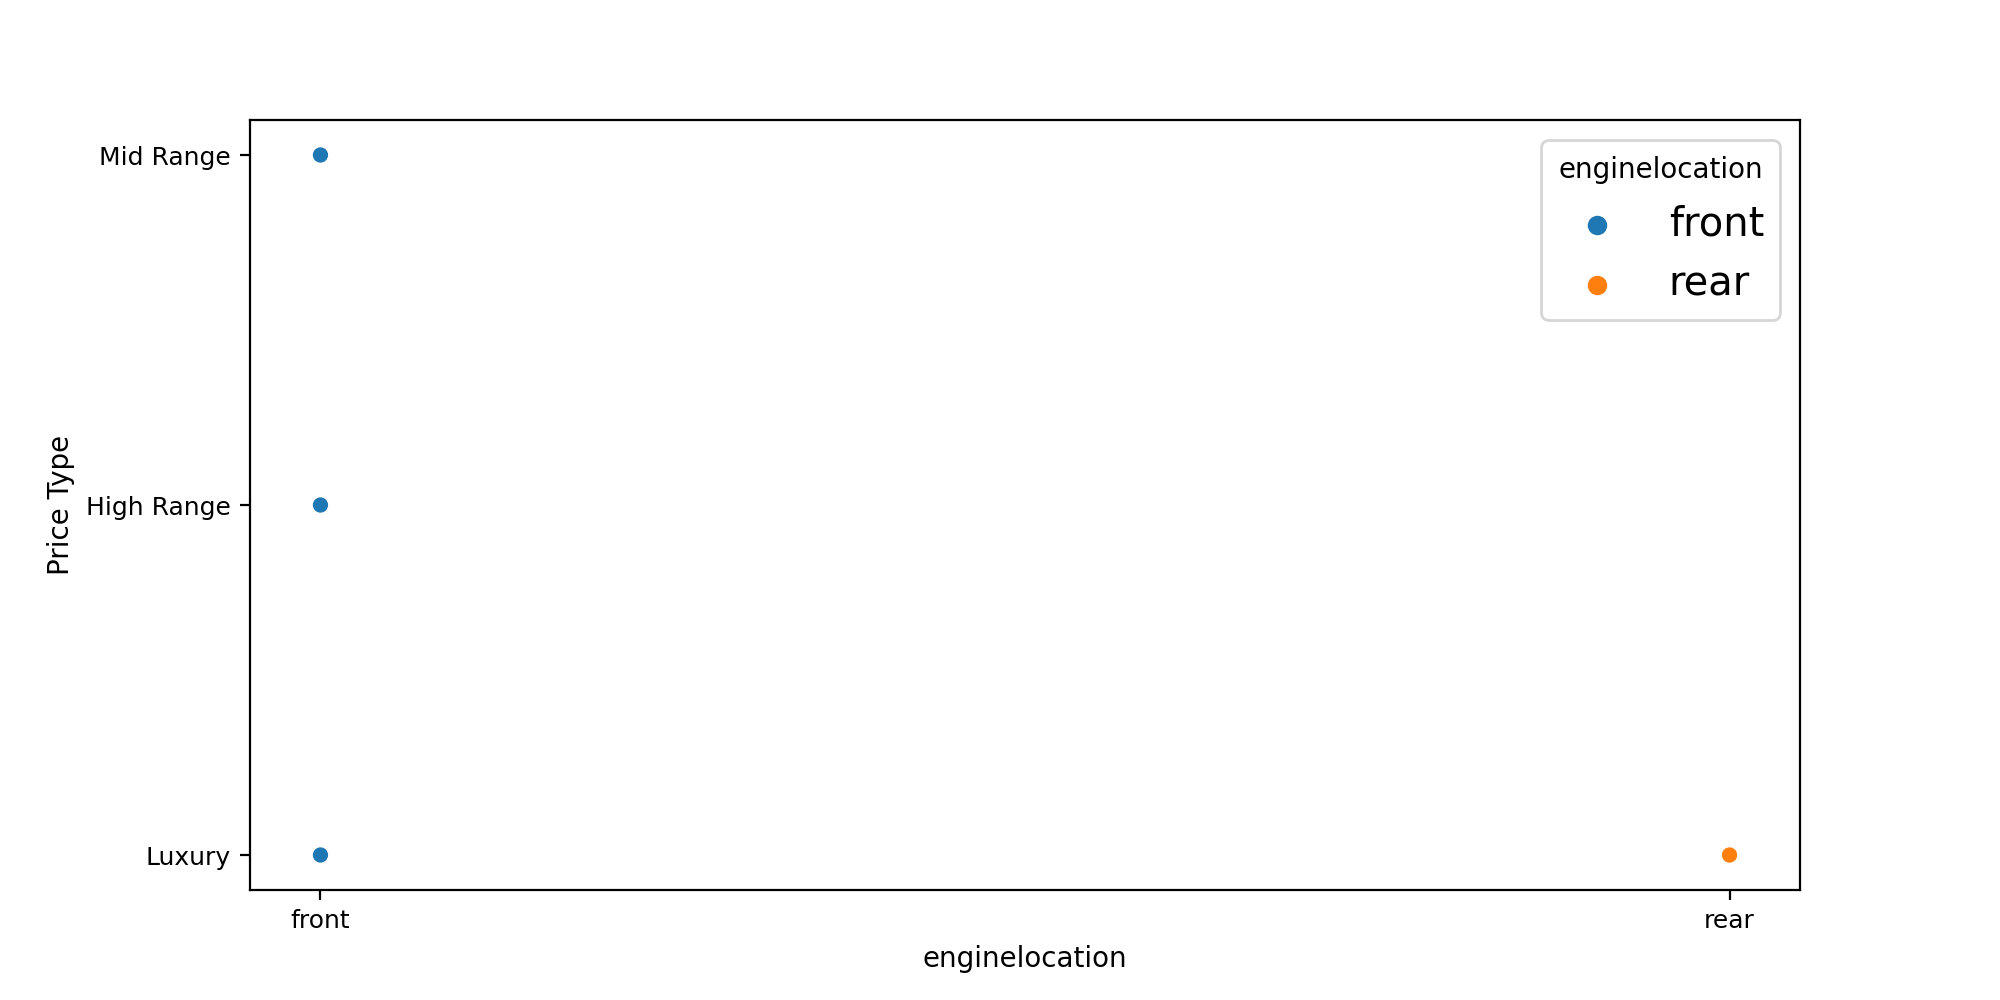

In [315]:
plt1 = sns.scatterplot(x = 'enginelocation', y = 'PriceType', hue = 'enginelocation', data = df)
plt1.set_xlabel('enginelocation')
plt1.set_ylabel('Price Type')
plt.show()

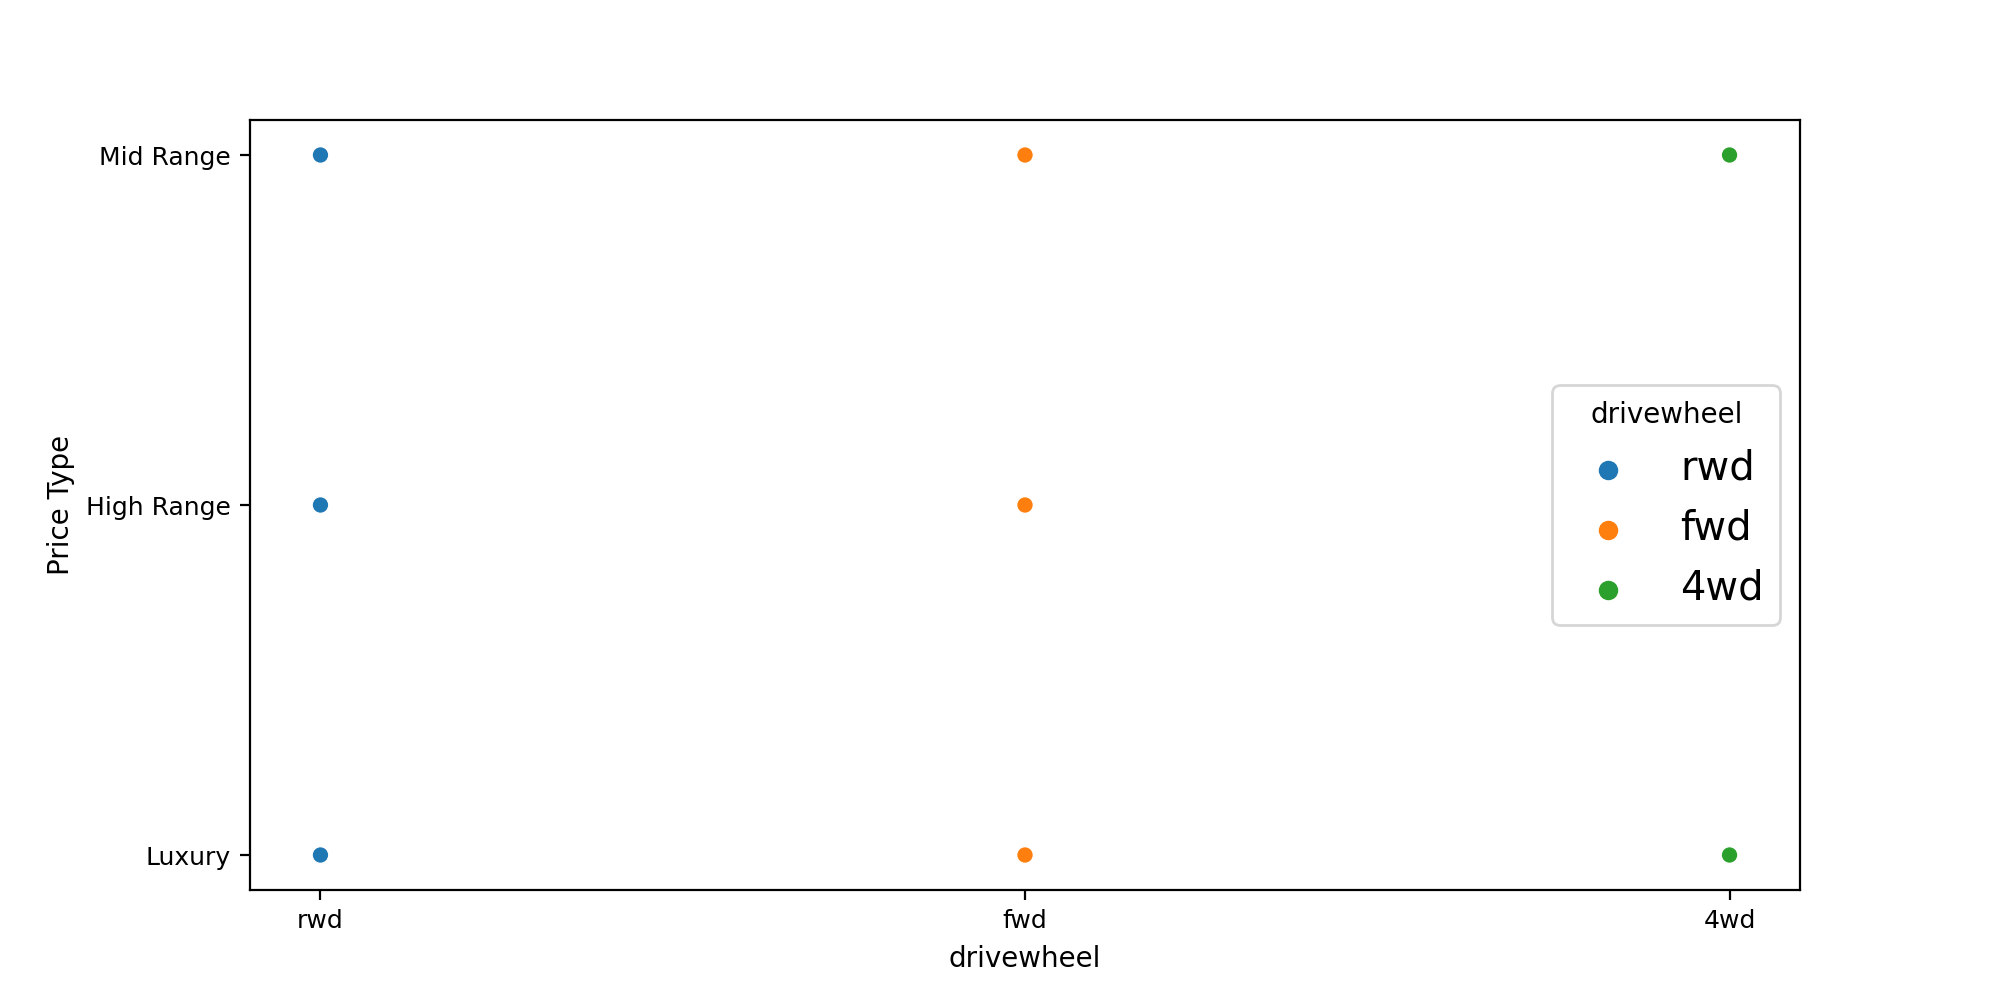

In [316]:
plt1 = sns.scatterplot(x = 'drivewheel', y = 'PriceType', hue = 'drivewheel', data = df)
plt1.set_xlabel('drivewheel')
plt1.set_ylabel('Price Type')
plt.show()

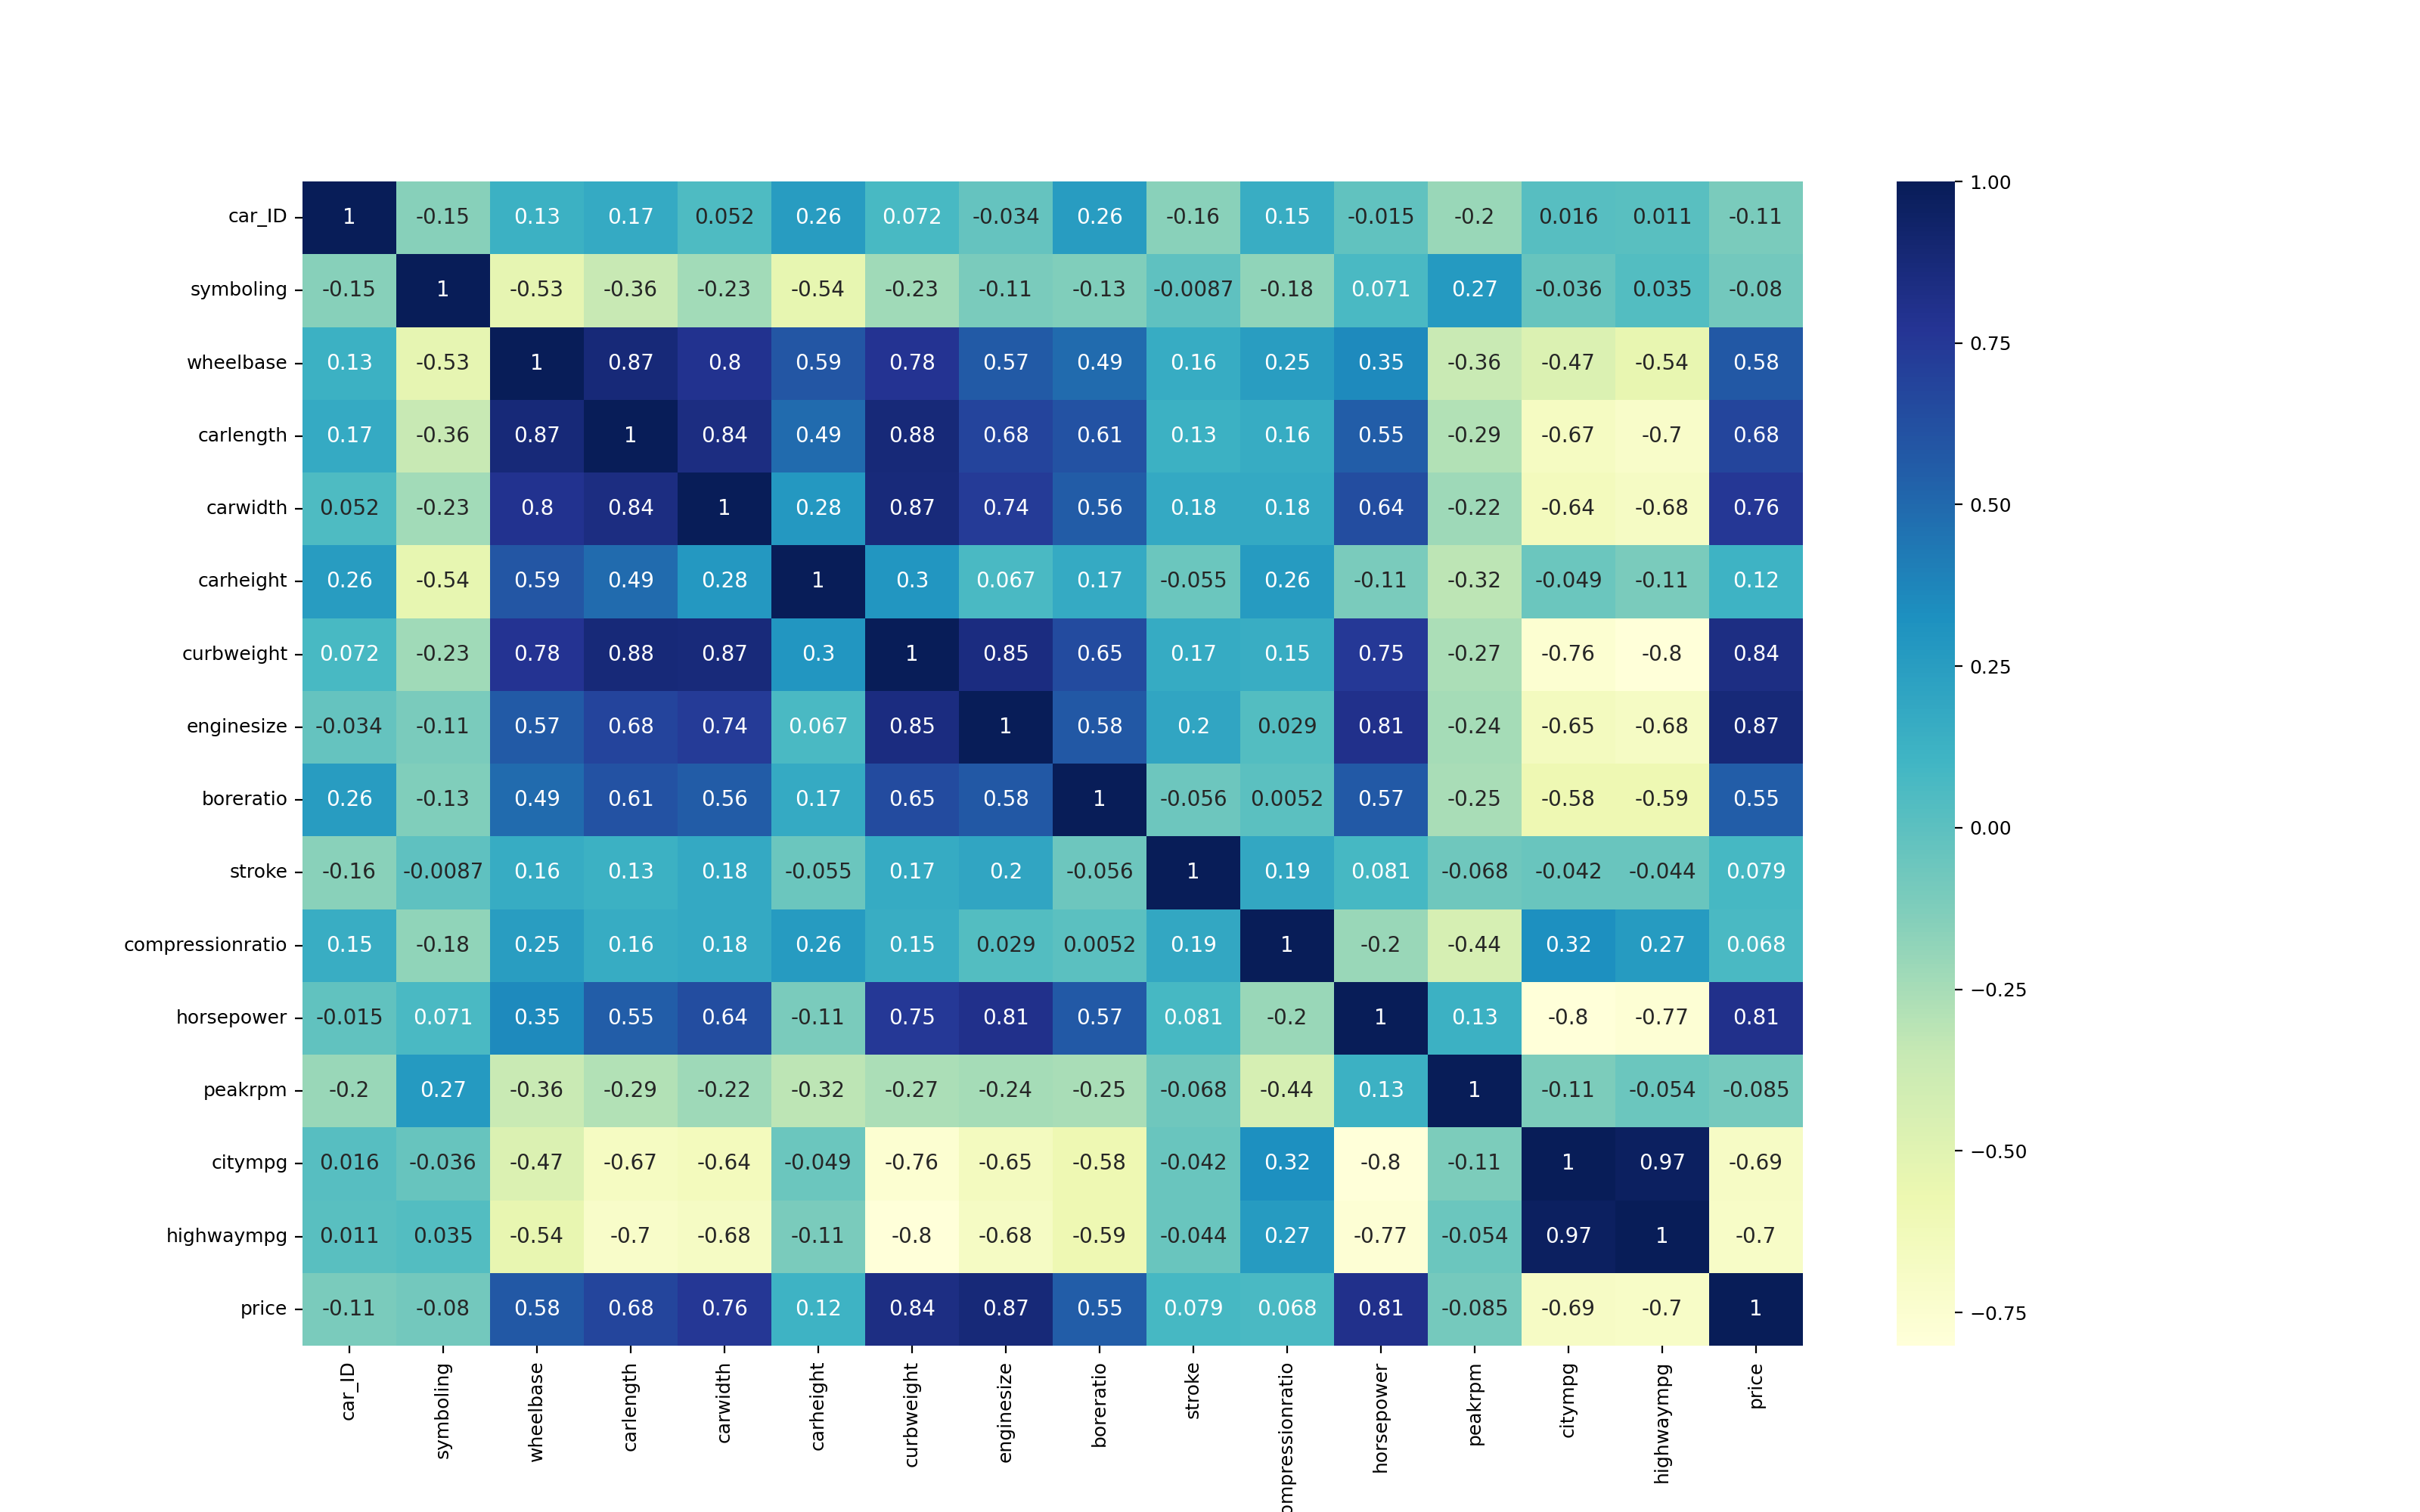

In [319]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()